In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
import astropy.constants as const
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm
from eistrick import eis_slit_width_offset

In [2]:
eis_data_set = scipy.io.readsav("../../save/new_lvl1_offset_limb_1116_northpole_tilt_cor_l1_20071116_07262.sav",verbose=False)
eis_wvl =  np.copy(eis_data_set["wvl"])
eis_wvl[:2048] = eis_wvl[:2048] + 0.10469
eis_wvl[2048:] = eis_wvl[2048:] + 0.11010
eis_img = eis_data_set["new_data_offset"]
eis_err = eis_data_set["new_err_offset"]
eis_img_aver = np.average(eis_img,axis=0)
eis_err_aver = np.sqrt(np.sum(np.square(eis_err),axis=0))/7
eis_range = (372,402)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


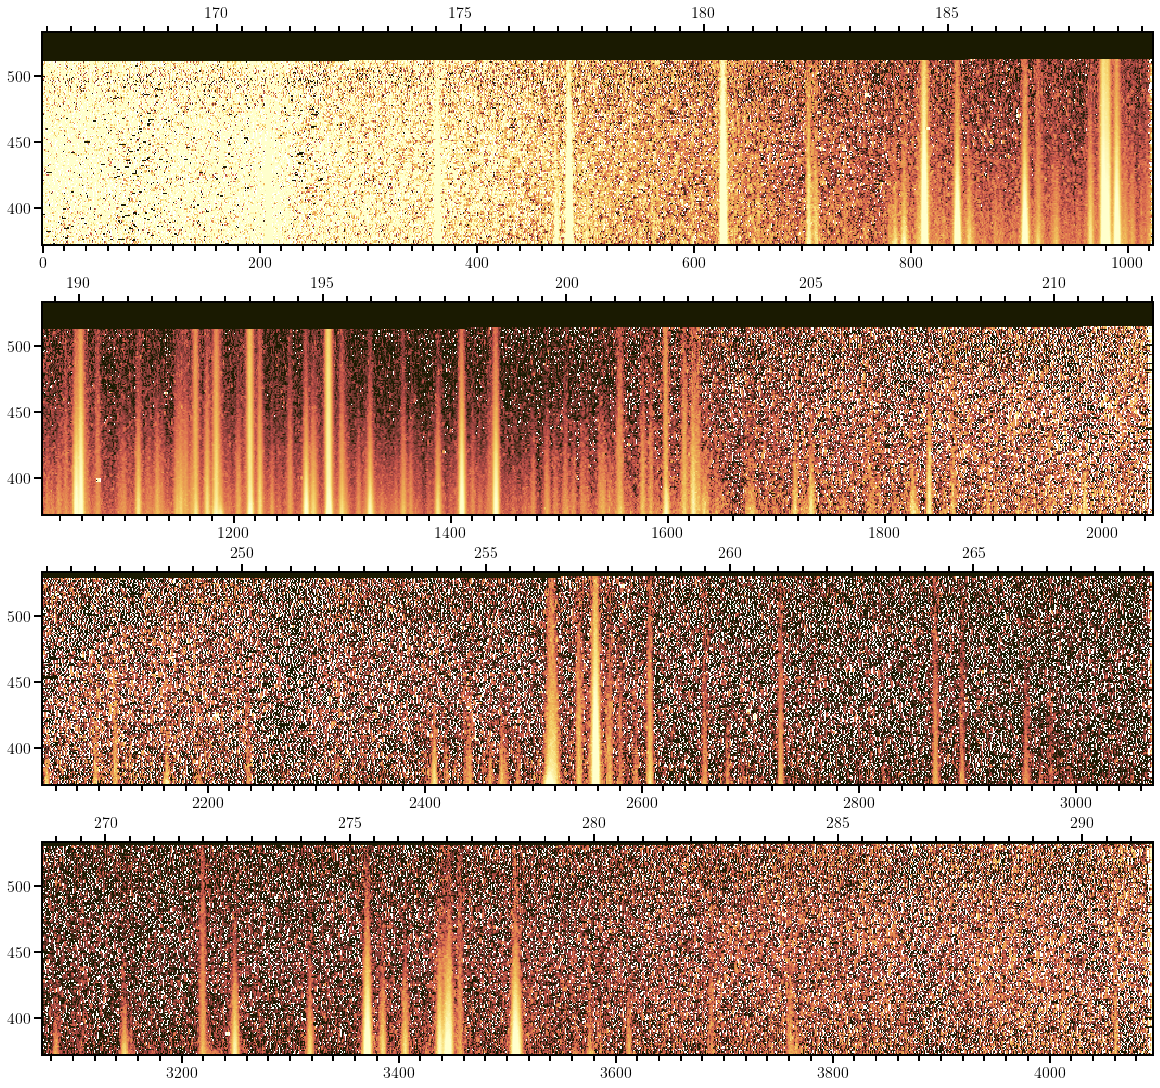

In [3]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

for ii in range(4):
    axes[ii].pcolormesh(np.arange(ii*1024,(ii+1)*1024),np.arange(372,534),
                    np.nan_to_num(np.log10(eis_img_aver[372:,ii*1024:(ii+1)*1024]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=0,vmax=2.5)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(eis_wvl[ii*1024],eis_wvl[(ii+1)*1024-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)

#plt.savefig("../../figs/eis_window.png",dpi=300,format="png")


## Short Wavelength Detector
---

FWHM after removing instrumental broadening:  [0.03795918]


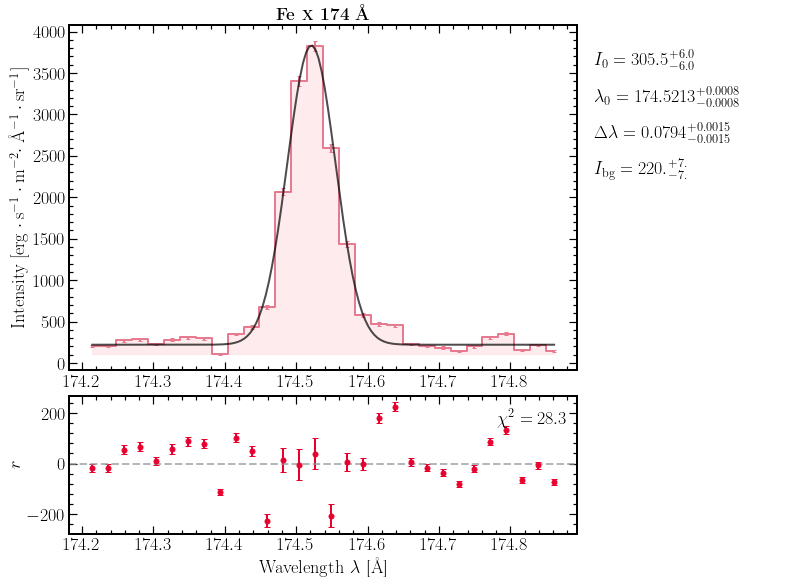

In [4]:
FeX_174_slice = (350,380)
wvl_FeX_174 = eis_wvl[FeX_174_slice[0]:FeX_174_slice[1]]
int_FeX_174 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_174_slice[0]:FeX_174_slice[1]],axis=0)

err_FeX_174 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_174_slice[0]:FeX_174_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_174_fit_model = SpectrumFitSingle(data=int_FeX_174,wvl=wvl_FeX_174,err=err_FeX_174,
                                      same_width=True,line_number=1,line_wvl_init=[174.5],
                                      int_max_init=[3500],fwhm_init=[0.2])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeX_174_fit_model.run_HahnMC(n_chain=10000)
FeX_174_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_174_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeX_174_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.04074247]


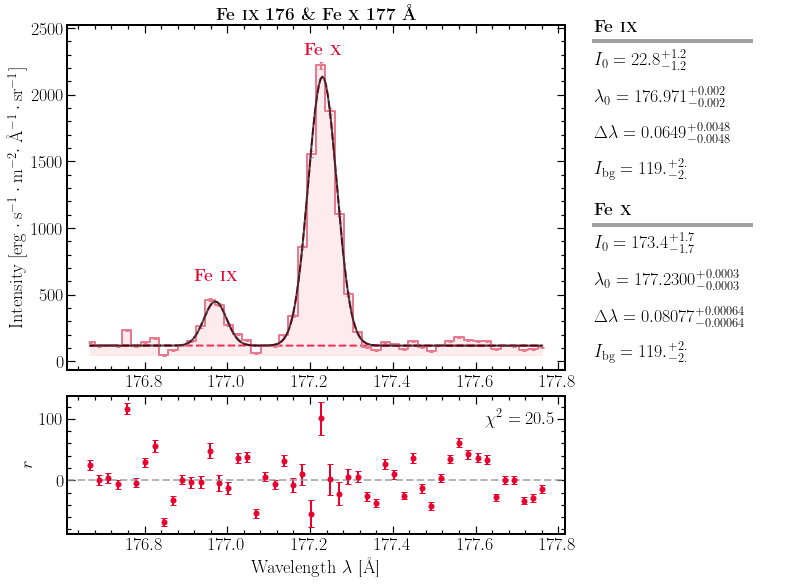

In [5]:
FeIX_176_FeX_177_slice = (460,510)
wvl_FeIX_176_FeX_177 = eis_wvl[FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]
int_FeIX_176_FeX_177 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]],axis=0)

err_FeIX_176_FeX_177 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_176_FeX_177_fit_model = SpectrumFitSingle(data=int_FeIX_176_FeX_177,wvl=wvl_FeIX_176_FeX_177,err=err_FeIX_176_FeX_177,
                                      same_width=False,line_number=2,line_wvl_init=[176.96,177.22],
                                      int_max_init=[400,2000],fwhm_init=[0.1,0.1])
# FeIX_176_FeX_177_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_176_FeX_177_fit_model.run_HahnMC(n_chain=10000)
FeIX_176_FeX_177_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_176_FeX_177_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeIX_176_FeX_177_fit_model.line_wvl_fit,eis_wvl[0])**2))

<AxesSubplot:ylabel='Intensity'>

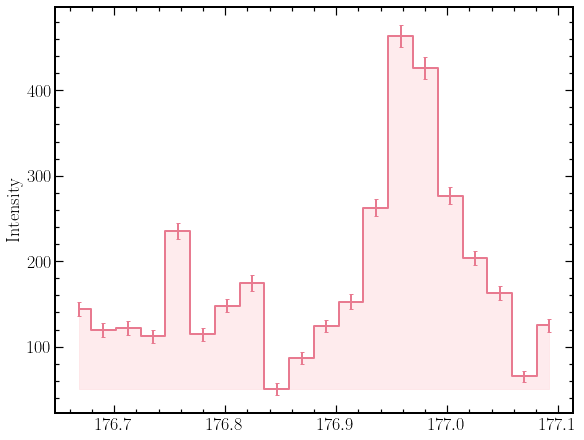

In [6]:
FeIX_176_slice = (460,480)
wvl_FeIX_176 = eis_wvl[FeIX_176_slice[0]:FeIX_176_slice[1]]
int_FeIX_176 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_176_slice[0]:FeIX_176_slice[1]],axis=0)

err_FeIX_176 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_176_slice[0]:FeIX_176_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_176_fit_model = SpectrumFitSingle(data=int_FeIX_176,wvl=wvl_FeIX_176,err=err_FeIX_176,
                                      same_width=False,line_number=2,line_wvl_init=[176.96,177.22],
                                      int_max_init=[400,2000],fwhm_init=[0.1,0.1])
FeIX_176_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_176_fit_model.run_HahnMC(n_chain=10000)
# FeIX_176_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=True,
#                         xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
#                         ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
# print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_176_fit_model.fwhm_fit_hmc**2 - \
# eis_slit_width_offset(387+256,2,FeIX_176_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04831286]


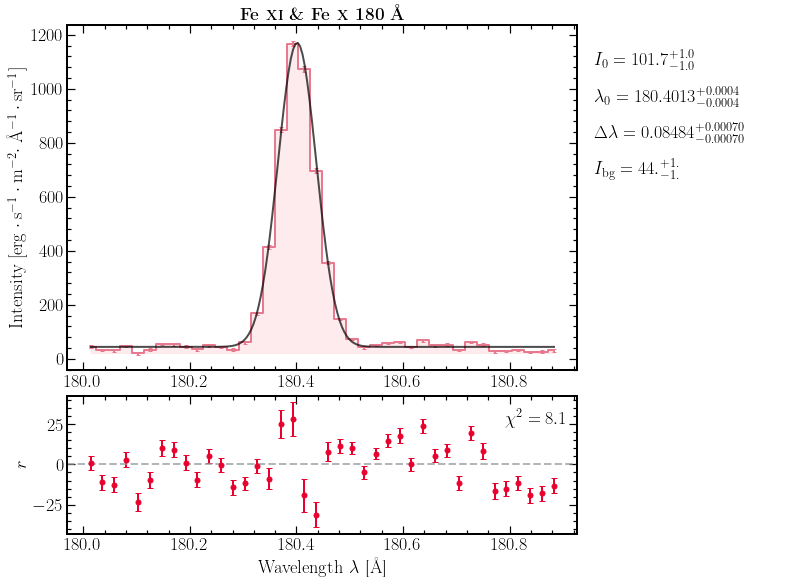

In [7]:
FeXI_FeX_180_slice = (610,650)
wvl_FeXI_FeX_180 = eis_wvl[FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]
int_FeXI_FeX_180 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]],axis=0)

err_FeXI_FeX_180 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeX_180_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_180,wvl=wvl_FeXI_FeX_180,err=err_FeXI_FeX_180,
                                      same_width=False,line_number=1,line_wvl_init=[180.4],
                                      int_max_init=[1100],fwhm_init=[0.1])
# FeXI_FeX_180_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_180_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_180_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 180 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_180_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXI_FeX_180_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03964947 0.04957636]


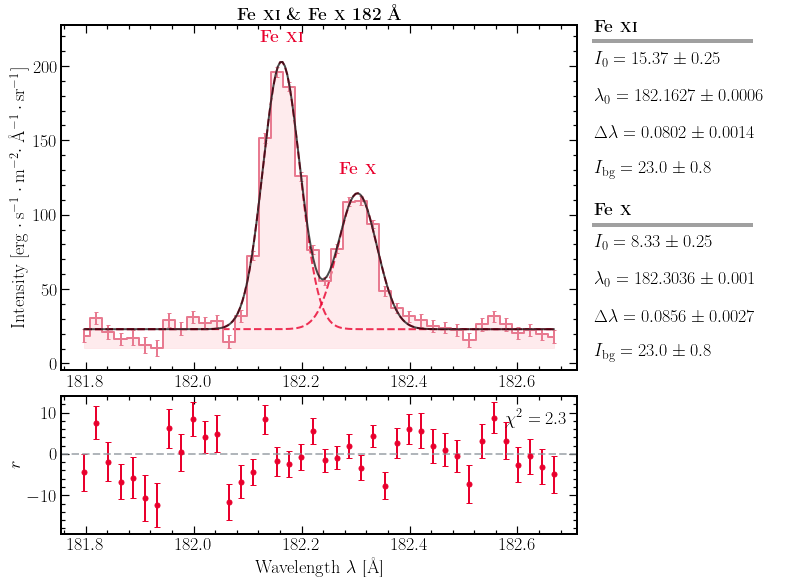

In [9]:
FeXI_FeX_182_slice = (690,730)
wvl_FeXI_FeX_182 = eis_wvl[FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]
int_FeXI_FeX_182 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]],axis=0)

err_FeXI_FeX_182 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeX_182_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_182,wvl=wvl_FeXI_FeX_182,err=err_FeXI_FeX_182,
                                      same_width=False,line_number=2,line_wvl_init=[182.15,182.3],
                                      int_max_init=[200,100],fwhm_init=[0.1,0.1])
#FeXI_FeX_182_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_182_fit_model.run_lse()
#FeXI_FeX_182_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_182_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 182 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_182_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_FeX_182_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06780727 0.04147806]


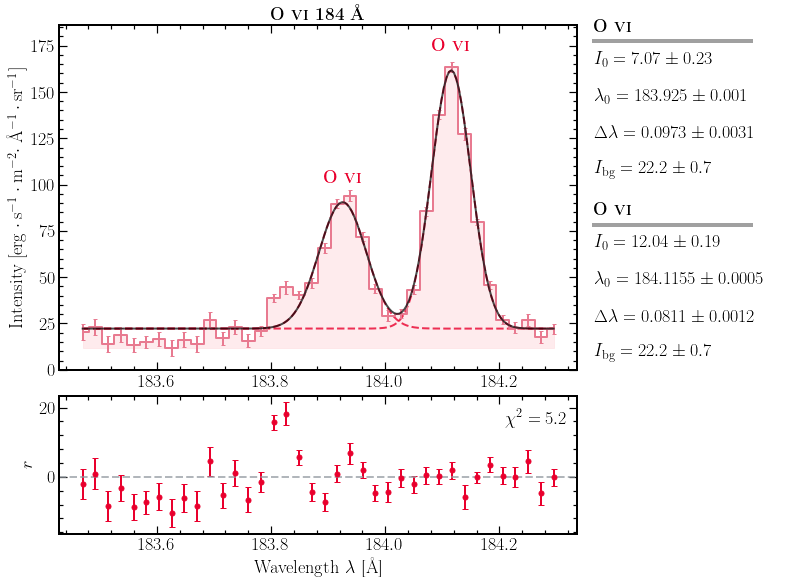

In [10]:
OVI_184_slice = (765,803)
wvl_OVI_184 = eis_wvl[OVI_184_slice[0]:OVI_184_slice[1]]
int_OVI_184 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    OVI_184_slice[0]:OVI_184_slice[1]],axis=0)

err_OVI_184 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        OVI_184_slice[0]:OVI_184_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

OVI_184_fit_model = SpectrumFitSingle(data=int_OVI_184,wvl=wvl_OVI_184,err=err_OVI_184,
                                      same_width=False,line_number=2,line_wvl_init=[183.93,184.1],
                                      int_max_init=[100,140],fwhm_init=[0.07,0.07])
# OVI_184_fit_model.plot(plot_fit=False,plot_params=False)
OVI_184_fit_model.run_lse()
# OVI_184_fit_model.run_HahnMC(n_chain=10000)
OVI_184_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 184 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{O \textsc{vi}}",r"\textbf{O \textsc{vi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(OVI_184_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,OVI_184_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.03714434]


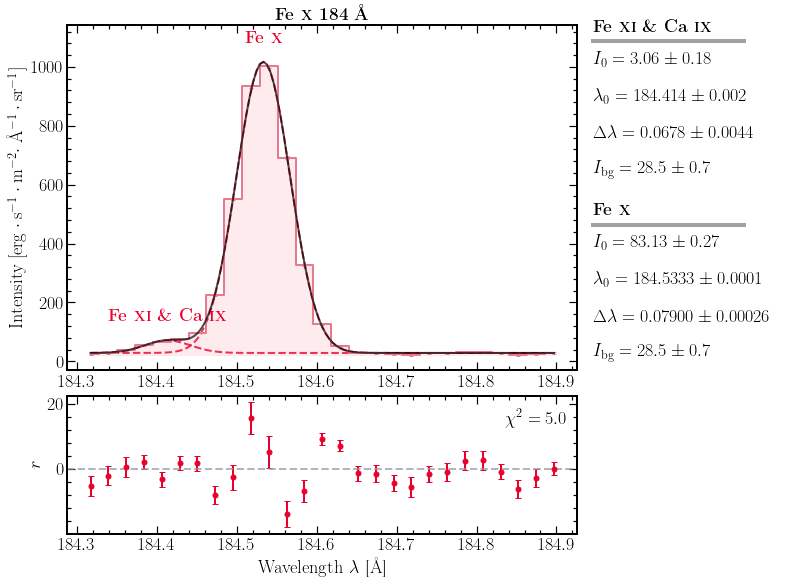

In [11]:
FeX_184_slice = (803,830)
wvl_FeX_184 = eis_wvl[FeX_184_slice[0]:FeX_184_slice[1]]
int_FeX_184 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_184_slice[0]:FeX_184_slice[1]],axis=0)

err_FeX_184 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_184_slice[0]:FeX_184_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_184_fit_model = SpectrumFitSingle(data=int_FeX_184,wvl=wvl_FeX_184,err=err_FeX_184,
                                      same_width=False,line_number=2,line_wvl_init=[184.4,184.55],
                                      int_max_init=[100,1000],fwhm_init=[0.07,0.07])
# FeX_184_fit_model.plot(plot_fit=False,plot_params=False)
FeX_184_fit_model.run_lse()
# FeX_184_fit_model.run_HahnMC(n_chain=10000)
FeX_184_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi} \& Ca \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_184_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeX_184_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03140789]


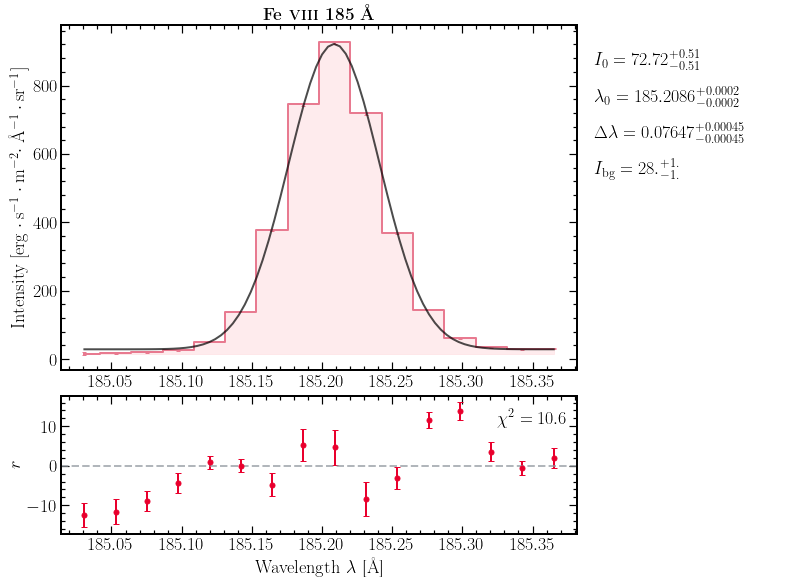

In [12]:
FeVIII_185_slice = (835,851)
wvl_FeVIII_185 = eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]]
int_FeVIII_185 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0)

err_FeVIII_185 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_185_slice[0]:FeVIII_185_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_185_fit_model = SpectrumFitSingle(data=int_FeVIII_185,wvl=wvl_FeVIII_185,err=err_FeVIII_185,
                                      same_width=False,line_number=1,line_wvl_init=[185.2],
                                      int_max_init=[800],fwhm_init=[0.07])
#FeVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_185_fit_model.run_HahnMC(n_chain=10000)
FeVIII_185_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeVIII_185_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06763006]


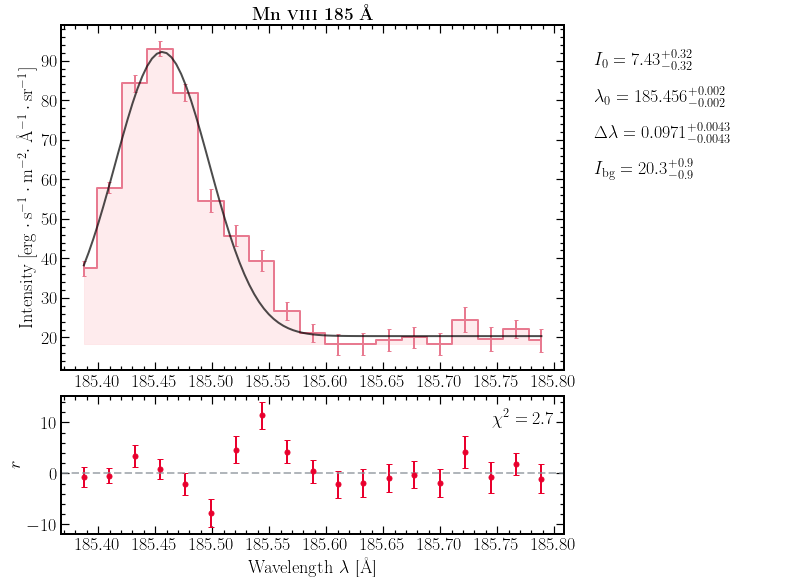

In [13]:
MnVIII_185_slice = (851,870)
wvl_MnVIII_185 = eis_wvl[MnVIII_185_slice[0]:MnVIII_185_slice[1]]
int_MnVIII_185 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnVIII_185_slice[0]:MnVIII_185_slice[1]],axis=0)

err_MnVIII_185 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnVIII_185_slice[0]:MnVIII_185_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnVIII_185_fit_model = SpectrumFitSingle(data=int_MnVIII_185,wvl=wvl_MnVIII_185,err=err_MnVIII_185,
                                      same_width=False,line_number=1,line_wvl_init=[185.45],
                                      int_max_init=[50],fwhm_init=[0.07])
#MnVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
MnVIII_185_fit_model.run_HahnMC(n_chain=10000)
#MnVIII_185_fit_model.run_lse()
MnVIII_185_fit_model.plot(plot_title=r"\textbf{Mn \textsc{viii} 185 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnVIII_185_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,MnVIII_185_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.054864      nan]


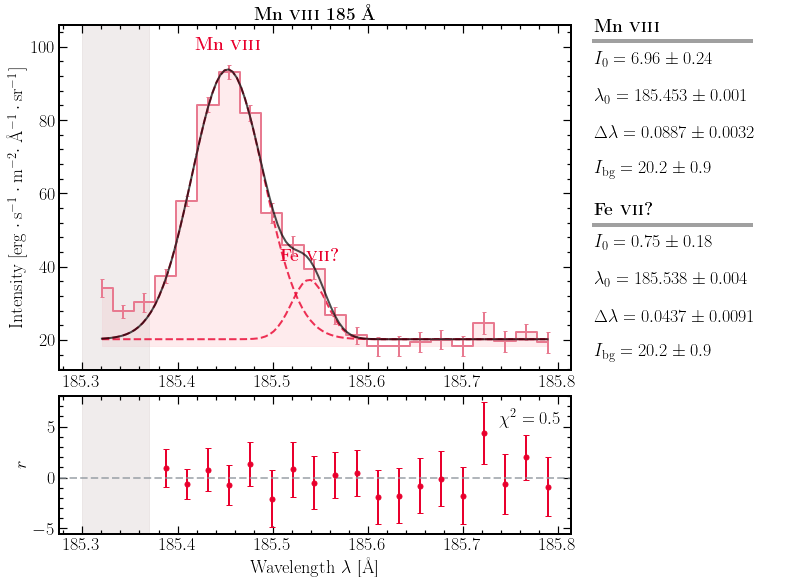

In [14]:
MnVIII_185_slice = (848,870)
wvl_MnVIII_185 = eis_wvl[MnVIII_185_slice[0]:MnVIII_185_slice[1]]
int_MnVIII_185 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnVIII_185_slice[0]:MnVIII_185_slice[1]],axis=0)

err_MnVIII_185 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnVIII_185_slice[0]:MnVIII_185_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnVIII_185_fit_model = SpectrumFitSingle(data=int_MnVIII_185,wvl=wvl_MnVIII_185,err=err_MnVIII_185,
                                      same_width=False,line_number=2,line_wvl_init=[185.45,185.5],
                                      int_max_init=[80,20],fwhm_init=[0.07,0.08],mask=[[185.3,185.37]])
#MnVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
# MnVIII_185_fit_model.run_HahnMC(n_chain=10000)
MnVIII_185_fit_model.run_lse()
MnVIII_185_fit_model.plot(plot_title=r"\textbf{Mn \textsc{viii} 185 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Mn \textsc{viii}}",r"\textbf{Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnVIII_185_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,MnVIII_185_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04469637 0.04469664]


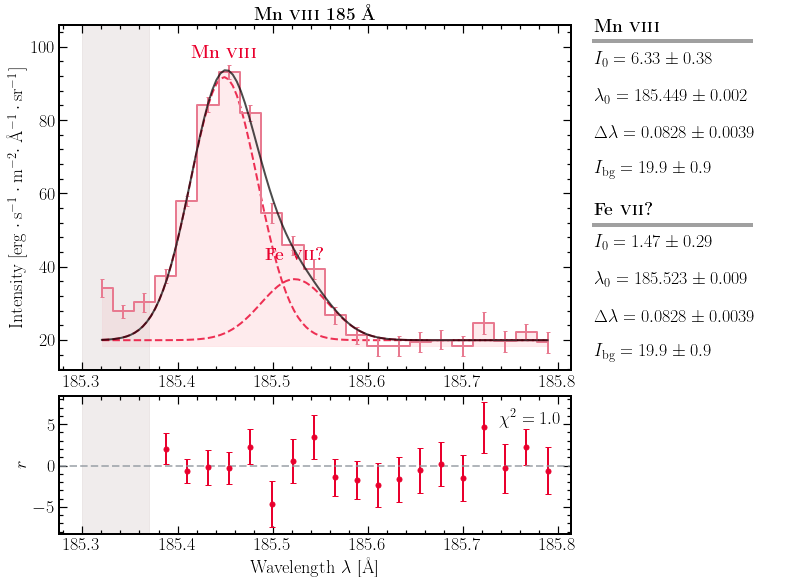

In [15]:
MnVIII_185_slice = (848,870)
wvl_MnVIII_185 = eis_wvl[MnVIII_185_slice[0]:MnVIII_185_slice[1]]
int_MnVIII_185 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnVIII_185_slice[0]:MnVIII_185_slice[1]],axis=0)

err_MnVIII_185 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnVIII_185_slice[0]:MnVIII_185_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnVIII_185_fit_model = SpectrumFitSingle(data=int_MnVIII_185,wvl=wvl_MnVIII_185,err=err_MnVIII_185,
                                      same_width=True,line_number=2,line_wvl_init=[185.45,185.5],
                                      int_max_init=[80,20],fwhm_init=[0.07],mask=[[185.3,185.37]])
#MnVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
# MnVIII_185_fit_model.run_HahnMC(n_chain=10000)
MnVIII_185_fit_model.run_lse()
MnVIII_185_fit_model.plot(plot_title=r"\textbf{Mn \textsc{viii} 185 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Mn \textsc{viii}}",r"\textbf{Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnVIII_185_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,MnVIII_185_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03880371]


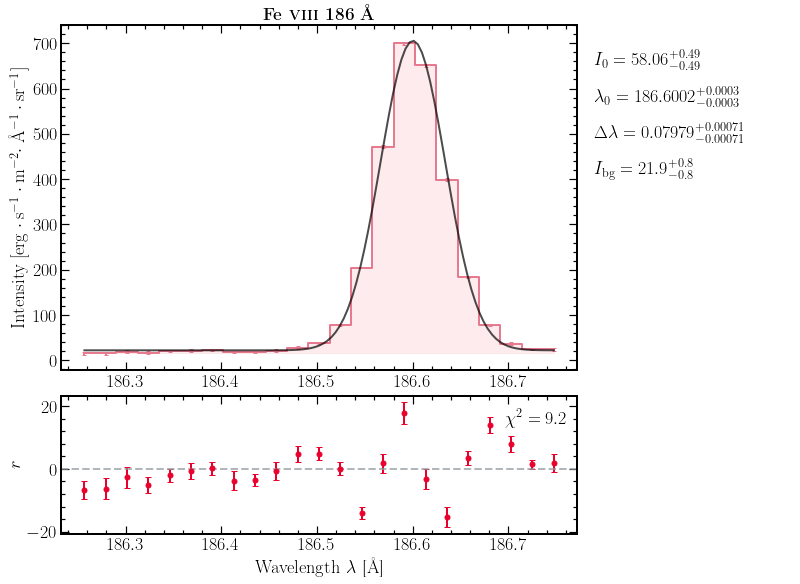

In [16]:
FeVIII_186_slice = (890,913)
wvl_FeVIII_186 = eis_wvl[FeVIII_186_slice[0]:FeVIII_186_slice[1]]
int_FeVIII_186 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_186_slice[0]:FeVIII_186_slice[1]],axis=0)

err_FeVIII_186 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_186_slice[0]:FeVIII_186_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_186_fit_model = SpectrumFitSingle(data=int_FeVIII_186,wvl=wvl_FeVIII_186,err=err_FeVIII_186,
                                      same_width=False,line_number=1,line_wvl_init=[186.6],
                                      int_max_init=[600],fwhm_init=[0.07])
# FeVIII_186_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_fit_model.run_HahnMC(n_chain=10000)
FeVIII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_186_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeVIII_186_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07378916 0.06820862]


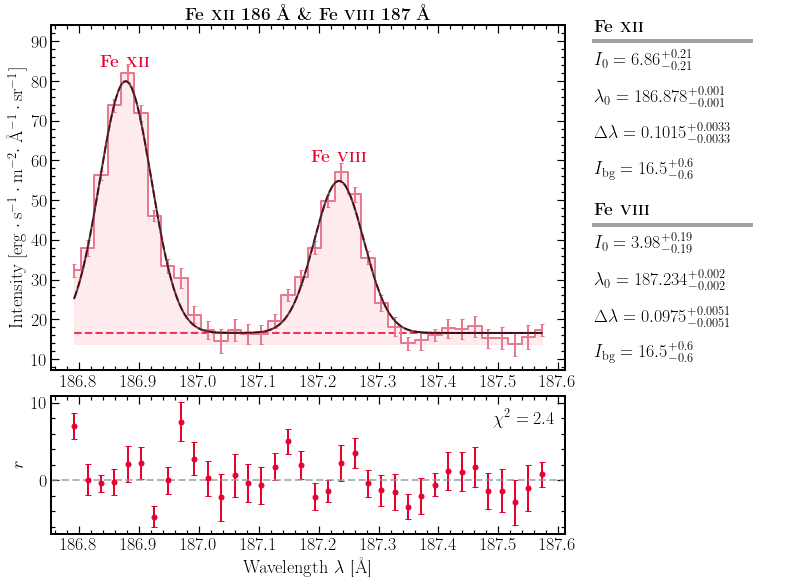

In [17]:
FeXII_186_slice = (914,950)
wvl_FeXII_186 = eis_wvl[FeXII_186_slice[0]:FeXII_186_slice[1]]
int_FeXII_186 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_186_slice[0]:FeXII_186_slice[1]],axis=0)

err_FeXII_186 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_186_slice[0]:FeXII_186_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_186_fit_model = SpectrumFitSingle(data=int_FeXII_186,wvl=wvl_FeXII_186,err=err_FeXII_186,
                                      same_width=False,line_number=2,line_wvl_init=[186.85,187.23],
                                      int_max_init=[80,60],fwhm_init=[0.07,0.07])
# FeXII_186_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_186_fit_model.run_HahnMC(n_chain=10000)
FeXII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA} \& Fe \textsc{viii} 187 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii}}",r"\textbf{Fe \textsc{viii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_186_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXII_186_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.02710319 0.03992283 0.03992319 0.0418475 ]


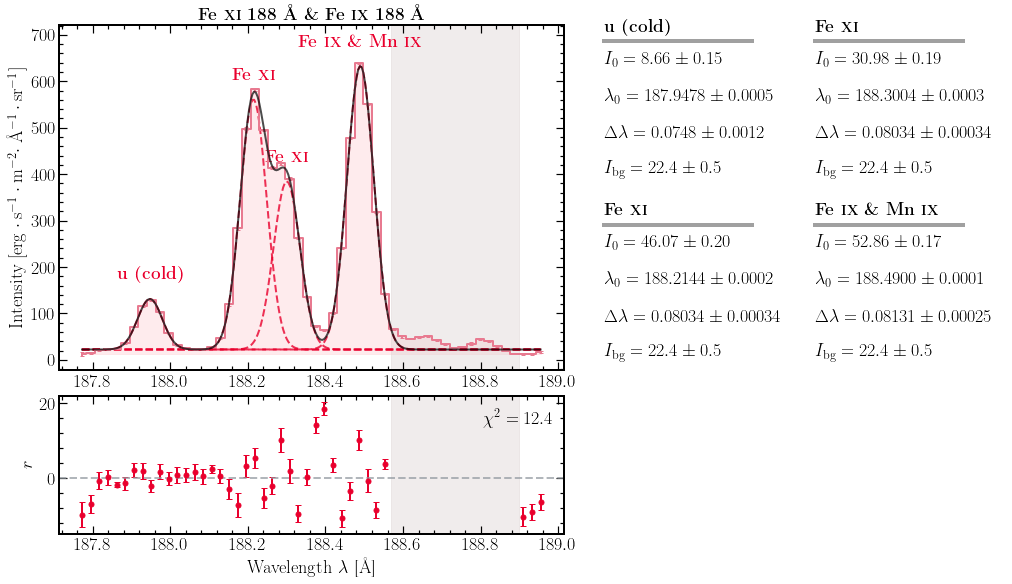

In [18]:
FeXI_188_slice = (958,1012)
wvl_FeXI_188 = eis_wvl[FeXI_188_slice[0]:FeXI_188_slice[1]]
int_FeXI_188 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_188_slice[0]:FeXI_188_slice[1]],axis=0)

err_FeXI_188 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_188_slice[0]:FeXI_188_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_188_fit_model = SpectrumFitSingle(data=int_FeXI_188,wvl=wvl_FeXI_188,err=err_FeXI_188,
                                      same_width=[False,True,True,False],line_number=4,
                                      line_wvl_init=[187.95,188.21,188.29,188.47],
                                      int_max_init=[100,600,400,600],
                                      fwhm_init=[0.07,0.07,0.07,0.07],mask=[[188.57,188.9]])
# FeXI_188_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_188_fit_model.run_lse()
FeXI_188_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA} \& Fe \textsc{ix} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u (cold)}",r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{ix} \& Mn \textsc{ix}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_188_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04118744 0.04118806]


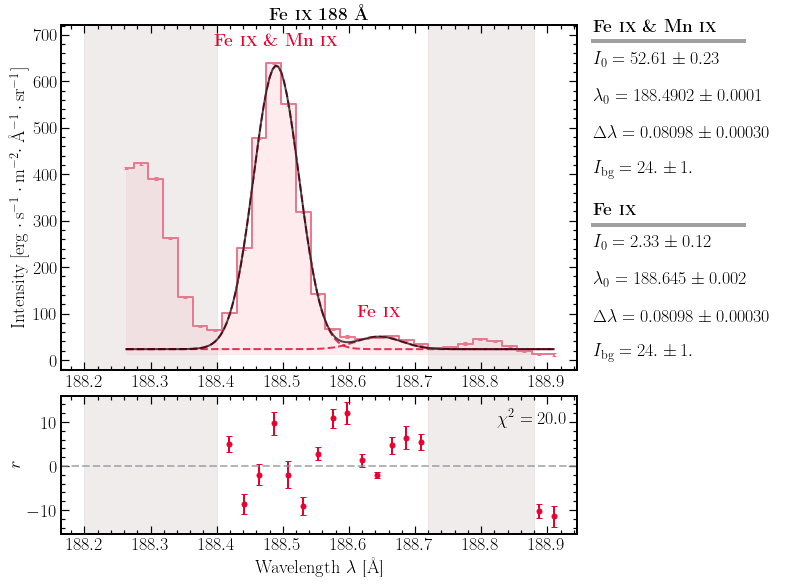

In [19]:
FeIX_188_slice = (980,1010)
wvl_FeIX_188 = eis_wvl[FeIX_188_slice[0]:FeIX_188_slice[1]]
int_FeIX_188 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_188_slice[0]:FeIX_188_slice[1]],axis=0)

err_FeIX_188 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_188_slice[0]:FeIX_188_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_188_fit_model = SpectrumFitSingle(data=int_FeIX_188,wvl=wvl_FeIX_188,err=err_FeIX_188,
                                      same_width=[True,True],line_number=2,
                                      line_wvl_init=[188.47,188.65],
                                      int_max_init=[600,50],
                                      fwhm_init=[0.08,0.08],mask=[[188.2,188.4],[188.72,188.88]])
# FeIX_188_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_188_fit_model.run_lse()
FeIX_188_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix} \& Mn \textsc{ix}}",r"\textbf{Fe \textsc{ix}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_188_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_188_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.08070423 0.05187681]


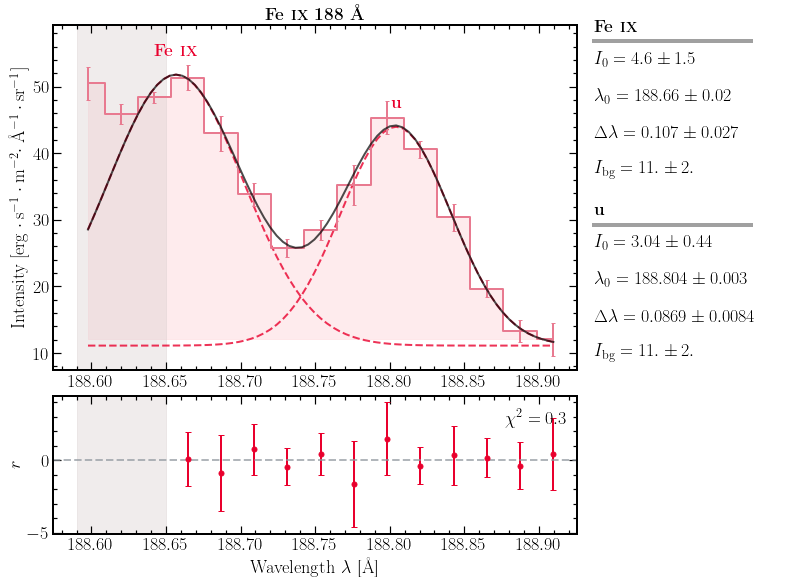

In [20]:
FeIX_188_2_slice = (995,1010)
wvl_FeIX_188_2 = eis_wvl[FeIX_188_2_slice[0]:FeIX_188_2_slice[1]]
int_FeIX_188_2 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_188_2_slice[0]:FeIX_188_2_slice[1]],axis=0)

err_FeIX_188_2 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_188_2_slice[0]:FeIX_188_2_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_188_2_fit_model = SpectrumFitSingle(data=int_FeIX_188_2,wvl=wvl_FeIX_188_2,err=err_FeIX_188_2,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[188.65,188.8],
                                      int_max_init=[50,40],int_cont_init=10,
                                      fwhm_init=[0.08,0.08],mask=[[188.59,188.65]])
# FeIX_188_2_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_188_2_fit_model.run_lse()
FeIX_188_2_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{u}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_188_2_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_188_2_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06562576 0.05054258]


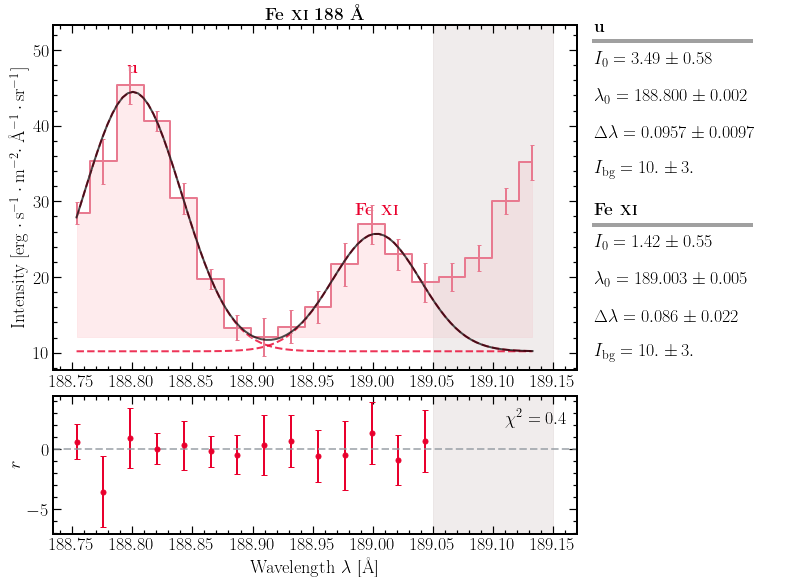

In [21]:
FeXI_188_189_slice = (1002,1020)
wvl_FeXI_188_189 = eis_wvl[FeXI_188_189_slice[0]:FeXI_188_189_slice[1]]
int_FeXI_188_189 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_188_189_slice[0]:FeXI_188_189_slice[1]],axis=0)

err_FeXI_188_189 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_188_189_slice[0]:FeXI_188_189_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_188_189_fit_model = SpectrumFitSingle(data=int_FeXI_188_189,wvl=wvl_FeXI_188_189,err=err_FeXI_188_189,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[188.8,189.0],
                                      int_max_init=[40,25],
                                      fwhm_init=[0.08,0.08],mask=[[189.05,189.15]])
# FeXI_188_189_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_188_189_fit_model.run_lse()
FeXI_188_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u}",r"\textbf{Fe \textsc{xi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_189_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_188_189_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0198385  0.04971189]


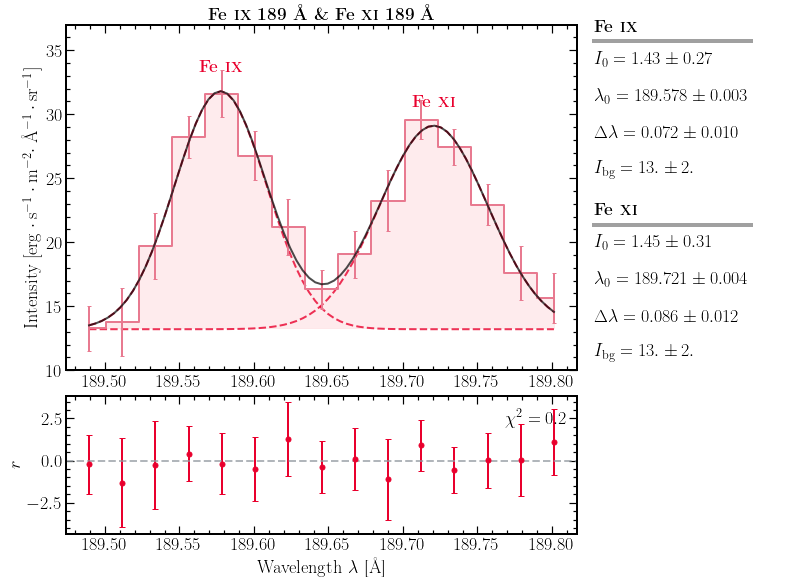

In [22]:
FeIX_FeXI_189_slice = (1035,1050)
wvl_FeIX_FeXI_189 = eis_wvl[FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]]
int_FeIX_FeXI_189 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]],axis=0)

err_FeIX_FeXI_189 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_FeXI_189_fit_model = SpectrumFitSingle(data=int_FeIX_FeXI_189,wvl=wvl_FeIX_FeXI_189,err=err_FeIX_FeXI_189,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[189.57,189.72],
                                      int_max_init=[30,30],
                                      fwhm_init=[0.08,0.08])
# FeIX_FeXI_189_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_FeXI_189_fit_model.run_lse()
FeIX_FeXI_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 189 \mbox{\AA} \& Fe \textsc{xi} 189 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{xi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_FeXI_189_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_FeXI_189_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.02791389 0.03977954]


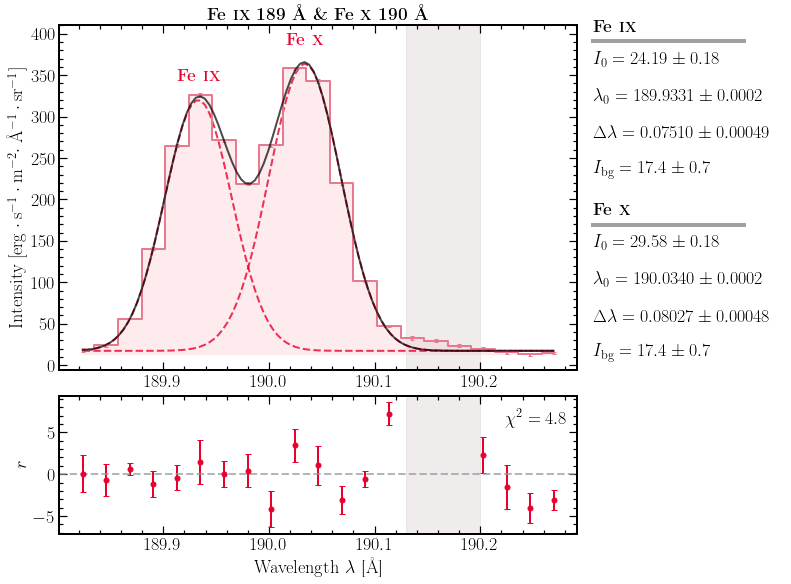

In [24]:
FeIX_189_FeX_190_slice = (1050,1071)
wvl_FeIX_189_FeX_190 = eis_wvl[FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]]
int_FeIX_189_FeX_190 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]],axis=0)

err_FeIX_189_FeX_190 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_189_FeX_190_fit_model = SpectrumFitSingle(data=int_FeIX_189_FeX_190,wvl=wvl_FeIX_189_FeX_190,err=err_FeIX_189_FeX_190,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[189.93,190.02],
                                      int_max_init=[300,300],
                                      fwhm_init=[0.08,0.08],mask=[[190.13,190.2]])
# FeIX_189_FeX_190_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_189_FeX_190_fit_model.run_HahnMC(n_chain=10000)
FeIX_189_FeX_190_fit_model.run_lse()
FeIX_189_FeX_190_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 189 \mbox{\AA} \& Fe \textsc{x} 190 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_189_FeX_190_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_189_FeX_190_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05468141]


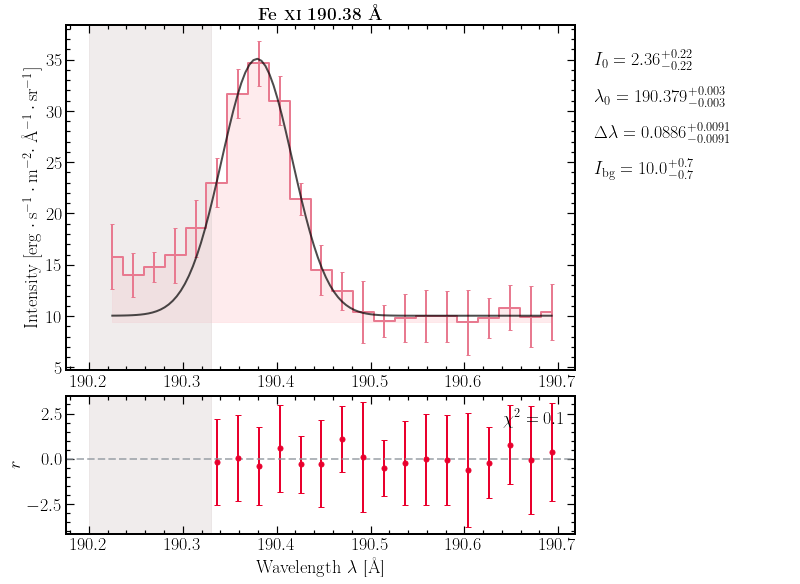

In [25]:
FeXI_190_slice = (1068,1090)
wvl_FeXI_190 = eis_wvl[FeXI_190_slice[0]:FeXI_190_slice[1]]
int_FeXI_190 = np.average(eis_img_aver[eis_range[0]:397,
                                    FeXI_190_slice[0]:FeXI_190_slice[1]],axis=0)

err_FeXI_190 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:397,
                        FeXI_190_slice[0]:FeXI_190_slice[1]]),axis=0))/(397-eis_range[0])

FeXI_190_fit_model = SpectrumFitSingle(data=int_FeXI_190,wvl=wvl_FeXI_190,err=err_FeXI_190,
                                      same_width=True,line_number=1,line_wvl_init=[190.37],
                                      int_max_init=[25],fwhm_init=[0.07],mask=[[190.2,190.33]])
# FeXI_190_fit_model.plot(plot_fit=False,plot_params=False,plot_title=r"\textbf{Fe \textsc{xi} 190.38 \mbox{\AA}}?")
FeXI_190_fit_model.run_HahnMC(n_chain=10000)
FeXI_190_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 190.38 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_190_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXI_190_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03305456]


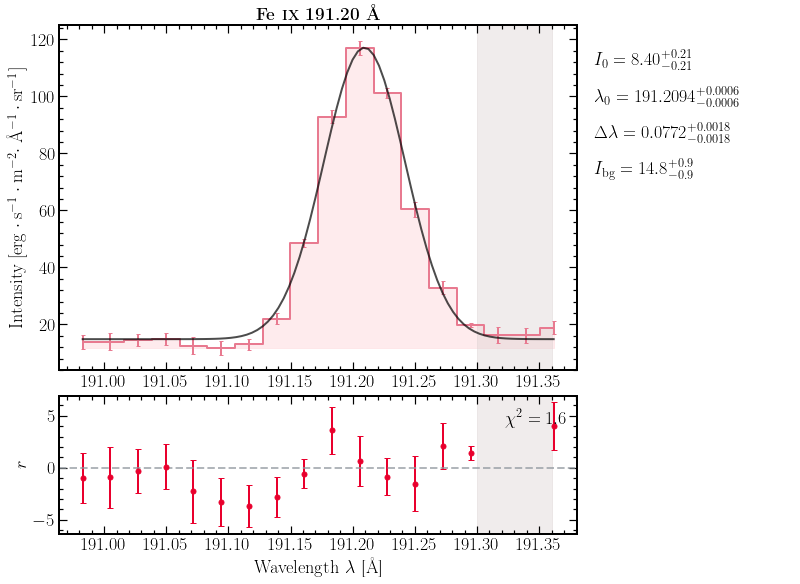

In [26]:
FeIX_191_slice = (1102,1120)
wvl_FeIX_191 = eis_wvl[FeIX_191_slice[0]:FeIX_191_slice[1]]
int_FeIX_191 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_191_slice[0]:FeIX_191_slice[1]],axis=0)

err_FeIX_191 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_191_slice[0]:FeIX_191_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_191_fit_model = SpectrumFitSingle(data=int_FeIX_191,wvl=wvl_FeIX_191,err=err_FeIX_191,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[191.2],
                                      int_max_init=[100],
                                      fwhm_init=[0.08],mask=[[191.3,191.36]])
# FeIX_191_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_191_fit_model.run_HahnMC(n_chain=10000)
# FeIX_191_fit_model.run_lse()
FeIX_191_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 191.20 \mbox{\AA}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_191_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeIX_191_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after remMnIXing instrumental broadening:  [0.05685183 0.05685235        nan]


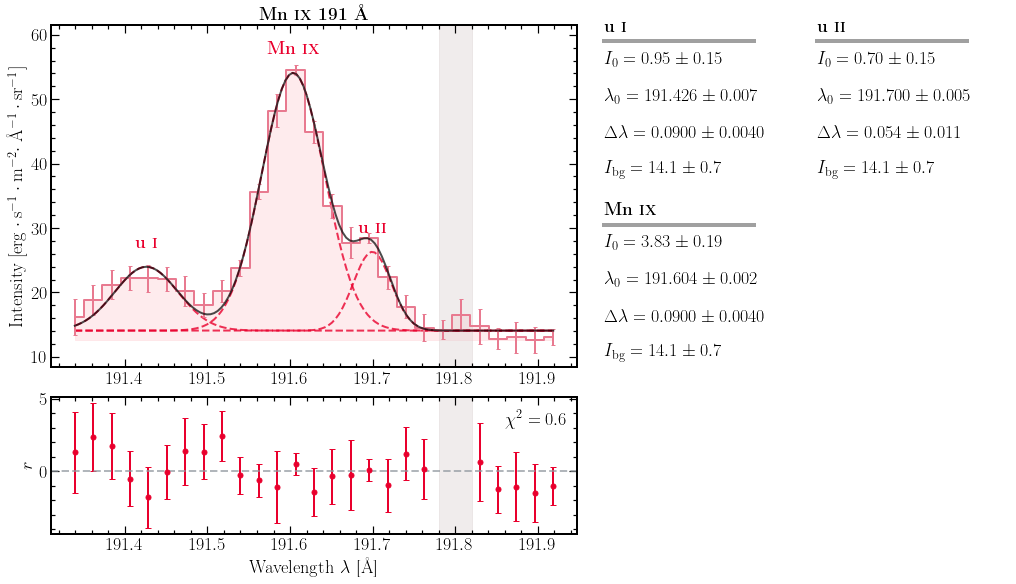

In [27]:
MnIX_191_slice = (1118,1145)
wvl_MnIX_191 = eis_wvl[MnIX_191_slice[0]:MnIX_191_slice[1]]
int_MnIX_191 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnIX_191_slice[0]:MnIX_191_slice[1]],axis=0)

err_MnIX_191 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnIX_191_slice[0]:MnIX_191_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnIX_191_fit_model = SpectrumFitSingle(data=int_MnIX_191,wvl=wvl_MnIX_191,err=err_MnIX_191,
                                      same_width=[True,True,False],line_number=3,
                                      line_wvl_init=[191.4,191.6,191.69],
                                      int_max_init=[10,40,20],
                                      fwhm_init=[0.08,0.08,0.08],mask=[[191.78,191.82]])
# MnIX_191_fit_model.plot(plot_fit=False,plot_params=False)
# MnIX_191_fit_model.run_HahnMC(n_chain=10000)
MnIX_191_fit_model.run_lse()
MnIX_191_fit_model.plot(plot_title=r"\textbf{Mn \textsc{ix} 191 \mbox{\AA}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{Mn \textsc{ix}}",
                                                                                r"\textbf{u \textsc{ii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after remMnIXing instrumental broadening: ",np.sqrt(MnIX_191_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,MnIX_191_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03205915 0.02616072 0.04852126 0.0361803  0.0418914 ]


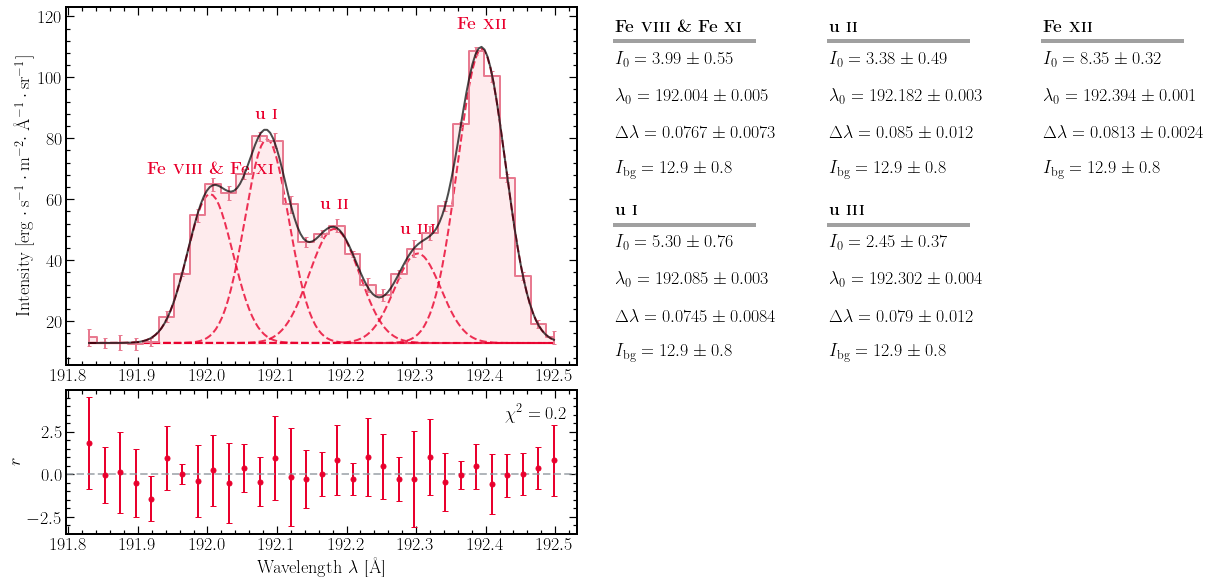

In [28]:
FeVIII_FeXI_192_slice = (1140,1171)
wvl_FeVIII_FeXI_192 = eis_wvl[FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]]
int_FeVIII_FeXI_192 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]],axis=0)

err_FeVIII_FeXI_192 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_FeXI_192_fit_model = SpectrumFitSingle(data=int_FeVIII_FeXI_192,wvl=wvl_FeVIII_FeXI_192,err=err_FeVIII_FeXI_192,
                                      same_width=False,line_number=5,
                                      line_wvl_init=[191.98,192.05,192.18,192.3,192.4],
                                      int_max_init=[50,60,30,30,100],
                                      fwhm_init=[0.08,0.08,0.08,0.08,0.08])
# FeVIII_FeXI_192_fit_model.plot(plot_fit=False,plot_params=False)
# # FeVIII_FeXI_192_fit_model.run_HahnMC(n_chain=10000)
FeVIII_FeXI_192_fit_model.run_lse()
FeVIII_FeXI_192_fit_model.plot(plot_title=None,plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii} \& \textbf{Fe \textsc{xi}}}",
                            r"\textbf{u \textsc{i}}",r"\textbf{u \textsc{ii}}",r"\textbf{u \textsc{iii}}",r"\textbf{Fe \textsc{xii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
# r"\textbf{Fe \textsc{viii} 192 \mbox{\AA} \& Fe \textsc{xii} 192 \mbox{\AA}"
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_FeXI_192_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_FeXI_192_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04268082 0.06220135 0.01295588]


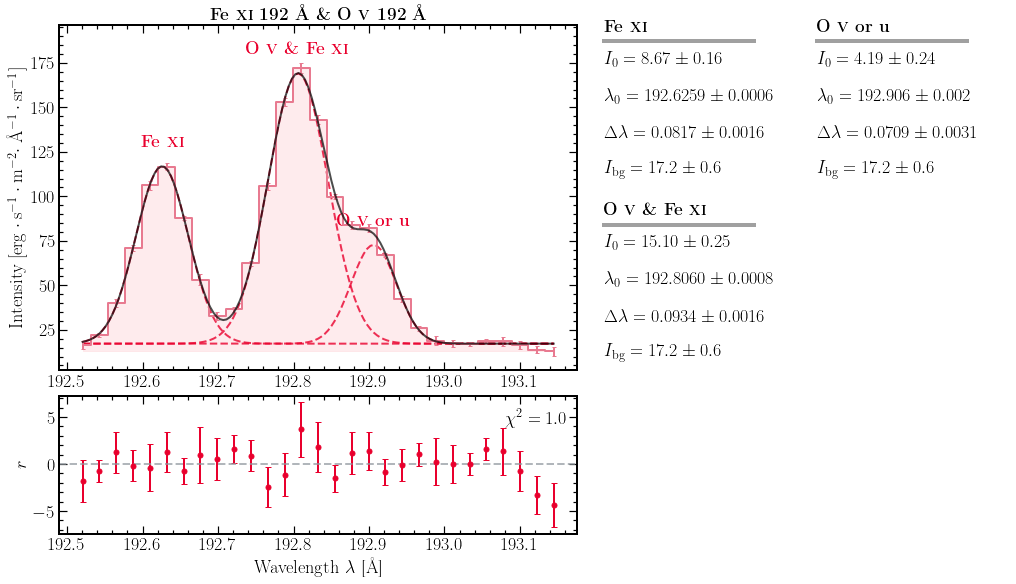

In [29]:
FeIX_OV_192_slice = (1171,1200)
wvl_FeIX_OV_192 = eis_wvl[FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]]
int_FeIX_OV_192 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]],axis=0)

err_FeIX_OV_192 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_OV_192_fit_model = SpectrumFitSingle(data=int_FeIX_OV_192,wvl=wvl_FeIX_OV_192,err=err_FeIX_OV_192,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[192.61,192.8,192.9],
                                      int_max_init=[100,160,65],
                                      fwhm_init=[0.08,0.08,0.08])
# FeIX_OV_192_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_OV_192_fit_model.run_HahnMC(n_chain=10000)
FeIX_OV_192_fit_model.run_lse()
FeIX_OV_192_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 192 \mbox{\AA} \& O \textsc{v} 192 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{O \textsc{v} \& Fe \textsc{xi}}",r"\textbf{O \textsc{v} or u}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_OV_192_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_OV_192_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.04039937 0.03463146]


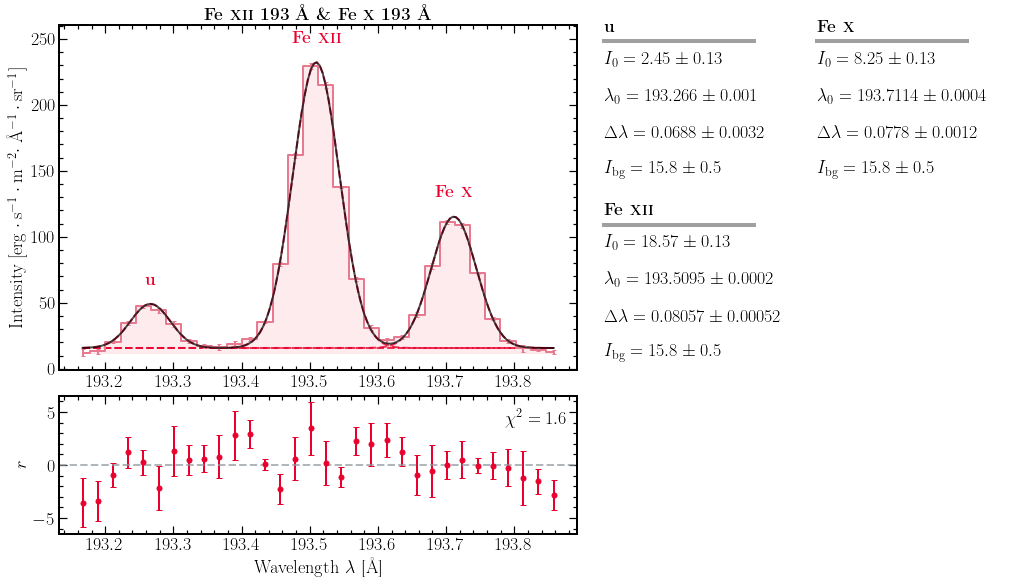

In [30]:
FeXII_FeX_193_slice = (1200,1232)
wvl_FeXII_FeX_193 = eis_wvl[FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]]
int_FeXII_FeX_193 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]],axis=0)

err_FeXII_FeX_193 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_FeX_193_fit_model = SpectrumFitSingle(data=int_FeXII_FeX_193,wvl=wvl_FeXII_FeX_193,err=err_FeXII_FeX_193,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[193.25,193.5,193.7],
                                      int_max_init=[40,200,90],
                                      fwhm_init=[0.08,0.08,0.08])
# FeXII_FeX_193_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXII_FeX_193_fit_model.run_HahnMC(n_chain=10000)
FeXII_FeX_193_fit_model.run_lse()
FeXII_FeX_193_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA} \& Fe \textsc{x} 193 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u}",r"\textbf{Fe \textsc{xii}}",
                                                                                    r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_FeX_193_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXII_FeX_193_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan        nan 0.03108393]


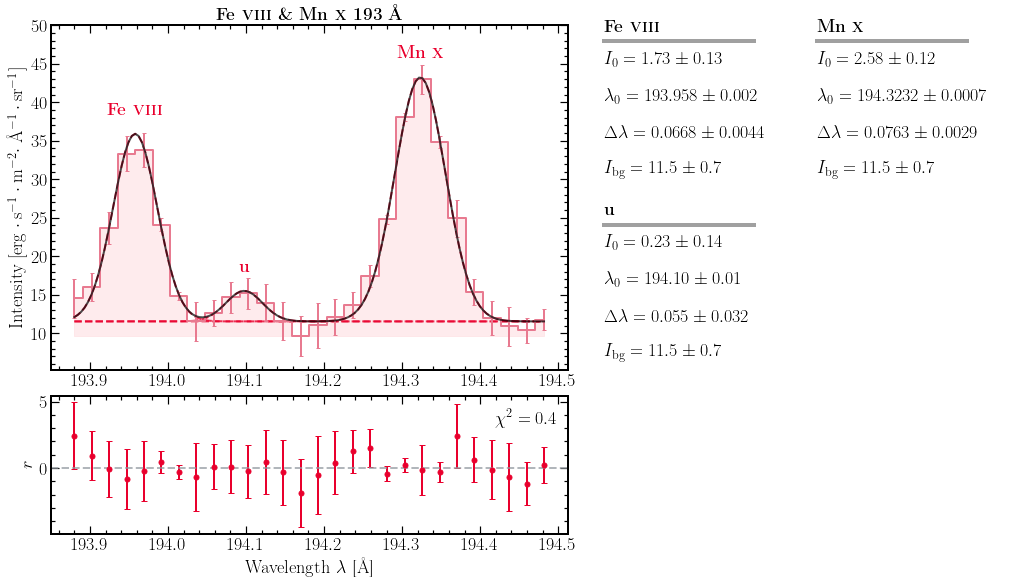

In [31]:
FeVIII_193_slice = (1232,1260)
wvl_FeVIII_193 = eis_wvl[FeVIII_193_slice[0]:FeVIII_193_slice[1]]
int_FeVIII_193 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_193_slice[0]:FeVIII_193_slice[1]],axis=0)

err_FeVIII_193 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_193_slice[0]:FeVIII_193_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_193_fit_model = SpectrumFitSingle(data=int_FeVIII_193,wvl=wvl_FeVIII_193,err=err_FeVIII_193,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[193.95,194.08,194.3],
                                      int_max_init=[30,10,30],
                                      fwhm_init=[0.08,0.08,0.08],int_cont_init=5)
# FeVIII_193_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_193_fit_model.run_HahnMC(n_chain=10000)
FeVIII_193_fit_model.run_lse()
FeVIII_193_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} \& Mn \textsc{x} 193 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{u}",
                                                                                r"\textbf{Mn \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_193_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_193_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0306692]


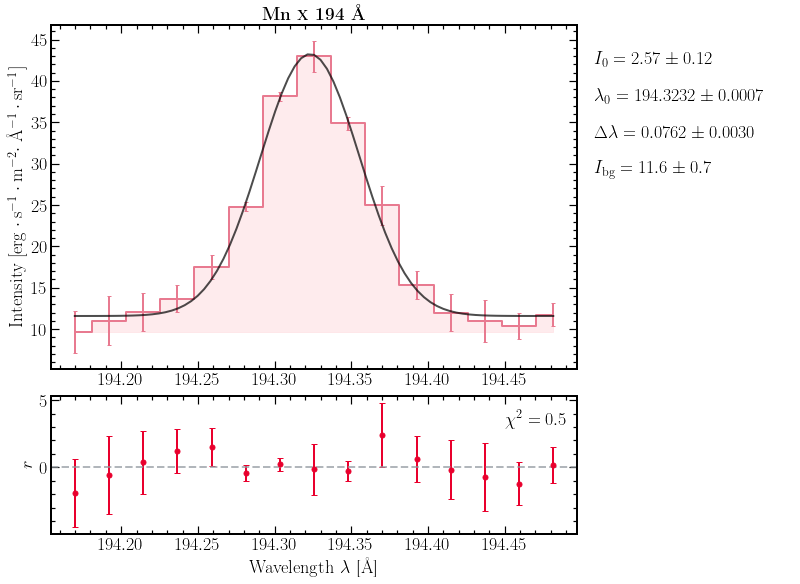

In [32]:
MnX_194_slice = (1245,1260)
wvl_MnX_194 = eis_wvl[MnX_194_slice[0]:MnX_194_slice[1]]
int_MnX_194 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnX_194_slice[0]:MnX_194_slice[1]],axis=0)

err_MnX_194 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnX_194_slice[0]:MnX_194_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnX_194_fit_model = SpectrumFitSingle(data=int_MnX_194,wvl=wvl_MnX_194,err=err_MnX_194,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[194.3],
                                      int_max_init=[30],
                                      fwhm_init=[0.08],int_cont_init=5)
# MnX_194_fit_model.plot(plot_fit=False,plot_params=False)
MnX_194_fit_model.run_HahnMC(n_chain=10000)
# MnX_194_fit_model.run_lse()
MnX_194_fit_model.plot(plot_title=r"\textbf{Mn \textsc{x} 194 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnX_194_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,MnX_194_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03309636 0.06195259]


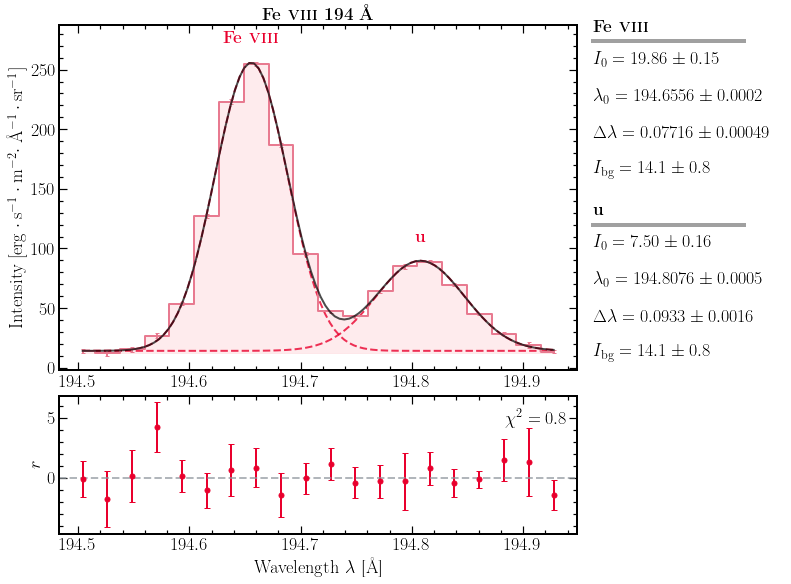

In [33]:
FeVIII_194_slice = (1260,1280)
wvl_FeVIII_194 = eis_wvl[FeVIII_194_slice[0]:FeVIII_194_slice[1]]
int_FeVIII_194 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_194_slice[0]:FeVIII_194_slice[1]],axis=0)

err_FeVIII_194 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_194_slice[0]:FeVIII_194_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_194_fit_model = SpectrumFitSingle(data=int_FeVIII_194,wvl=wvl_FeVIII_194,err=err_FeVIII_194,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[194.65,194.8],
                                      int_max_init=[250,80],
                                      fwhm_init=[0.08,0.08])
# FeVIII_194_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_194_fit_model.run_HahnMC(n_chain=10000)
FeVIII_194_fit_model.run_lse()
FeVIII_194_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 194 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{u}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_194_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_194_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0475377]


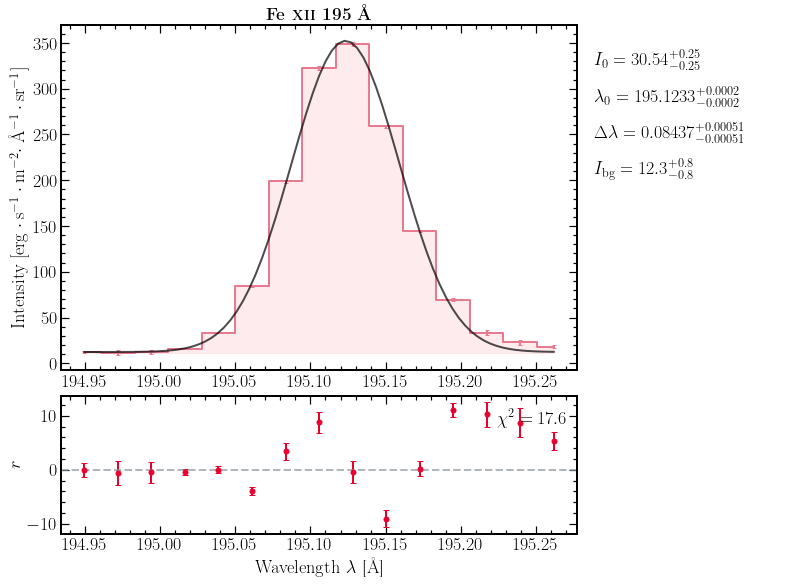

In [34]:
FeXII_195_slice = (1280,1295)
wvl_FeXII_195 = eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

err_FeXII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_195_slice[0]:FeXII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=err_FeXII_195,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[195.15],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_model.run_HahnMC(n_chain=10000)
# FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03785602 0.0378563 ]


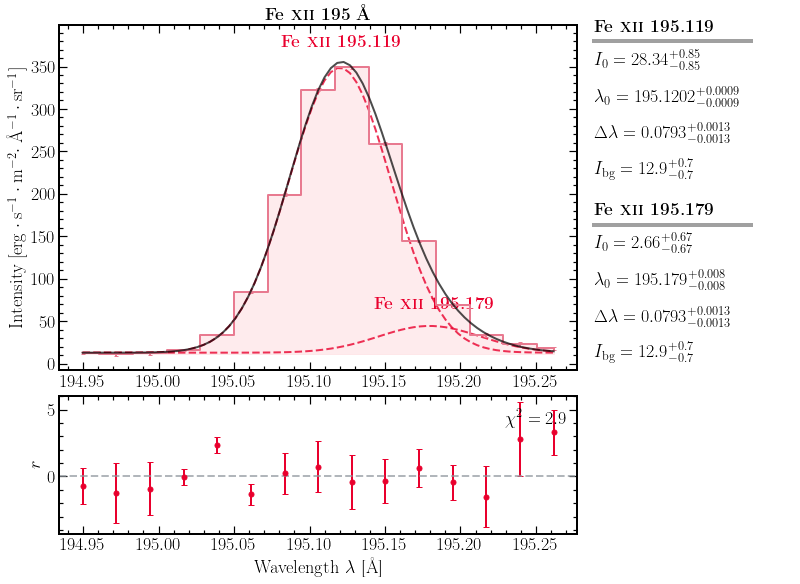

In [35]:
FeXII_195_slice = (1280,1295)
wvl_FeXII_195 = eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

err_FeXII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_195_slice[0]:FeXII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=err_FeXII_195,
                                      same_width=True,line_number=2,
                                      line_wvl_init=[195.15,195.20],
                                      int_max_init=[350,10],
                                      fwhm_init=[0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_model.run_HahnMC(n_chain=10000)
# FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii} 195.119}",
                                                                    r"\textbf{Fe \textsc{xii} 195.179}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.03786753 0.03786779 0.03991568        nan]


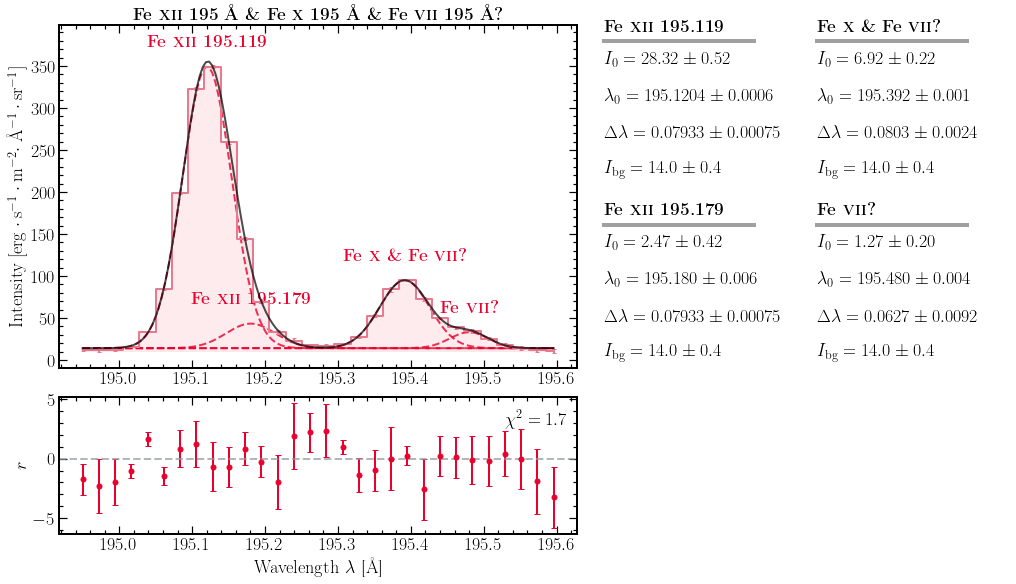

In [36]:
FeX_195_slice = (1280,1310)
wvl_FeX_195 = eis_wvl[FeX_195_slice[0]:FeX_195_slice[1]]
int_FeX_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_195_slice[0]:FeX_195_slice[1]],axis=0)

err_FeX_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_195_slice[0]:FeX_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_195_fit_model = SpectrumFitSingle(data=int_FeX_195,wvl=wvl_FeX_195,err=err_FeX_195,
                                      same_width=[True,True,False,False],line_number=4,
                                      line_wvl_init=[195.11,195.178,195.37,195.47],
                                      int_max_init=[350,10,60,30],
                                      fwhm_init=[0.08,0.08,0.08,0.08])
# FeX_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeX_195_fit_model.run_HahnMC(n_chain=10000)
FeX_195_fit_model.run_lse()
FeX_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA} \& Fe \textsc{x} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}? }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii} 195.119}",
                                                                    r"\textbf{Fe \textsc{xii} 195.179}",r"\textbf{Fe \textsc{x} \& Fe \textsc{vii}?}",r"\textbf{Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeX_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05019086        nan]


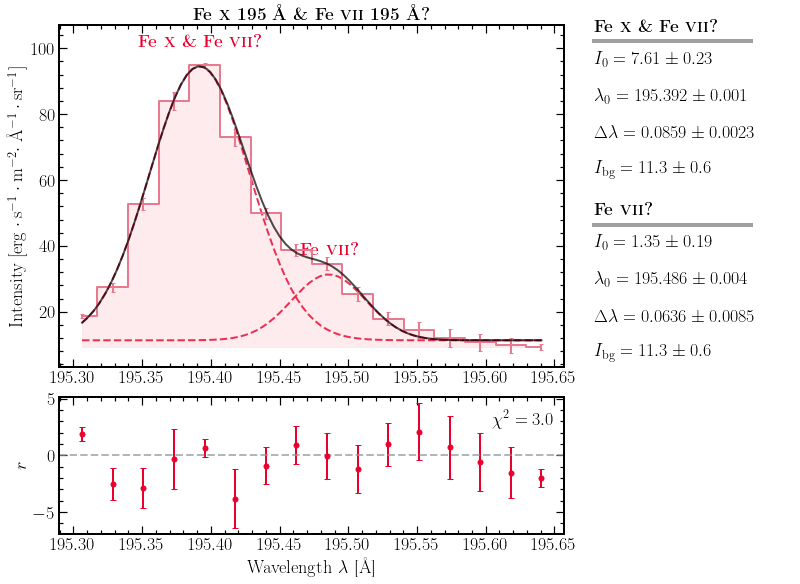

In [37]:
FeX_195_slice = (1296,1312)
wvl_FeX_195 = eis_wvl[FeX_195_slice[0]:FeX_195_slice[1]]
int_FeX_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_195_slice[0]:FeX_195_slice[1]],axis=0)

err_FeX_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_195_slice[0]:FeX_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_195_fit_model = SpectrumFitSingle(data=int_FeX_195,wvl=wvl_FeX_195,err=err_FeX_195,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[195.37,195.47],
                                      int_max_init=[60,30],
                                      fwhm_init=[0.08,0.08])
# FeX_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeX_195_fit_model.run_HahnMC(n_chain=10000)
FeX_195_fit_model.run_lse()
FeX_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{x} \& Fe \textsc{vii}?}",r"\textbf{Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeX_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.04882079 0.03884287]


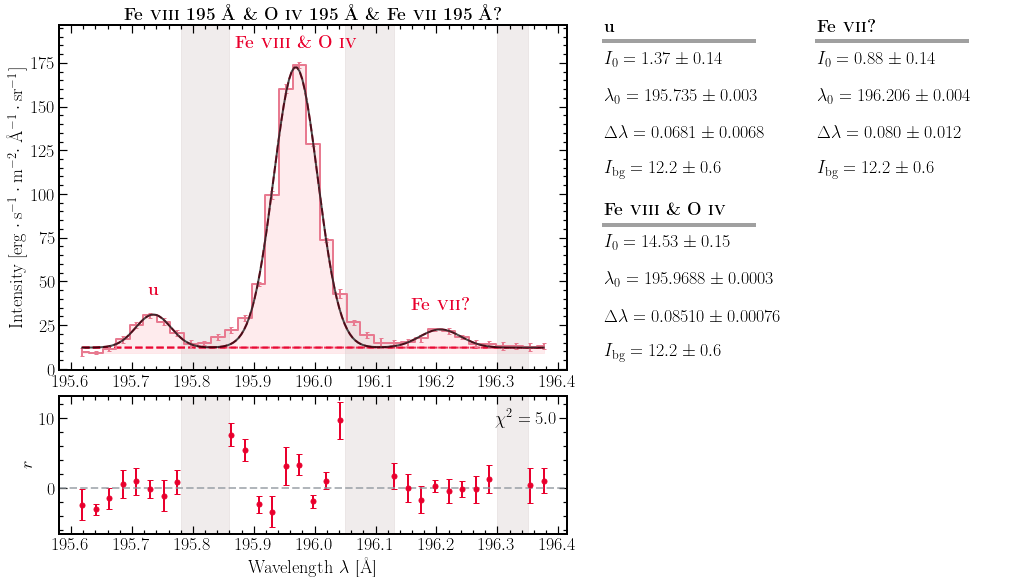

In [38]:
FeVIII_195_slice = (1310,1345)
wvl_FeVIII_195 = eis_wvl[FeVIII_195_slice[0]:FeVIII_195_slice[1]]
int_FeVIII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_195_slice[0]:FeVIII_195_slice[1]],axis=0)

err_FeVIII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_195_slice[0]:FeVIII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_195_fit_model = SpectrumFitSingle(data=int_FeVIII_195,wvl=wvl_FeVIII_195,err=err_FeVIII_195,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[195.72,195.95,196.2],
                                      int_max_init=[20,150,10],
                                      fwhm_init=[0.08,0.08,0.08],mask=[[195.78,195.86],[196.05,196.13],[196.3,196.35]])
# FeVIII_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_195_fit_model.run_HahnMC(n_chain=10000)
FeVIII_195_fit_model.run_lse()
FeVIII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 195 \mbox{\AA} \& O \textsc{iv} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u}",r"\textbf{Fe \textsc{viii} \& O \textsc{iv}}",
                                                                                    r"\textbf{Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.01954037 0.0792455  0.02472618 0.07924577 0.06811608]


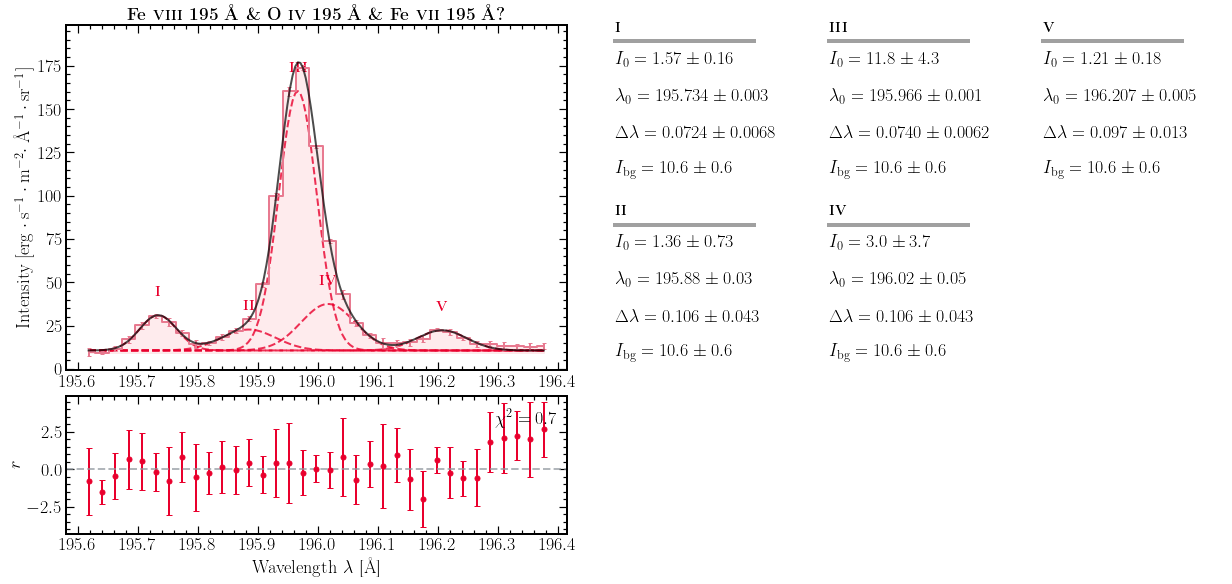

In [39]:
FeVIII_195_slice = (1310,1345)
wvl_FeVIII_195 = eis_wvl[FeVIII_195_slice[0]:FeVIII_195_slice[1]]
int_FeVIII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_195_slice[0]:FeVIII_195_slice[1]],axis=0)

err_FeVIII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_195_slice[0]:FeVIII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_195_fit_model = SpectrumFitSingle(data=int_FeVIII_195,wvl=wvl_FeVIII_195,err=err_FeVIII_195,
                                      same_width=[False,True,False,True,False],line_number=5,
                                      line_wvl_init=[195.72,195.85,195.95,196.05,196.2],
                                      int_max_init=[20,10,150,10,10],
                                      fwhm_init=[0.08,0.08,0.08,0.08,0.08])
# FeVIII_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_195_fit_model.run_HahnMC(n_chain=10000)
FeVIII_195_fit_model.run_lse()
FeVIII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 195 \mbox{\AA} \& O \textsc{iv} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [nan]


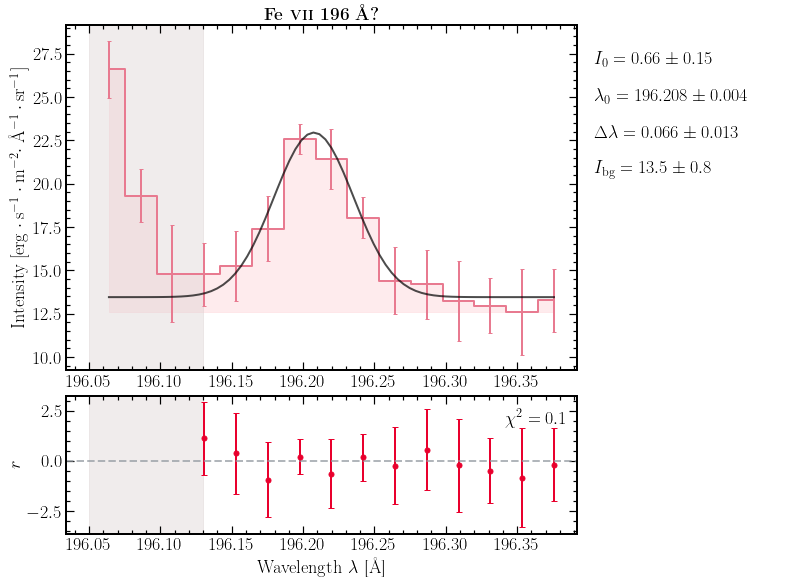

In [40]:
FeVII_196_slice = (1330,1345)
wvl_FeVII_196 = eis_wvl[FeVII_196_slice[0]:FeVII_196_slice[1]]
int_FeVII_196 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVII_196_slice[0]:FeVII_196_slice[1]],axis=0)

err_FeVII_196 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVII_196_slice[0]:FeVII_196_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVII_196_fit_model = SpectrumFitSingle(data=int_FeVII_196,wvl=wvl_FeVII_196,err=err_FeVII_196,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[196.2],
                                      int_max_init=[10],
                                      fwhm_init=[0.08],mask=[[196.05,196.13]])
# FeVII_196_fit_model.plot(plot_fit=False,plot_params=False)
FeVII_196_fit_model.run_HahnMC(n_chain=10000)
# FeVII_196_fit_model.run_lse()
FeVII_196_fit_model.plot(plot_title=r"\textbf{Fe \textsc{vii} 196 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVII_196_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVII_196_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.04145533 0.00949813]


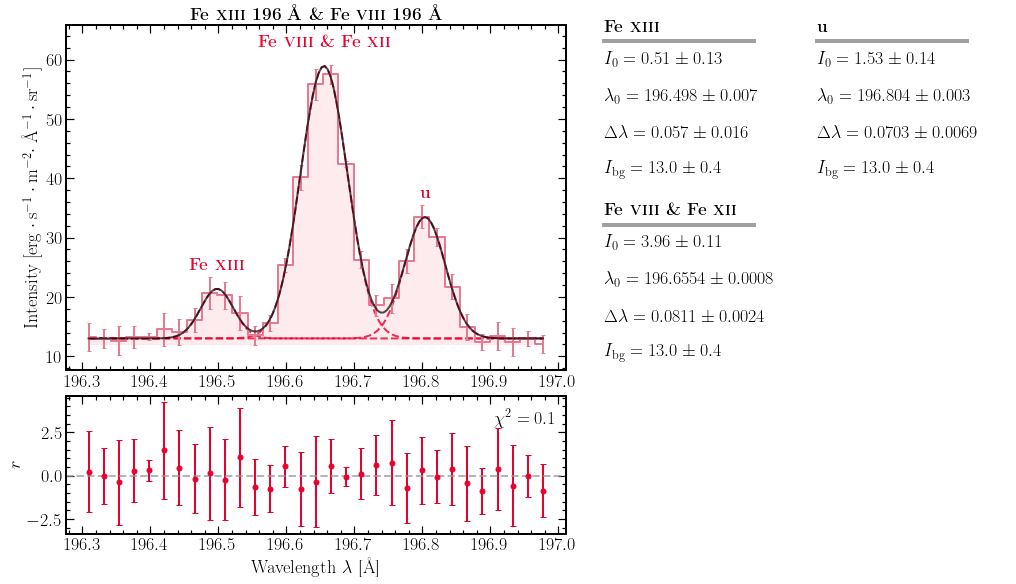

In [41]:
FeXIII_FeVIII_196_slice = (1341,1372)
wvl_FeXIII_FeVIII_196 = eis_wvl[FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]]
int_FeXIII_FeVIII_196 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]],axis=0)

err_FeXIII_FeVIII_196 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXIII_FeVIII_196_fit_model = SpectrumFitSingle(data=int_FeXIII_FeVIII_196,wvl=wvl_FeXIII_FeVIII_196,err=err_FeXIII_FeVIII_196,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[196.5,196.65,196.8],
                                      int_max_init=[10,50,20],
                                      fwhm_init=[0.08,0.08,0.08])
# FeXIII_FeVIII_196_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXIII_FeVIII_196_fit_model.run_HahnMC(n_chain=10000)
FeXIII_FeVIII_196_fit_model.run_lse()
FeXIII_FeVIII_196_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xiii} 196 \mbox{\AA} \& Fe \textsc{viii} 196 \mbox{\AA}}",
                        plot_hmc=False,xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xiii}}",r"\textbf{Fe \textsc{viii} \& Fe \textsc{xii}}",
                                                                                            r"\textbf{u}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXIII_FeVIII_196_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXIII_FeVIII_196_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06305191 0.05472624]


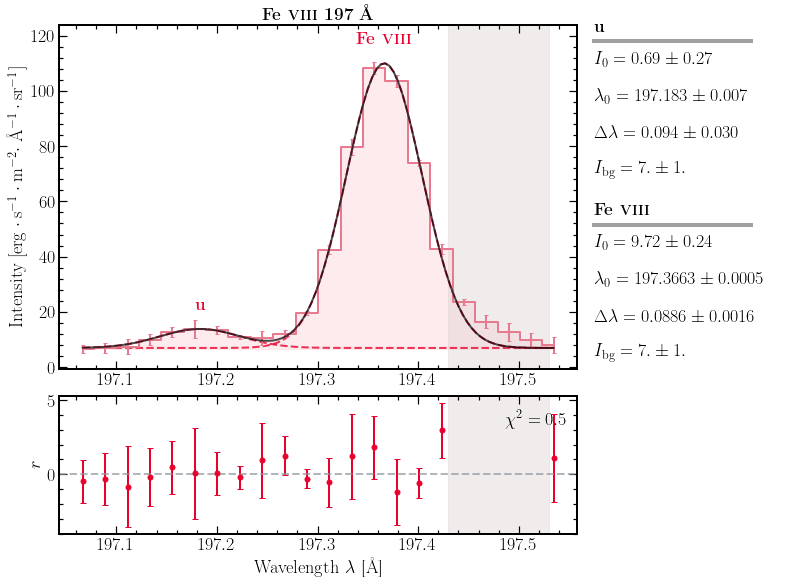

In [42]:
FeVIII_197_slice = (1375,1397)
wvl_FeVIII_197 = eis_wvl[FeVIII_197_slice[0]:FeVIII_197_slice[1]]
int_FeVIII_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_197_slice[0]:FeVIII_197_slice[1]],axis=0)

err_FeVIII_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_197_slice[0]:FeVIII_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_197_fit_model = SpectrumFitSingle(data=int_FeVIII_197,wvl=wvl_FeVIII_197,err=err_FeVIII_197,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[197.17,197.36],
                                      int_max_init=[5,100],
                                      fwhm_init=[0.08,0.08],mask=[[197.43,197.53]])
# FeVIII_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_197_fit_model.run_HahnMC(n_chain=10000)
FeVIII_197_fit_model.run_lse()
FeVIII_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 197 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u}",r"\textbf{Fe \textsc{viii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.04097695        nan]


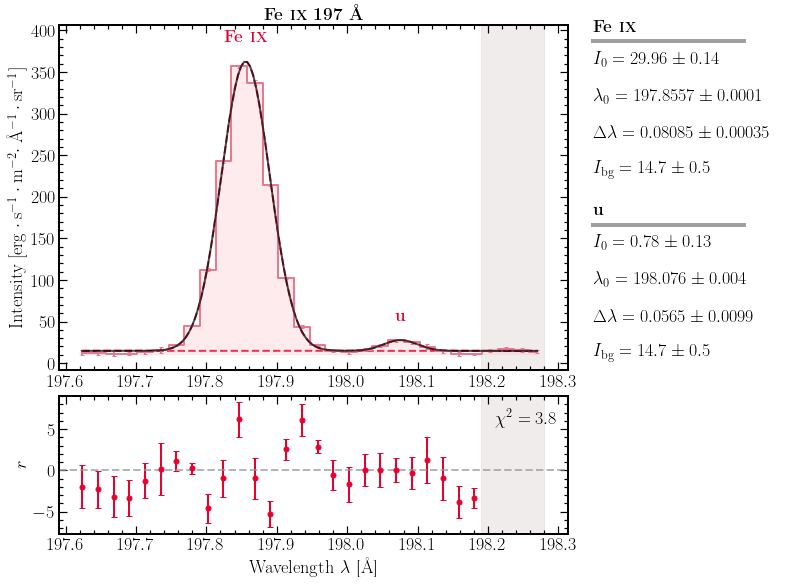

In [43]:
FeIX_197_slice = (1400,1430)
wvl_FeIX_197 = eis_wvl[FeIX_197_slice[0]:FeIX_197_slice[1]]
int_FeIX_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_197_slice[0]:FeIX_197_slice[1]],axis=0)

err_FeIX_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_197_slice[0]:FeIX_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_197_fit_model = SpectrumFitSingle(data=int_FeIX_197,wvl=wvl_FeIX_197,err=err_FeIX_197,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[197.85,198.05],
                                      int_max_init=[350,20],
                                      fwhm_init=[0.08,0.08],mask=[[198.19,198.28]])
# FeIX_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_197_fit_model.run_HahnMC(n_chain=10000)
FeIX_197_fit_model.run_lse()
FeIX_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{u}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03964821]


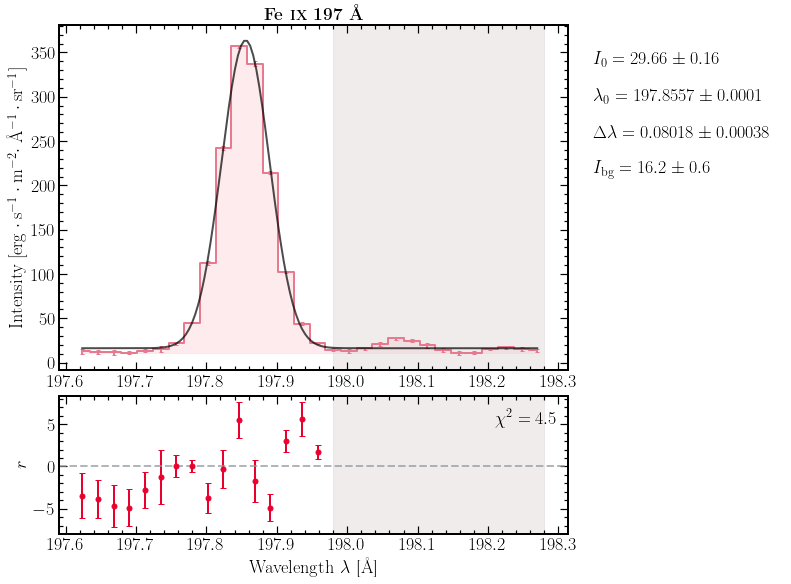

In [44]:
FeIX_197_slice = (1400,1430)
wvl_FeIX_197 = eis_wvl[FeIX_197_slice[0]:FeIX_197_slice[1]]
int_FeIX_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_197_slice[0]:FeIX_197_slice[1]],axis=0)

err_FeIX_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_197_slice[0]:FeIX_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_197_fit_model = SpectrumFitSingle(data=int_FeIX_197,wvl=wvl_FeIX_197,err=err_FeIX_197,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[197.85],
                                      int_max_init=[350],
                                      fwhm_init=[0.08],mask=[[197.98,198.28]])
# FeIX_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_197_fit_model.run_HahnMC(n_chain=10000)
FeIX_197_fit_model.run_lse()
FeIX_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.04056631        nan]


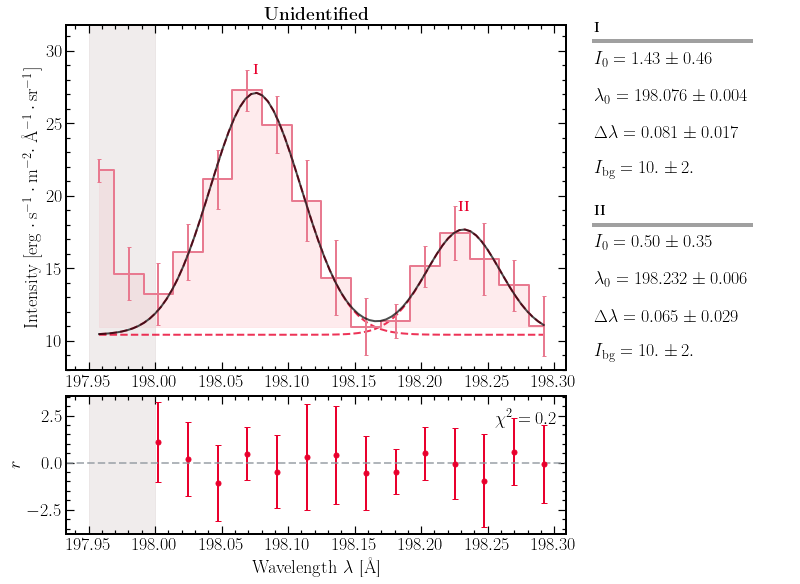

In [45]:
Uniden_197_slice = (1415,1431)
wvl_Uniden_197 = eis_wvl[Uniden_197_slice[0]:Uniden_197_slice[1]]
int_Uniden_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    Uniden_197_slice[0]:Uniden_197_slice[1]],axis=0)

err_Uniden_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        Uniden_197_slice[0]:Uniden_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

Uniden_197_fit_model = SpectrumFitSingle(data=int_Uniden_197,wvl=wvl_Uniden_197,err=err_Uniden_197,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[198.07,198.22],
                                      int_max_init=[10,5],int_cont_init=12,
                                      fwhm_init=[0.08,0.08],mask=[[197.95,198.0]])
# Uniden_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # Uniden_197_fit_model.run_HahnMC(n_chain=10000)
Uniden_197_fit_model.run_lse()
Uniden_197_fit_model.plot(plot_title=r"\textbf{Unidentified}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(Uniden_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,Uniden_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06728306 0.03781293]


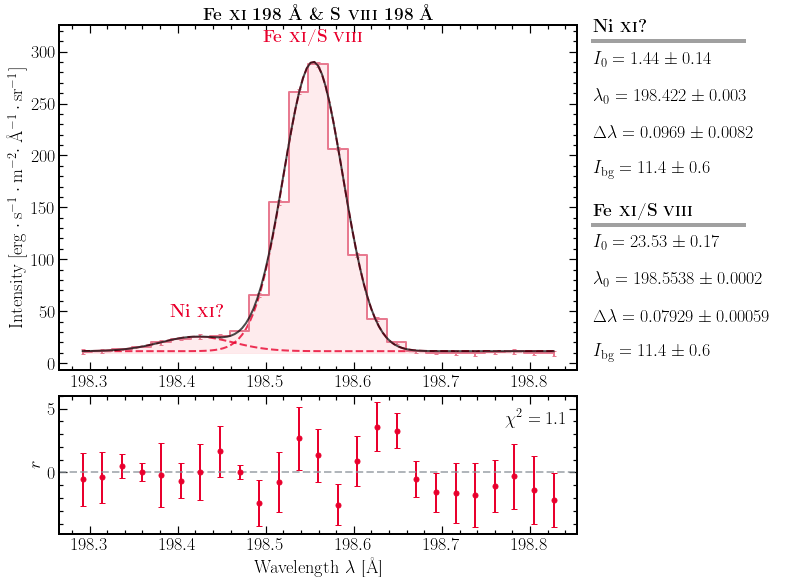

In [46]:
FeXI_SVIII_198_slice = (1430,1455)
wvl_FeXI_SVIII_198 = eis_wvl[FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]]
int_FeXI_SVIII_198 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]],axis=0)

err_FeXI_SVIII_198 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_SVIII_198_fit_model = SpectrumFitSingle(data=int_FeXI_SVIII_198,wvl=wvl_FeXI_SVIII_198,err=err_FeXI_SVIII_198,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[198.4,198.55],
                                      int_max_init=[20,270],
                                      fwhm_init=[0.08,0.08])
# FeXI_SVIII_198_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_SVIII_198_fit_model.run_HahnMC(n_chain=10000)
FeXI_SVIII_198_fit_model.run_lse()
FeXI_SVIII_198_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 198 \mbox{\AA} \& S \textsc{viii} 198 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Ni \textsc{xi}?}",r"\textbf{Fe \textsc{xi}/S \textsc{viii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_SVIII_198_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_SVIII_198_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05622853 0.06714184 0.0208335 ]


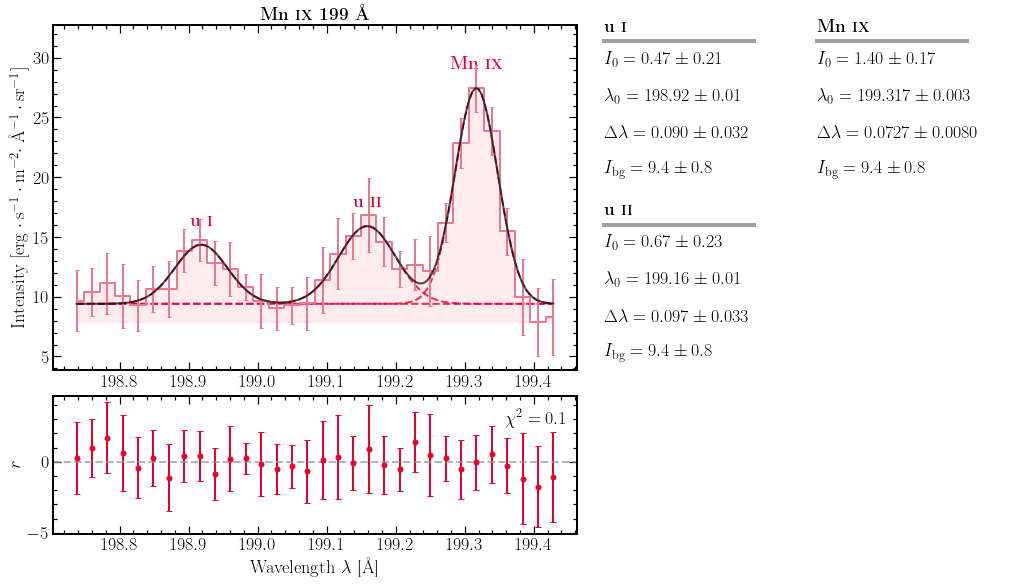

In [47]:
MnIX_199_slice = (1450,1482)
wvl_MnIX_199 = eis_wvl[MnIX_199_slice[0]:MnIX_199_slice[1]]
int_MnIX_199 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnIX_199_slice[0]:MnIX_199_slice[1]],axis=0)

err_MnIX_199 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnIX_199_slice[0]:MnIX_199_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnIX_199_fit_model = SpectrumFitSingle(data=int_MnIX_199,wvl=wvl_MnIX_199,err=err_MnIX_199,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[198.91,199.15,199.3],
                                      int_max_init=[5,10,20],
                                      fwhm_init=[0.08,0.08,0.08])
#MnIX_199_fit_model.plot(plot_fit=False,plot_params=False)
# # # MnIX_199_fit_model.run_HahnMC(n_chain=10000)
MnIX_199_fit_model.run_lse()
MnIX_199_fit_model.plot(plot_title=r"\textbf{Mn \textsc{ix} 199 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{u \textsc{ii}}",r"\textbf{Mn \textsc{ix}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnIX_199_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,MnIX_199_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05882537 0.0556765  0.08615079 0.06692818]


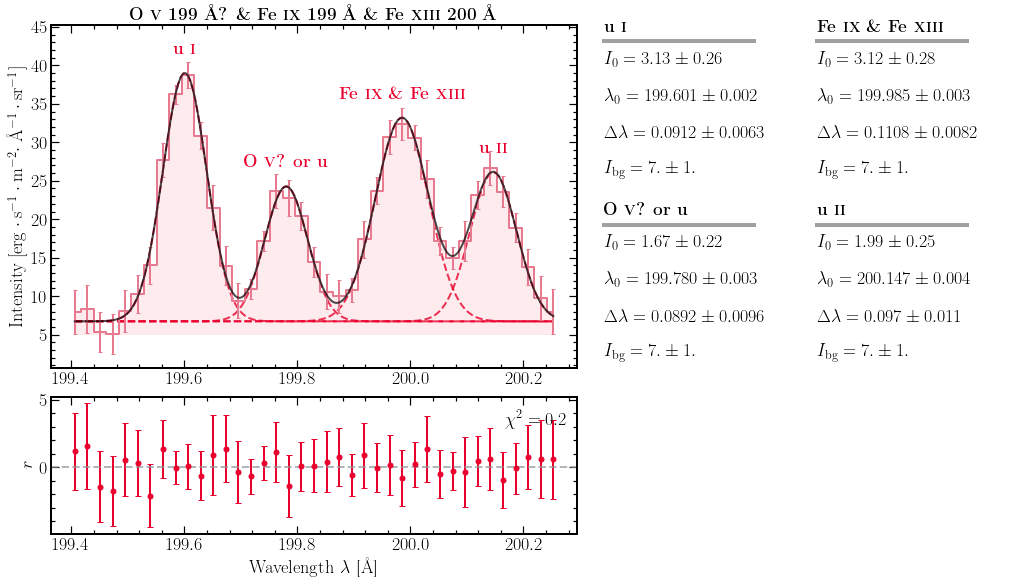

In [48]:
FeIX_199_slice = (1480,1519)
wvl_FeIX_199 = eis_wvl[FeIX_199_slice[0]:FeIX_199_slice[1]]
int_FeIX_199 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_199_slice[0]:FeIX_199_slice[1]],axis=0)

err_FeIX_199 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_199_slice[0]:FeIX_199_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_199_fit_model = SpectrumFitSingle(data=int_FeIX_199,wvl=wvl_FeIX_199,err=err_FeIX_199,
                                      same_width=False,line_number=4,
                                      line_wvl_init=[199.6,199.8,200.0,200.14],
                                      int_max_init=[30,20,25,20],
                                      fwhm_init=[0.08,0.08,0.08,0.08])
# FeIX_199_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_199_fit_model.run_HahnMC(n_chain=10000)
FeIX_199_fit_model.run_lse()
FeIX_199_fit_model.plot(plot_title=r"\textbf{O \textsc{v} 199 \mbox{\AA}? \& Fe \textsc{ix} 199 \mbox{\AA} \& Fe \textsc{xiii} 200 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{O \textsc{v}? or u}",
                        r"\textbf{Fe \textsc{ix} \& Fe \textsc{xiii}}",r"\textbf{u \textsc{ii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_199_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeIX_199_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.02362138 0.02472622 0.07042193]


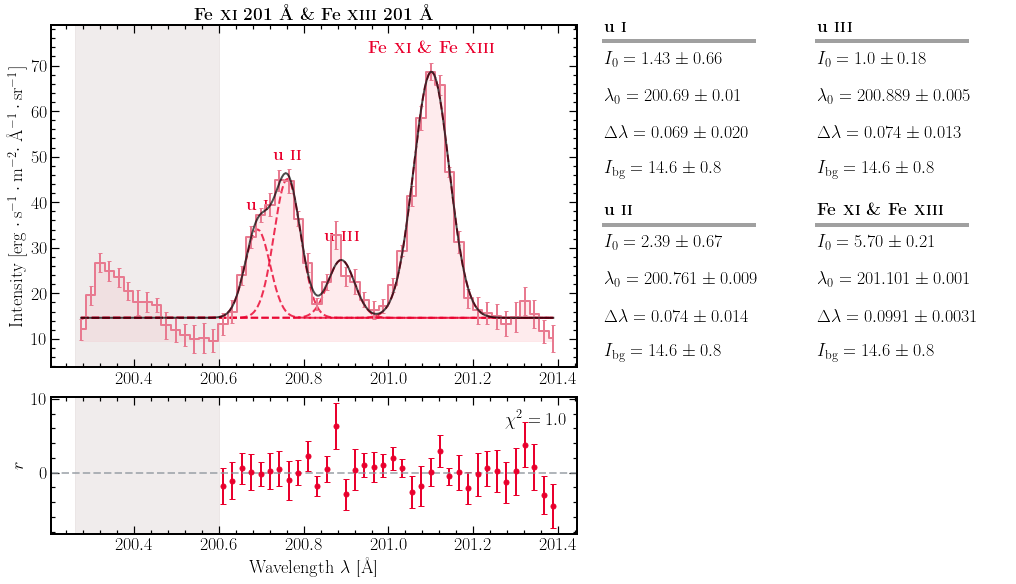

In [49]:
FeXI_FeXIII_201_slice = (1519,1570)
wvl_FeXI_FeXIII_201 = eis_wvl[FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]]
int_FeXI_FeXIII_201 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]],axis=0)

err_FeXI_FeXIII_201 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeXIII_201_fit_model = SpectrumFitSingle(data=int_FeXI_FeXIII_201,wvl=wvl_FeXI_FeXIII_201,err=err_FeXI_FeXIII_201,
                                      same_width=False,line_number=4,
                                      line_wvl_init=[200.66,200.74,200.88,201.1],
                                      int_max_init=[20,30,5,65],
                                      fwhm_init=[0.08,0.08,0.08,0.08],mask=[[200.26,200.6]])
# FeXI_FeXIII_201_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_FeXIII_201_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeXIII_201_fit_model.run_lse()
FeXI_FeXIII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 201 \mbox{\AA} \& Fe \textsc{xiii} 201 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{u \textsc{ii}}",
                        r"\textbf{u \textsc{iii}}",r"\textbf{Fe \textsc{xi} \& Fe \textsc{xiii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeXIII_201_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_FeXIII_201_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04702252 0.03222423 0.03158694]


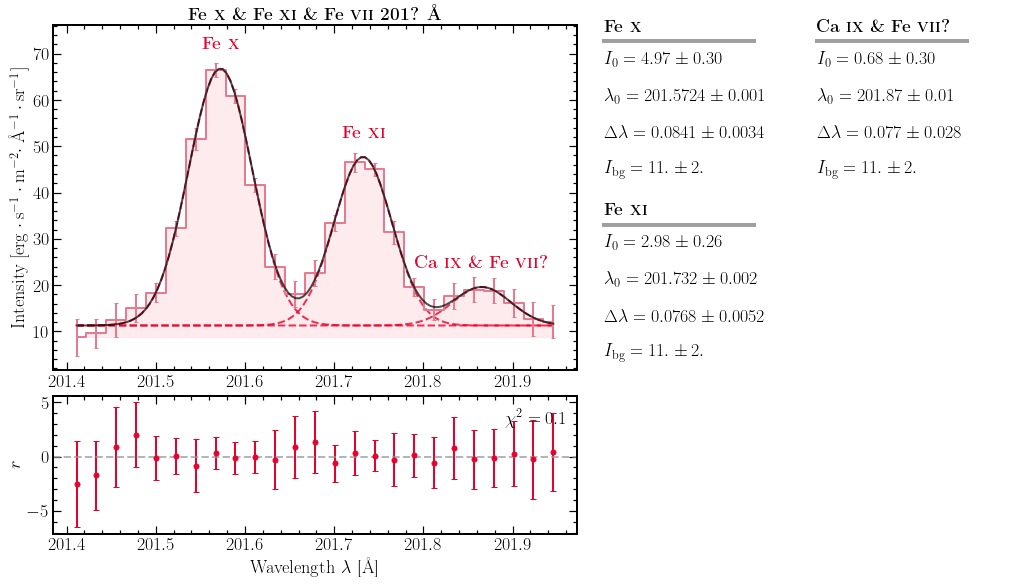

In [50]:
FeX_FeXI_FeVII_201_slice = (1570,1595)
wvl_FeX_FeXI_FeVII_201 = eis_wvl[FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]]
int_FeX_FeXI_FeVII_201 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]],axis=0)

err_FeX_FeXI_FeVII_201 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_FeXI_FeVII_201_fit_model = SpectrumFitSingle(data=int_FeX_FeXI_FeVII_201,wvl=wvl_FeX_FeXI_FeVII_201,err=err_FeX_FeXI_FeVII_201,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[201.55,201.75,201.85],
                                      int_max_init=[60,40,10],
                                      fwhm_init=[0.08,0.08,0.08])
# FeX_FeXI_FeVII_201_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeX_FeXI_FeVII_201_fit_model.run_HahnMC(n_chain=10000)
FeX_FeXI_FeVII_201_fit_model.run_lse()
FeX_FeXI_FeVII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} \& Fe \textsc{xi} \& Fe \textsc{vii} 201? \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{Ca \textsc{ix} \& Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_FeXI_FeVII_201_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeX_FeXI_FeVII_201_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04352513]


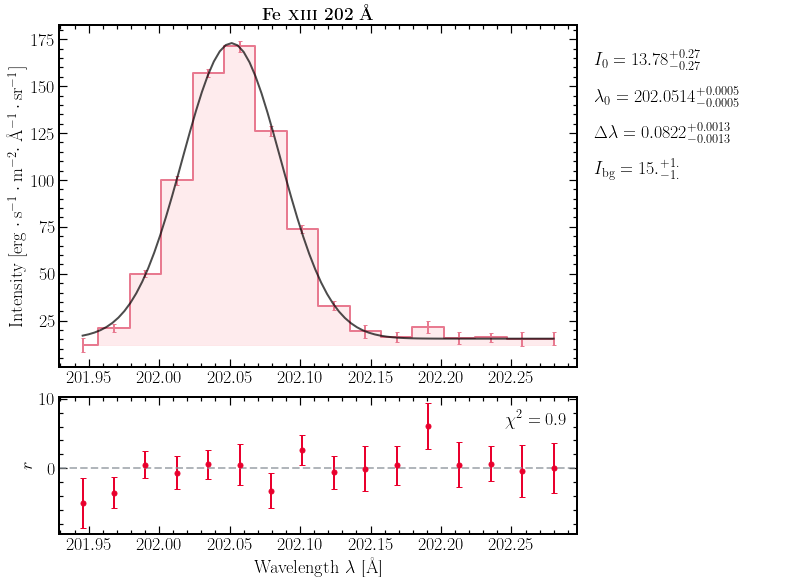

In [51]:
FeXIII_201_slice = (1594,1610)
wvl_FeXIII_201 = eis_wvl[FeXIII_201_slice[0]:FeXIII_201_slice[1]]
int_FeXIII_201 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXIII_201_slice[0]:FeXIII_201_slice[1]],axis=0)

err_FeXIII_201 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXIII_201_slice[0]:FeXIII_201_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXIII_201_fit_model = SpectrumFitSingle(data=int_FeXIII_201,wvl=wvl_FeXIII_201,err=err_FeXIII_201,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[202.04],
                                      int_max_init=[150],
                                      fwhm_init=[0.08])
# FeXIII_201_fit_model.plot(plot_fit=False,plot_params=False)
FeXIII_201_fit_model.run_HahnMC(n_chain=10000)
# FeXIII_201_fit_model.run_lse()
FeXIII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXIII_201_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXIII_201_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05146234 0.05046246        nan 0.05628435        nan]


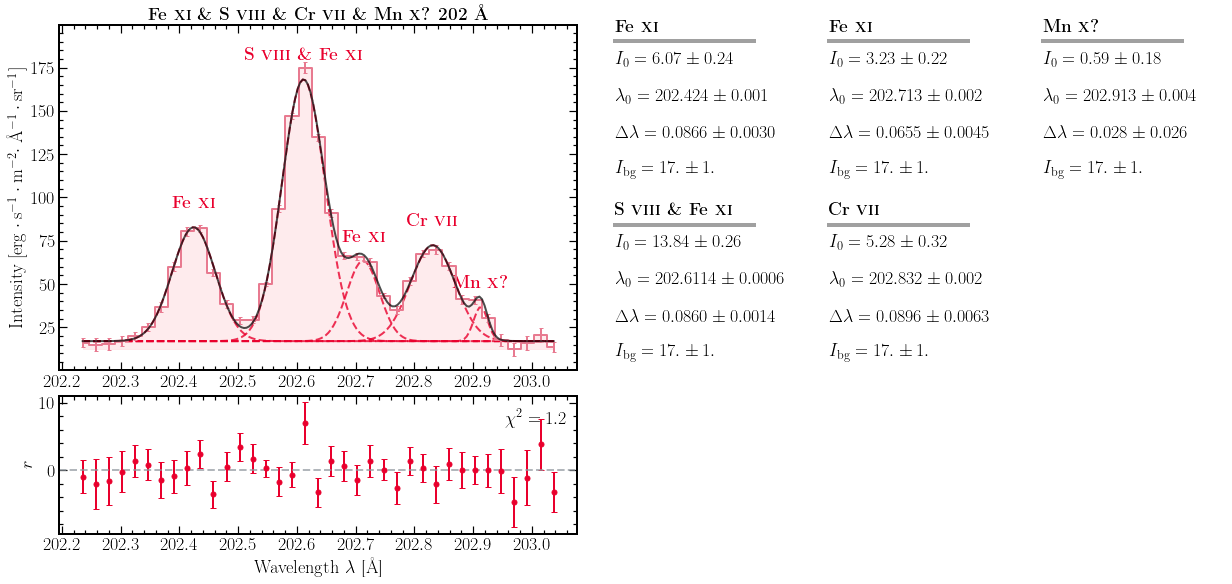

In [52]:
SVIII_202_slice = (1607,1644)
wvl_SVIII_202 = eis_wvl[SVIII_202_slice[0]:SVIII_202_slice[1]]
int_SVIII_202 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SVIII_202_slice[0]:SVIII_202_slice[1]],axis=0)

err_SVIII_202 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SVIII_202_slice[0]:SVIII_202_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SVIII_202_fit_model = SpectrumFitSingle(data=int_SVIII_202,wvl=wvl_SVIII_202,err=err_SVIII_202,
                                      same_width=False,line_number=5,
                                      line_wvl_init=[202.42,202.6,202.7,202.83,202.9],
                                      int_max_init=[60,150,50,50,10],
                                      fwhm_init=[0.08,0.08,0.08,0.06,0.03])
# SVIII_202_fit_model.plot(plot_fit=False,plot_params=False)
# # # SVIII_202_fit_model.run_HahnMC(n_chain=10000)
SVIII_202_fit_model.run_lse()
SVIII_202_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& S \textsc{viii}  \& Cr \textsc{vii} \& Mn \textsc{x}? 202 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption = [r"\textbf{Fe \textsc{xi}}",r"\textbf{S \textsc{viii} \& Fe \textsc{xi}}",
                        r"\textbf{Fe \textsc{xi}}",r"\textbf{Cr \textsc{vii}}",r"\textbf{Mn \textsc{x}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SVIII_202_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,SVIII_202_fit_model.line_wvl_fit,eis_wvl[0])**2))

In [53]:
SVIII_202_fit_model.int_total_fit

array([ 6.06550259, 13.83927709,  3.23381592,  5.28372387,  0.58817974])

FWHM after removing instrumental broadening:  [0.06747895 0.06747917]


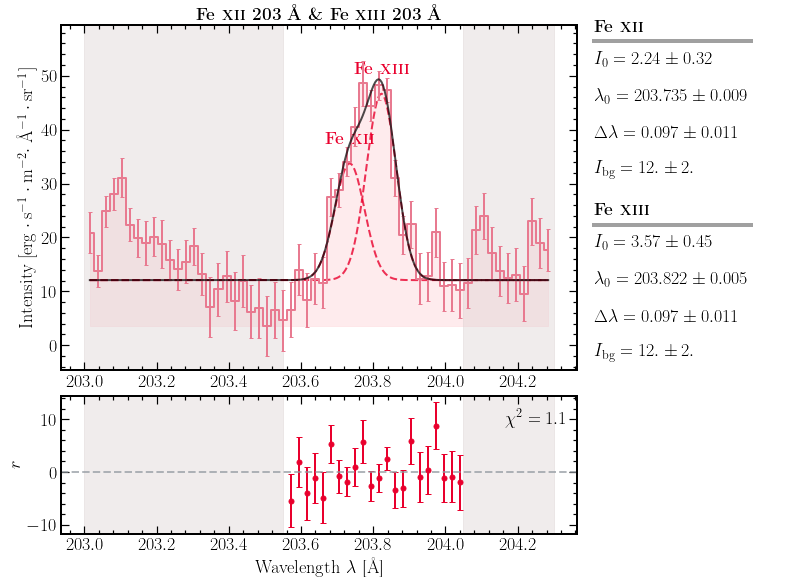

In [54]:
FeXII_FeXIII_202_slice = (1642,1700)
wvl_FeXII_FeXIII_202 = eis_wvl[FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]]
int_FeXII_FeXIII_202 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]],axis=0)

err_FeXII_FeXIII_202 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_FeXIII_202_fit_model = SpectrumFitSingle(data=int_FeXII_FeXIII_202,wvl=wvl_FeXII_FeXIII_202,err=err_FeXII_FeXIII_202,
                                      same_width=True,line_number=2,
                                      line_wvl_init=[203.7,203.8],
                                      int_max_init=[5,50],
                                      fwhm_init=[0.07],mask=[[203.0,203.55],[204.05,204.3]])
# FeXII_FeXIII_202_fit_model.plot(plot_fit=False,plot_params=False)
# # FeXII_FeXIII_202_fit_model.run_HahnMC(n_chain=10000)
FeXII_FeXIII_202_fit_model.run_lse()
FeXII_FeXIII_202_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 203 \mbox{\AA} \& Fe \textsc{xiii} 203 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii}}",r"\textbf{Fe \textsc{xiii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_FeXIII_202_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXII_FeXIII_202_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.02446508 0.07538499 0.03519015]


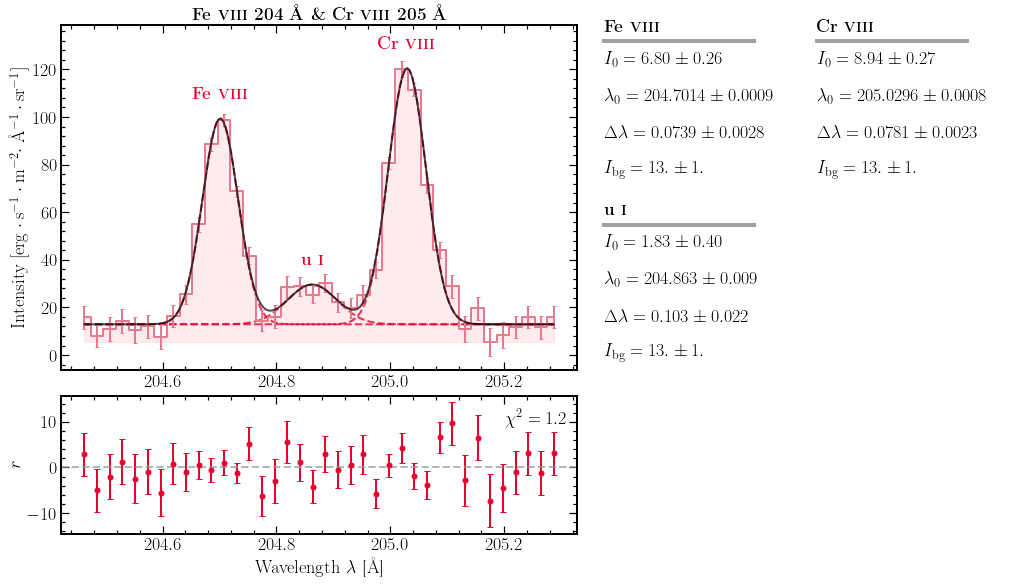

In [55]:
FeVIII_204_CrVIII_205_slice = (1707,1745)
wvl_FeVIII_204_CrVIII_205 = eis_wvl[FeVIII_204_CrVIII_205_slice[0]:FeVIII_204_CrVIII_205_slice[1]]
int_FeVIII_204_CrVIII_205 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_204_CrVIII_205_slice[0]:FeVIII_204_CrVIII_205_slice[1]],axis=0)

err_FeVIII_204_CrVIII_205 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_204_CrVIII_205_slice[0]:FeVIII_204_CrVIII_205_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_204_CrVIII_205_fit_model = SpectrumFitSingle(data=int_FeVIII_204_CrVIII_205,wvl=wvl_FeVIII_204_CrVIII_205,err=err_FeVIII_204_CrVIII_205,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[204.7,204.85,205.02],
                                      int_max_init=[90,20,100],
                                      fwhm_init=[0.08,0.08,0.08])
# FeVIII_204_CrVIII_205_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_204_CrVIII_205_fit_model.run_HahnMC(n_chain=10000)
FeVIII_204_CrVIII_205_fit_model.run_lse()
FeVIII_204_CrVIII_205_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 204 \mbox{\AA} \& Cr \textsc{viii} 205 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{u \textsc{i}}",
                        r"\textbf{Cr \textsc{viii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_204_CrVIII_205_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_204_CrVIII_205_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.07779257]


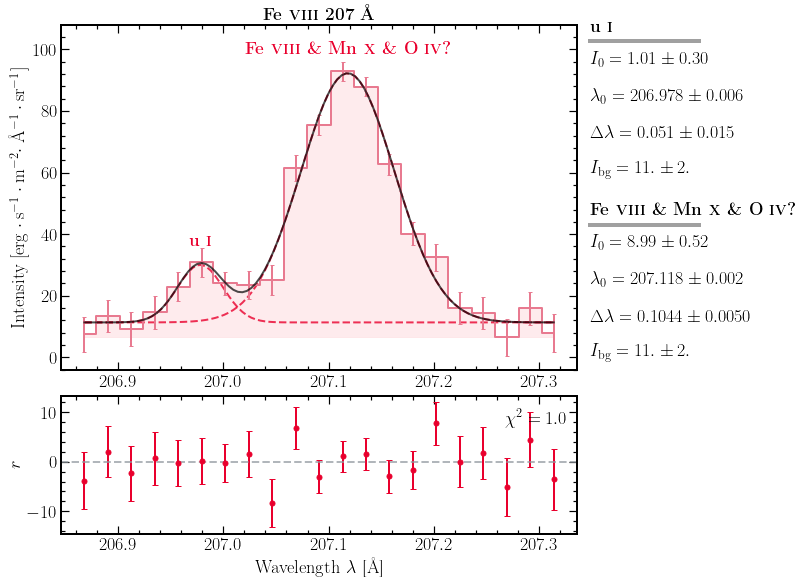

In [56]:
FeVIII_207_slice = (1815,1836)
wvl_FeVIII_207 = eis_wvl[FeVIII_207_slice[0]:FeVIII_207_slice[1]]
int_FeVIII_207 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_207_slice[0]:FeVIII_207_slice[1]],axis=0)

err_FeVIII_207 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_207_slice[0]:FeVIII_207_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_207_fit_model = SpectrumFitSingle(data=int_FeVIII_207,wvl=wvl_FeVIII_207,err=err_FeVIII_207,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[206.96,207.1],
                                      int_max_init=[20,90],
                                      fwhm_init=[0.08,0.08])
# FeVIII_207_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_207_fit_model.run_HahnMC(n_chain=10000)
FeVIII_207_fit_model.run_lse()
FeVIII_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 207 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",
                        r"\textbf{Fe \textsc{viii} \& Mn \textsc{x} \& O \textsc{iv}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_207_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_207_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.01322575]


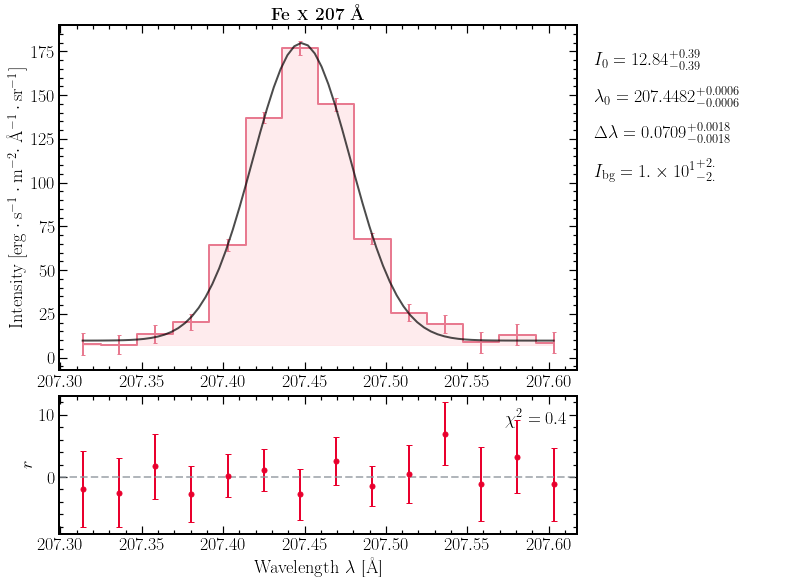

In [57]:
FeX_207_slice = (1835,1849)
wvl_FeX_207 = eis_wvl[FeX_207_slice[0]:FeX_207_slice[1]]
int_FeX_207 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_207_slice[0]:FeX_207_slice[1]],axis=0)

err_FeX_207 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_207_slice[0]:FeX_207_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_207_fit_model = SpectrumFitSingle(data=int_FeX_207,wvl=wvl_FeX_207,err=err_FeX_207,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[207.44],
                                      int_max_init=[175],
                                      fwhm_init=[0.08])
# FeX_207_fit_model.plot(plot_fit=False,plot_params=False)
FeX_207_fit_model.run_HahnMC(n_chain=10000)
# FeX_207_fit_model.run_lse()
FeX_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 207 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_207_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeX_207_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.04470204        nan]


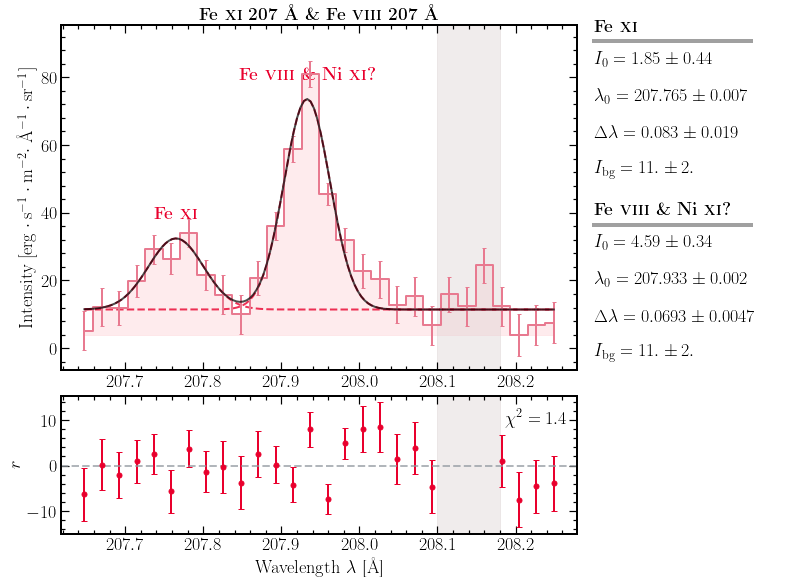

In [58]:
FeXI_FeVIII_207_slice = (1850,1878)
wvl_FeXI_FeVIII_207 = eis_wvl[FeXI_FeVIII_207_slice[0]:FeXI_FeVIII_207_slice[1]]
int_FeXI_FeVIII_207 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeVIII_207_slice[0]:FeXI_FeVIII_207_slice[1]],axis=0)

err_FeXI_FeVIII_207 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeVIII_207_slice[0]:FeXI_FeVIII_207_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeVIII_207_fit_model = SpectrumFitSingle(data=int_FeXI_FeVIII_207,wvl=wvl_FeXI_FeVIII_207,err=err_FeXI_FeVIII_207,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[207.76,207.93],
                                      int_max_init=[30,50],
                                      fwhm_init=[0.08,0.08],mask=[[208.1,208.18]])
# FeXI_FeVIII_207_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_FeVIII_207_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeVIII_207_fit_model.run_lse()
FeXI_FeVIII_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 207 \mbox{\AA} \& Fe \textsc{viii} 207 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{viii} \& Ni \textsc{xi}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeVIII_207_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_FeVIII_207_fit_model.line_wvl_fit,eis_wvl[0])**2))

## Long Wavelength Detector
---

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [nan]


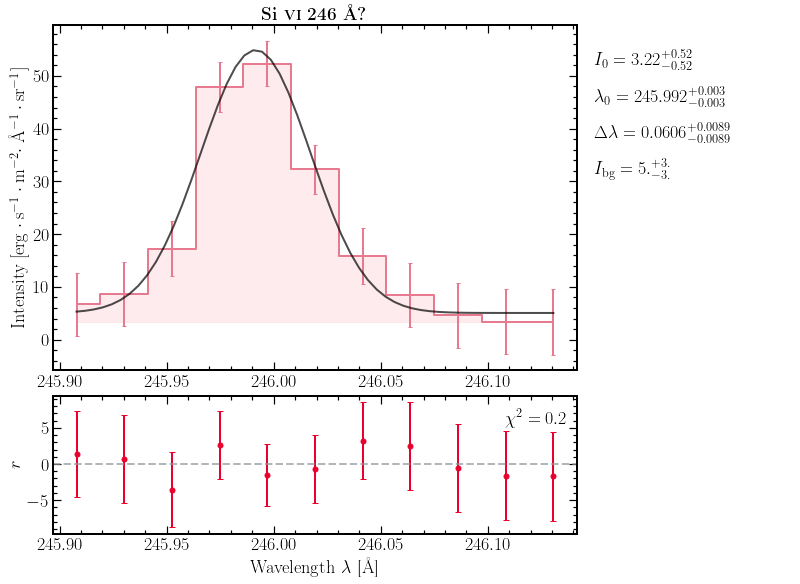

In [59]:
SiVI_246_slice = (2048,2059)
wvl_SiVI_246 = eis_wvl[SiVI_246_slice[0]:SiVI_246_slice[1]]
int_SiVI_246 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiVI_246_slice[0]:SiVI_246_slice[1]],axis=0)

err_SiVI_246 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiVI_246_slice[0]:SiVI_246_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiVI_246_fit_model = SpectrumFitSingle(data=int_SiVI_246,wvl=wvl_SiVI_246,err=err_SiVI_246,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[245.98],
                                      int_max_init=[50],
                                      fwhm_init=[0.08])
# SiVI_246_fit_model.plot(plot_fit=False,plot_params=False)
SiVI_246_fit_model.run_HahnMC(n_chain=10000)
# SiVI_246_fit_model.run_lse()
SiVI_246_fit_model.plot(plot_title=r"\textbf{Si \textsc{vi} 246 \mbox{\AA}?}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiVI_246_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiVI_246_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03434579 0.01864003]


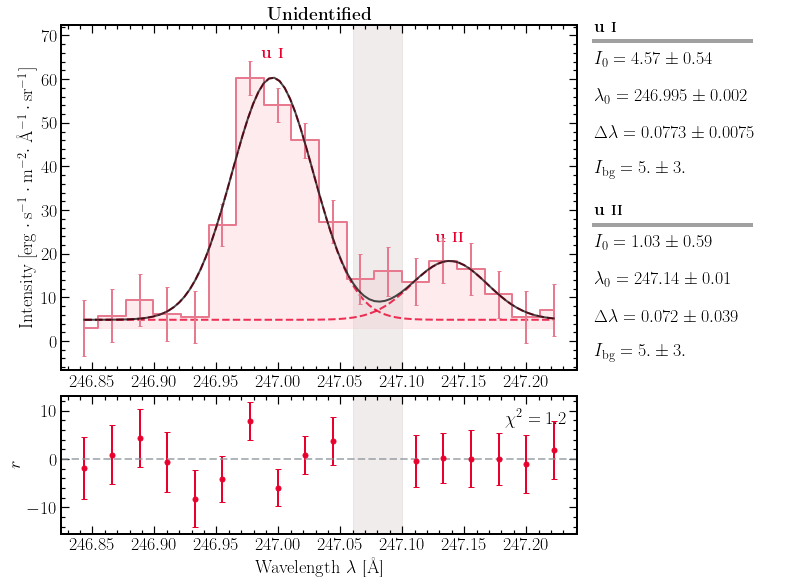

In [60]:
unid_246_slice = (2090,2108)
wvl_unid_246 = eis_wvl[unid_246_slice[0]:unid_246_slice[1]]
int_unid_246 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    unid_246_slice[0]:unid_246_slice[1]],axis=0)

err_unid_246 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        unid_246_slice[0]:unid_246_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

unid_246_fit_model = SpectrumFitSingle(data=int_unid_246,wvl=wvl_unid_246,err=err_unid_246,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[246.99,247.14],
                                      int_max_init=[50,20],
                                      fwhm_init=[0.08,0.08],mask=[[247.06,247.10]])
# unid_246_fit_model.plot(plot_fit=False,plot_params=False)
# # # unid_246_fit_model.run_HahnMC(n_chain=10000)
unid_246_fit_model.run_lse()
unid_246_fit_model.plot(plot_title=r"\textbf{Unidentified}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{u \textsc{ii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(unid_246_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,unid_246_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05310629]


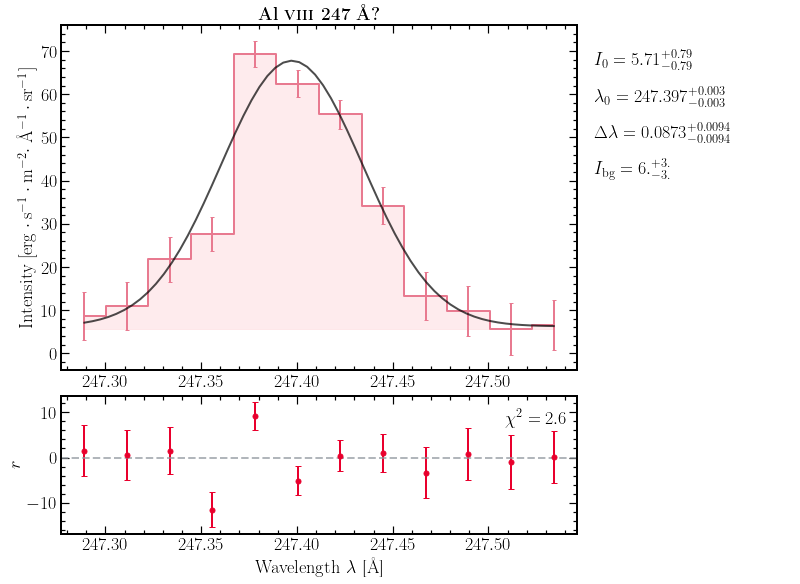

In [61]:
AlVIII_247_slice = (2110,2122)
wvl_AlVIII_247 = eis_wvl[AlVIII_247_slice[0]:AlVIII_247_slice[1]]
int_AlVIII_247 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    AlVIII_247_slice[0]:AlVIII_247_slice[1]],axis=0)

err_AlVIII_247 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        AlVIII_247_slice[0]:AlVIII_247_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

AlVIII_247_fit_model = SpectrumFitSingle(data=int_AlVIII_247,wvl=wvl_AlVIII_247,err=err_AlVIII_247,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[247.39],
                                      int_max_init=[60],
                                      fwhm_init=[0.08])
# AlVIII_247_fit_model.plot(plot_fit=False,plot_params=False)
AlVIII_247_fit_model.run_HahnMC(n_chain=10000)
# AlVIII_247_fit_model.run_lse()
AlVIII_247_fit_model.plot(plot_title=r"\textbf{Al \textsc{viii} 247 \mbox{\AA}?}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(AlVIII_247_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,AlVIII_247_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.03430593        nan]


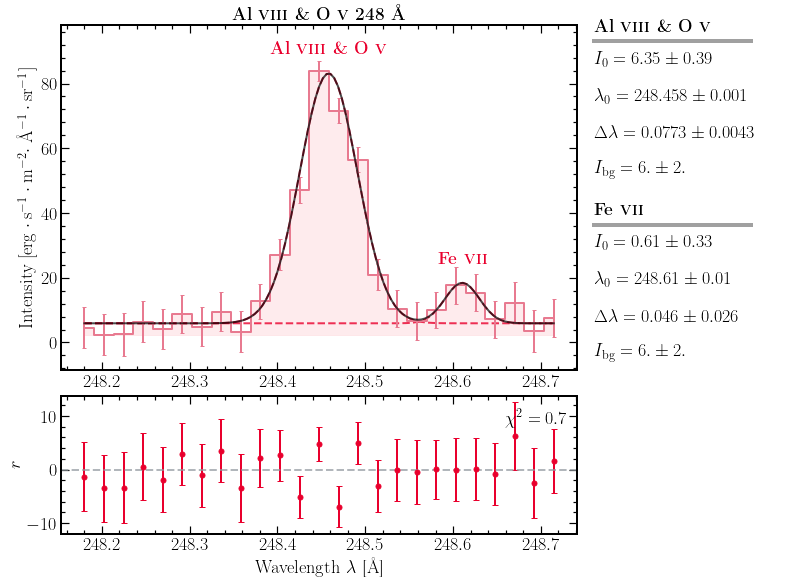

In [62]:
AlVIII_248_slice = (2150,2175)
wvl_AlVIII_248 = eis_wvl[AlVIII_248_slice[0]:AlVIII_248_slice[1]]
int_AlVIII_248 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    AlVIII_248_slice[0]:AlVIII_248_slice[1]],axis=0)

err_AlVIII_248 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        AlVIII_248_slice[0]:AlVIII_248_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

AlVIII_248_fit_model = SpectrumFitSingle(data=int_AlVIII_248,wvl=wvl_AlVIII_248,err=err_AlVIII_248,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[248.46,248.61],
                                      int_max_init=[80,20],
                                      fwhm_init=[0.08,0.08])
# AlVIII_248_fit_model.plot(plot_fit=False,plot_params=False)
# # # AlVIII_248_fit_model.run_HahnMC(n_chain=10000)
AlVIII_248_fit_model.run_lse()
AlVIII_248_fit_model.plot(plot_title=r"\textbf{Al \textsc{viii} \& O \textsc{v} 248 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Al \textsc{viii} \& O \textsc{v}}",r"\textbf{Fe \textsc{vii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(AlVIII_248_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,AlVIII_248_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07622282]


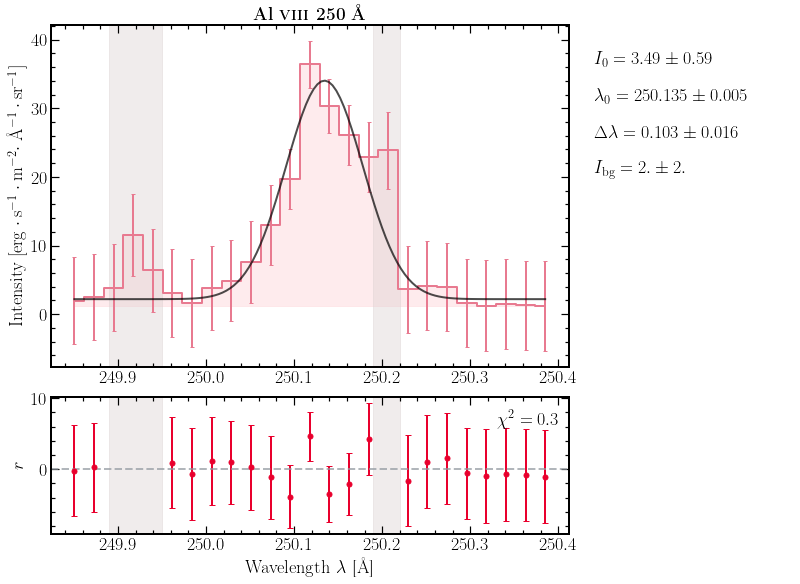

In [63]:
AlVIII_250_slice = (2225,2250)
wvl_AlVIII_250 = eis_wvl[AlVIII_250_slice[0]:AlVIII_250_slice[1]]
int_AlVIII_250 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    AlVIII_250_slice[0]:AlVIII_250_slice[1]],axis=0)

err_AlVIII_250 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        AlVIII_250_slice[0]:AlVIII_250_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

AlVIII_250_fit_model = SpectrumFitSingle(data=int_AlVIII_250,wvl=wvl_AlVIII_250,err=err_AlVIII_250,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[250.11],
                                      int_max_init=[50],
                                      fwhm_init=[0.08],mask=[[249.89,249.95],[250.19,250.22]])
# AlVIII_250_fit_model.plot(plot_fit=False,plot_params=False)
AlVIII_250_fit_model.run_lse()
# AlVIII_250_fit_model.run_lse()
AlVIII_250_fit_model.plot(plot_title=r"\textbf{Al \textsc{viii} 250 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(AlVIII_250_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,AlVIII_250_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.03964848        nan]


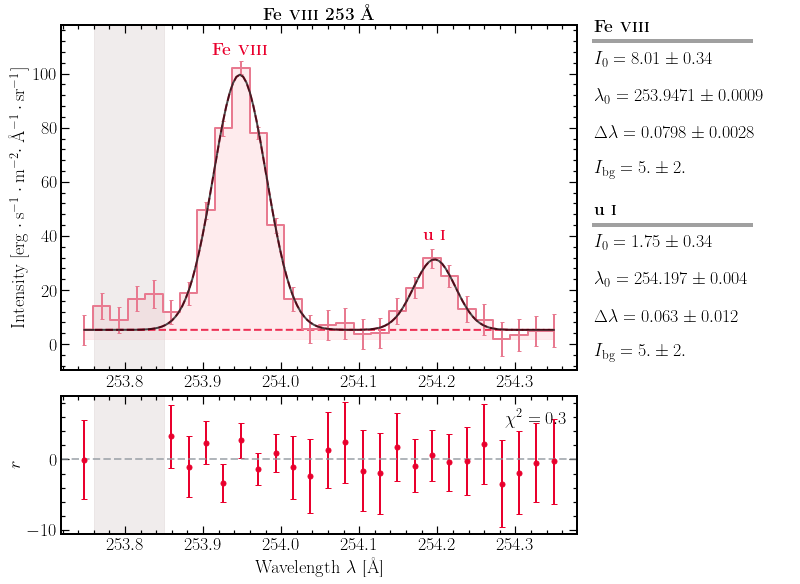

In [64]:
FeVIII_253_slice = (2400,2428)
wvl_FeVIII_253 = eis_wvl[FeVIII_253_slice[0]:FeVIII_253_slice[1]]
int_FeVIII_253 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_253_slice[0]:FeVIII_253_slice[1]],axis=0)

err_FeVIII_253 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_253_slice[0]:FeVIII_253_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_253_fit_model = SpectrumFitSingle(data=int_FeVIII_253,wvl=wvl_FeVIII_253,err=err_FeVIII_253,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[253.94,254.19],
                                      int_max_init=[100,30],
                                      fwhm_init=[0.08,0.08],mask=[[253.76,253.85]])
# FeVIII_253_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_253_fit_model.run_HahnMC(n_chain=10000)
FeVIII_253_fit_model.run_lse()
FeVIII_253_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 253 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{u \textsc{i}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_253_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_253_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.01651993 0.0165206 ]


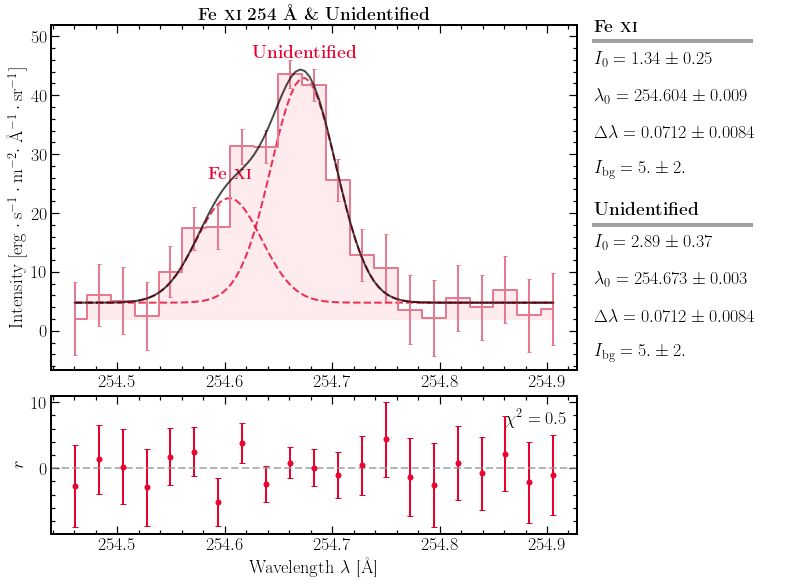

In [65]:
unid_254_slice = (2432,2453)
wvl_unid_254 = eis_wvl[unid_254_slice[0]:unid_254_slice[1]]
int_unid_254 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    unid_254_slice[0]:unid_254_slice[1]],axis=0)

err_unid_254 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        unid_254_slice[0]:unid_254_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

unid_254_fit_model = SpectrumFitSingle(data=int_unid_254,wvl=wvl_unid_254,err=err_unid_254,
                                      same_width=True,line_number=2,
                                      line_wvl_init=[254.59,254.69],
                                      int_max_init=[10,40],
                                      fwhm_init=[0.08])
# unid_254_fit_model.plot(plot_fit=False,plot_params=False)
# unid_254_fit_model.run_HahnMC(n_chain=10000)
unid_254_fit_model.run_lse()
unid_254_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 254 \mbox{\AA} \& Unidentified }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Unidentified}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(unid_254_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,unid_254_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [nan]


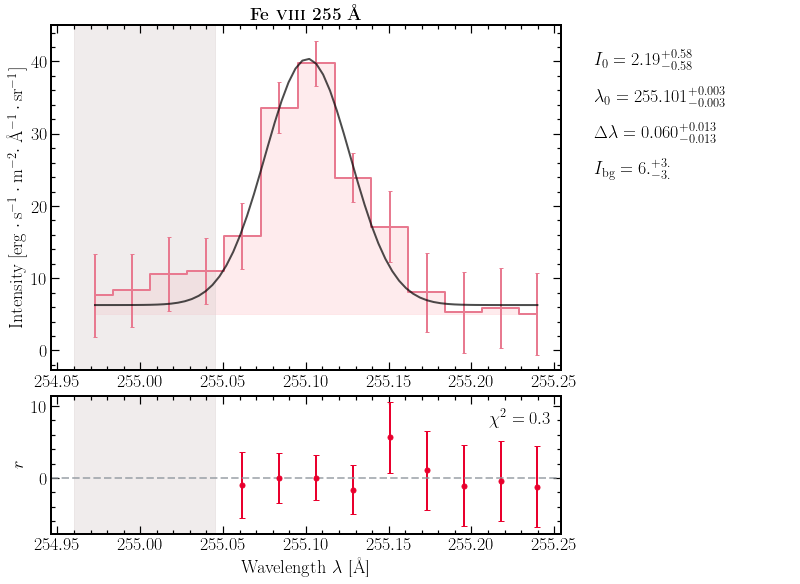

In [66]:
FeVIII_255_slice = (2455,2468)
wvl_FeVIII_255 = eis_wvl[FeVIII_255_slice[0]:FeVIII_255_slice[1]]
int_FeVIII_255 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_255_slice[0]:FeVIII_255_slice[1]],axis=0)

err_FeVIII_255 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_255_slice[0]:FeVIII_255_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_255_fit_model = SpectrumFitSingle(data=int_FeVIII_255,wvl=wvl_FeVIII_255,err=err_FeVIII_255,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[255.09],
                                      int_max_init=[40],
                                      fwhm_init=[0.08],mask=[[254.96,255.045]])
# FeVIII_255_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_255_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_255_fit_model.run_lse()
FeVIII_255_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 255 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_255_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeVIII_255_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [      nan 0.0085606]


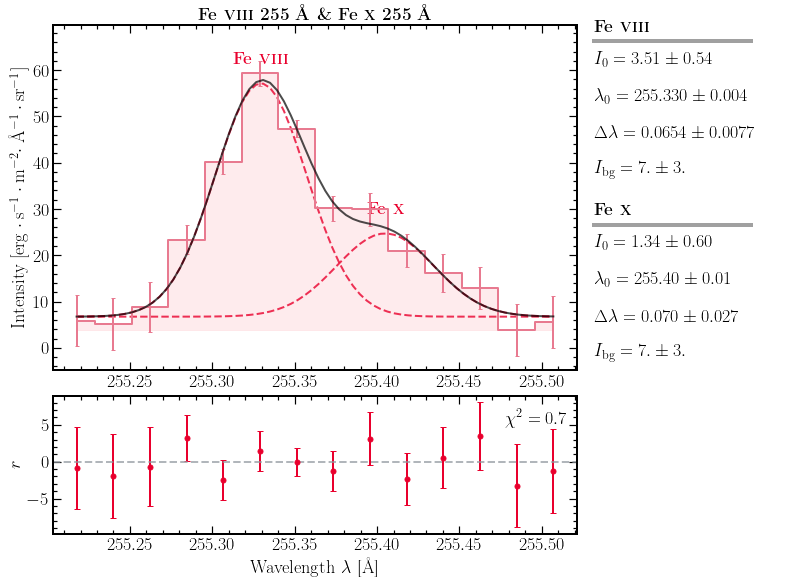

In [67]:
FeVIII_FeX_255_slice = (2466,2480)
wvl_FeVIII_FeX_255 = eis_wvl[FeVIII_FeX_255_slice[0]:FeVIII_FeX_255_slice[1]]
int_FeVIII_FeX_255 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_FeX_255_slice[0]:FeVIII_FeX_255_slice[1]],axis=0)

err_FeVIII_FeX_255 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_FeX_255_slice[0]:FeVIII_FeX_255_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_FeX_255_fit_model = SpectrumFitSingle(data=int_FeVIII_FeX_255,wvl=wvl_FeVIII_FeX_255,err=err_FeVIII_FeX_255,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[255.33,255.39],
                                      int_max_init=[60,30],
                                      fwhm_init=[0.08,0.08])
# FeVIII_FeX_255_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_FeX_255_fit_model.run_HahnMC(n_chain=10000)
FeVIII_FeX_255_fit_model.run_lse()
FeVIII_FeX_255_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 255 \mbox{\AA} \& Fe \textsc{x} 255 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_FeX_255_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_FeX_255_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06485007]


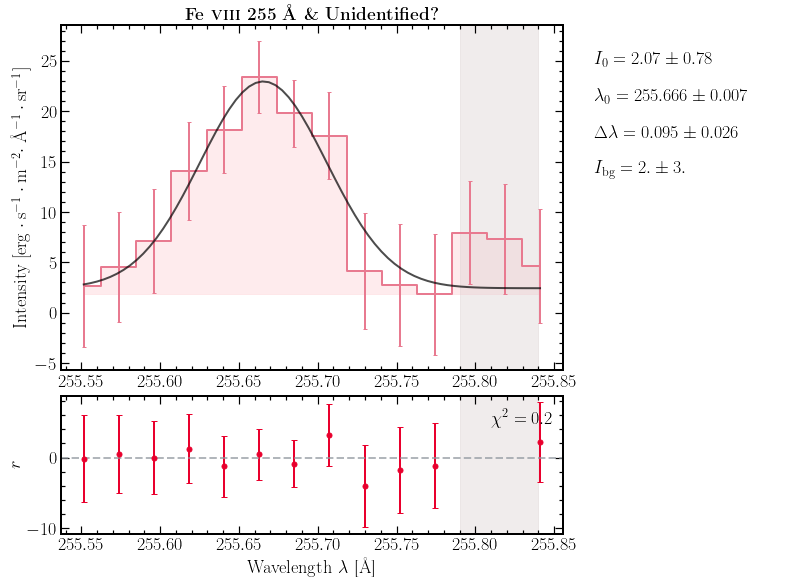

In [68]:
FeVIII_255_slice = (2481,2495)
wvl_FeVIII_255 = eis_wvl[FeVIII_255_slice[0]:FeVIII_255_slice[1]]
int_FeVIII_255 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_255_slice[0]:FeVIII_255_slice[1]],axis=0)

err_FeVIII_255 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_255_slice[0]:FeVIII_255_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_255_fit_model = SpectrumFitSingle(data=int_FeVIII_255,wvl=wvl_FeVIII_255,err=err_FeVIII_255,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[255.66],
                                      int_max_init=[20],
                                      fwhm_init=[0.08],mask=[[255.79,255.84]])
# FeVIII_255_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_255_fit_model.run_HahnMC(n_chain=10000)
FeVIII_255_fit_model.run_lse()
FeVIII_255_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 255 \mbox{\AA} \& Unidentified?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_255_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeVIII_255_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.10465687 0.08232072]


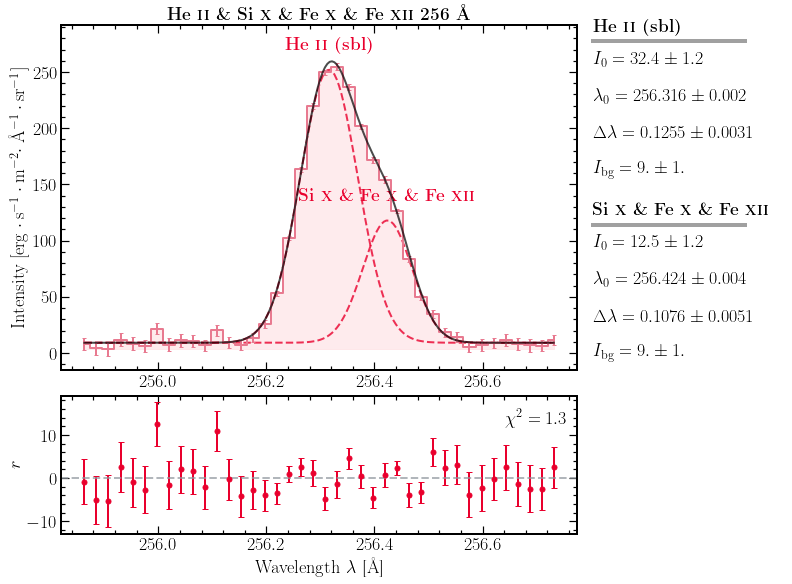

In [69]:
HeII_256_slice = (2495,2535)
wvl_HeII_256 = eis_wvl[HeII_256_slice[0]:HeII_256_slice[1]]
int_HeII_256 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    HeII_256_slice[0]:HeII_256_slice[1]],axis=0)

err_HeII_256 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        HeII_256_slice[0]:HeII_256_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

HeII_256_fit_model = SpectrumFitSingle(data=int_HeII_256,wvl=wvl_HeII_256,err=err_HeII_256,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[256.33,256.41],
                                      int_max_init=[250,150],
                                      fwhm_init=[0.08,0.08])
# HeII_256_fit_model.plot(plot_fit=False,plot_params=False)
# # # HeII_256_fit_model.run_HahnMC(n_chain=10000)
HeII_256_fit_model.run_lse()
HeII_256_fit_model.plot(plot_title=r"\textbf{He \textsc{ii} \& Si \textsc{x} \& Fe \textsc{x} \& Fe \textsc{xii} 256 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{He \textsc{ii} (sbl)}",
                        r"\textbf{Si \textsc{x} \& Fe \textsc{x} \& Fe \textsc{xii}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(HeII_256_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,HeII_256_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05134815]


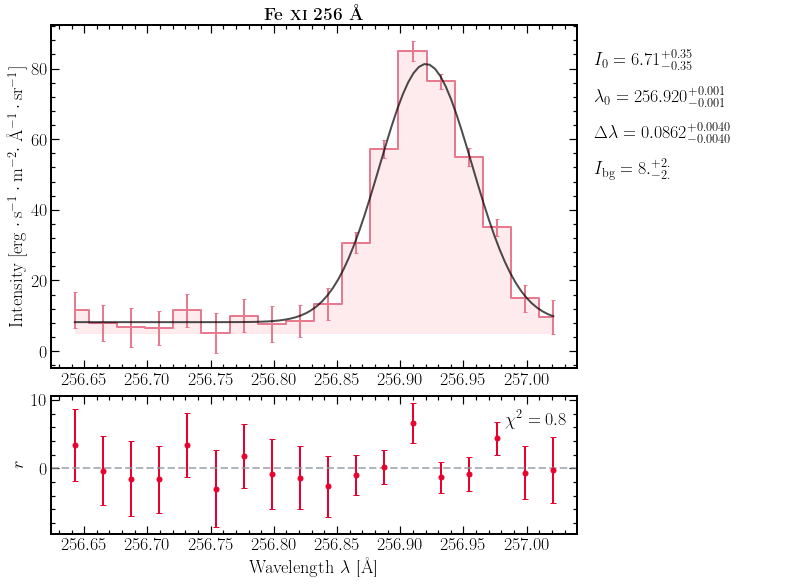

In [70]:
FeXI_256_slice = (2530,2548)
wvl_FeXI_256 = eis_wvl[FeXI_256_slice[0]:FeXI_256_slice[1]]
int_FeXI_256 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_256_slice[0]:FeXI_256_slice[1]],axis=0)

err_FeXI_256 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_256_slice[0]:FeXI_256_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_256_fit_model = SpectrumFitSingle(data=int_FeXI_256,wvl=wvl_FeXI_256,err=err_FeXI_256,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[256.93],
                                      int_max_init=[70],
                                      fwhm_init=[0.08])
# FeXI_256_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_256_fit_model.run_HahnMC(n_chain=10000)
# FeXI_256_fit_model.run_lse()
FeXI_256_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 256 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_256_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeXI_256_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04790545]


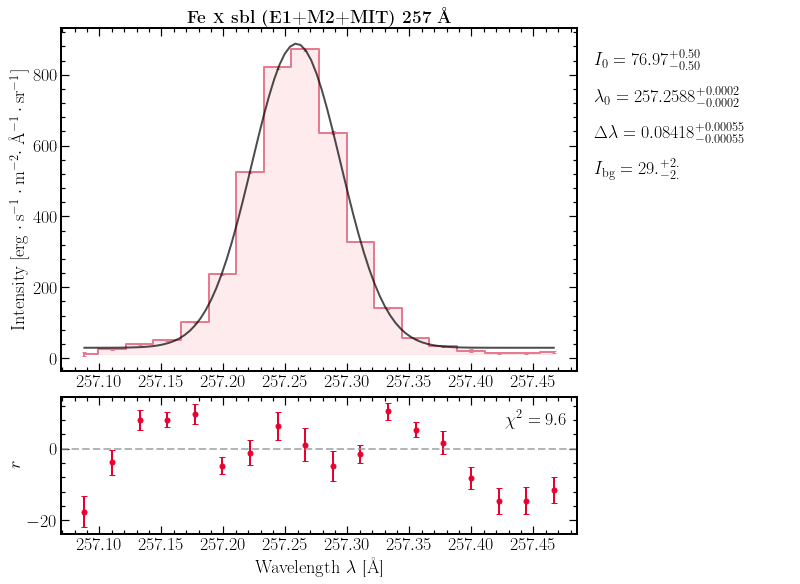

In [71]:
FeX_257_slice = (2550,2568)
wvl_FeX_257 = eis_wvl[FeX_257_slice[0]:FeX_257_slice[1]]
int_FeX_257 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_257_slice[0]:FeX_257_slice[1]],axis=0)

err_FeX_257 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_257_slice[0]:FeX_257_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_257_fit_model = SpectrumFitSingle(data=int_FeX_257,wvl=wvl_FeX_257,err=err_FeX_257,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[257.26],
                                      int_max_init=[800],
                                      fwhm_init=[0.08])
# FeX_257_fit_model.plot(plot_fit=False,plot_params=False)
FeX_257_fit_model.run_HahnMC(n_chain=10000)
# FeX_257_fit_model.run_lse()
FeX_257_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} sbl (E1+M2+MIT) 257 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_257_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeX_257_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06517078 0.05461989]


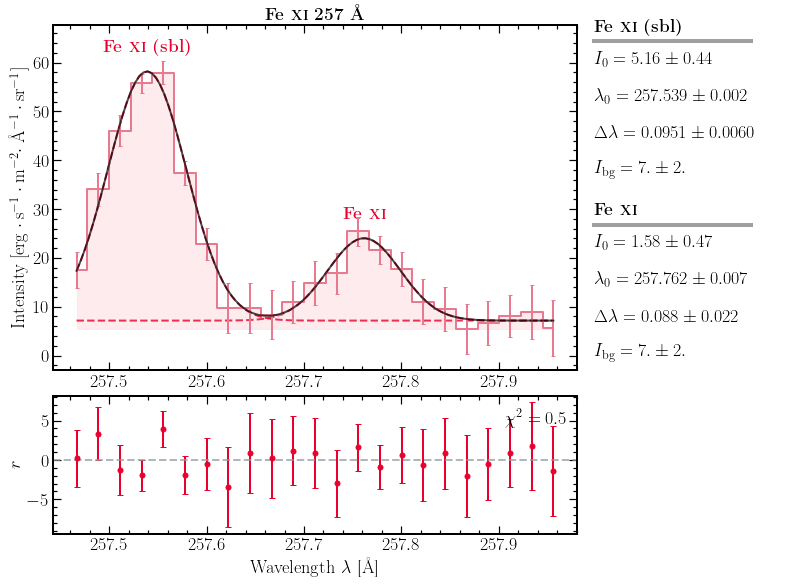

In [72]:
FeXI_257_slice = (2567,2590)
wvl_FeXI_257 = eis_wvl[FeXI_257_slice[0]:FeXI_257_slice[1]]
int_FeXI_257 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_257_slice[0]:FeXI_257_slice[1]],axis=0)

err_FeXI_257 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_257_slice[0]:FeXI_257_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_257_fit_model = SpectrumFitSingle(data=int_FeXI_257,wvl=wvl_FeXI_257,err=err_FeXI_257,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[257.53,257.76],
                                      int_max_init=[55,20],
                                      fwhm_init=[0.08,0.08])
# FeXI_257_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_257_fit_model.run_HahnMC(n_chain=10000)
FeXI_257_fit_model.run_lse()
FeXI_257_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 257 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi} (sbl)}",r"\textbf{Fe \textsc{xi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_257_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_257_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05026284]


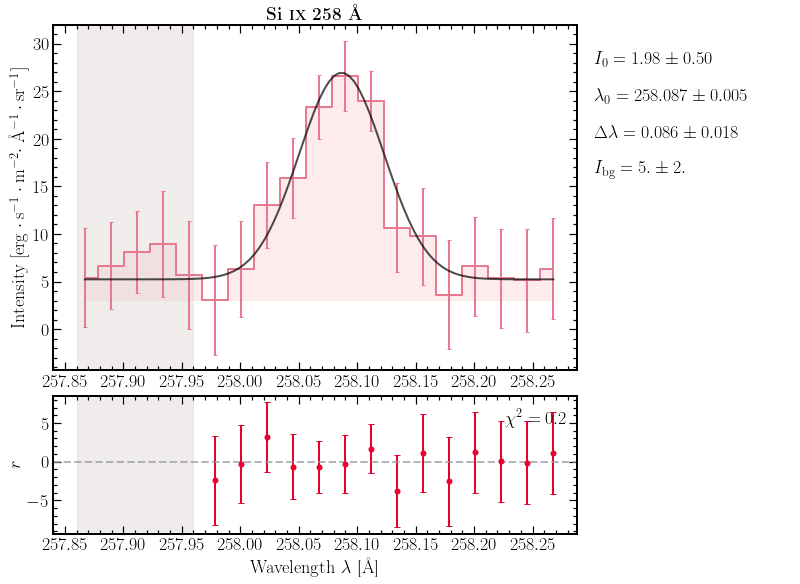

In [73]:
SiIX_258_slice = (2585,2604)
wvl_SiIX_258 = eis_wvl[SiIX_258_slice[0]:SiIX_258_slice[1]]
int_SiIX_258 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiIX_258_slice[0]:SiIX_258_slice[1]],axis=0)

err_SiIX_258 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiIX_258_slice[0]:SiIX_258_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiIX_258_fit_model = SpectrumFitSingle(data=int_SiIX_258,wvl=wvl_SiIX_258,err=err_SiIX_258,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[258.09],
                                      int_max_init=[25],
                                      fwhm_init=[0.08],mask=[[257.86,257.96]])
# SiIX_258_fit_model.plot(plot_fit=False,plot_params=False)
# SiIX_258_fit_model.run_HahnMC(n_chain=10000)
SiIX_258_fit_model.run_lse()
SiIX_258_fit_model.plot(plot_title=r"\textbf{Si \textsc{ix} 258 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiIX_258_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,SiIX_258_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0540114]


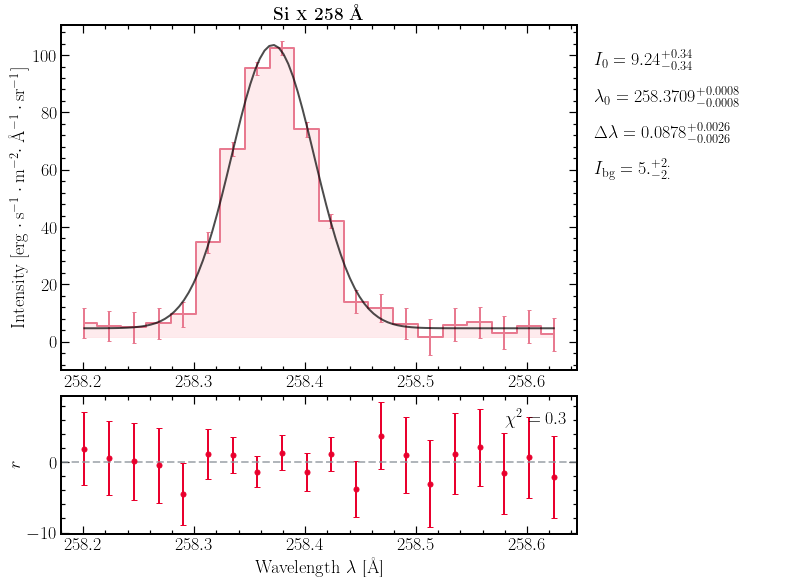

In [74]:
SiX_258_slice = (2600,2620)
wvl_SiX_258 = eis_wvl[SiX_258_slice[0]:SiX_258_slice[1]]
int_SiX_258 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiX_258_slice[0]:SiX_258_slice[1]],axis=0)

err_SiX_258 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiX_258_slice[0]:SiX_258_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiX_258_fit_model = SpectrumFitSingle(data=int_SiX_258,wvl=wvl_SiX_258,err=err_SiX_258,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[258.36],
                                      int_max_init=[100],
                                      fwhm_init=[0.08])
# SiX_258_fit_model.plot(plot_fit=False,plot_params=False)
SiX_258_fit_model.run_HahnMC(n_chain=10000)
# SiX_258_fit_model.run_lse()
SiX_258_fit_model.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiX_258_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiX_258_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06048214]


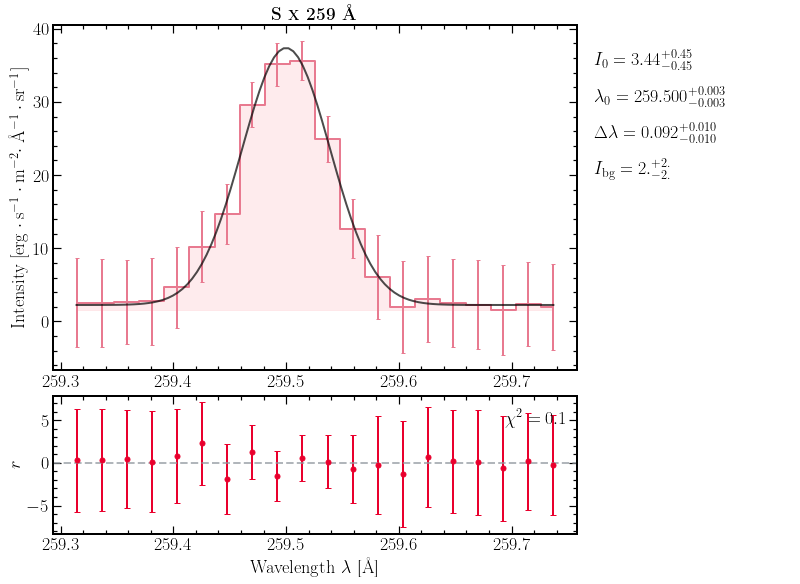

In [75]:
SX_259_slice = (2650,2670)
wvl_SX_259 = eis_wvl[SX_259_slice[0]:SX_259_slice[1]]
int_SX_259 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SX_259_slice[0]:SX_259_slice[1]],axis=0)

err_SX_259 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SX_259_slice[0]:SX_259_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SX_259_fit_model = SpectrumFitSingle(data=int_SX_259,wvl=wvl_SX_259,err=err_SX_259,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[259.51],
                                      int_max_init=[35],
                                      fwhm_init=[0.08])
# SX_259_fit_model.plot(plot_fit=False,plot_params=False)
SX_259_fit_model.run_HahnMC(n_chain=10000)
# SX_259_fit_model.run_lse()
SX_259_fit_model.plot(plot_title=r"\textbf{S \textsc{x} 259 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SX_259_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SX_259_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04978533]


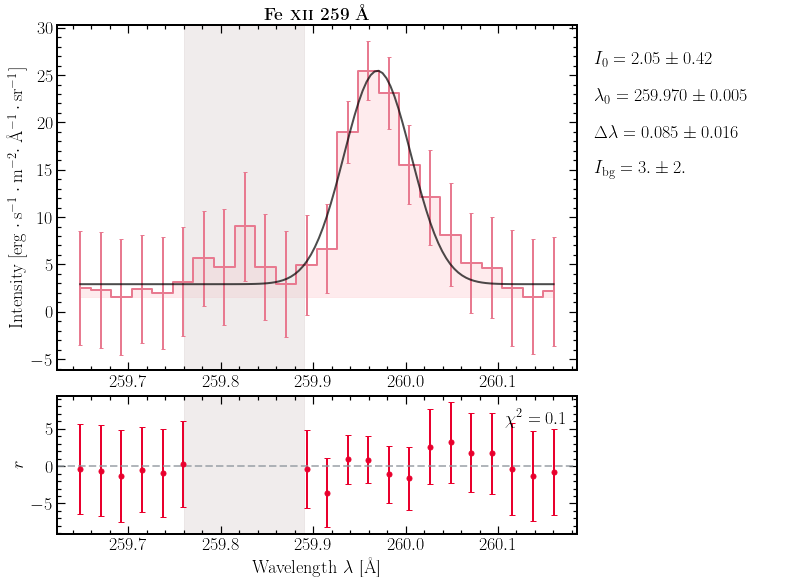

In [76]:
FeXII_259_slice = (2665,2689)
wvl_FeXII_259 = eis_wvl[FeXII_259_slice[0]:FeXII_259_slice[1]]
int_FeXII_259 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_259_slice[0]:FeXII_259_slice[1]],axis=0)

err_FeXII_259 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_259_slice[0]:FeXII_259_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_259_fit_model = SpectrumFitSingle(data=int_FeXII_259,wvl=wvl_FeXII_259,err=err_FeXII_259,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[259.96],
                                      int_max_init=[25],
                                      fwhm_init=[0.08],mask=[[259.76,259.89]])
# FeXII_259_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXII_259_fit_model.run_HahnMC(n_chain=10000)
FeXII_259_fit_model.run_lse()
FeXII_259_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 259 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_259_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXII_259_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04953567]


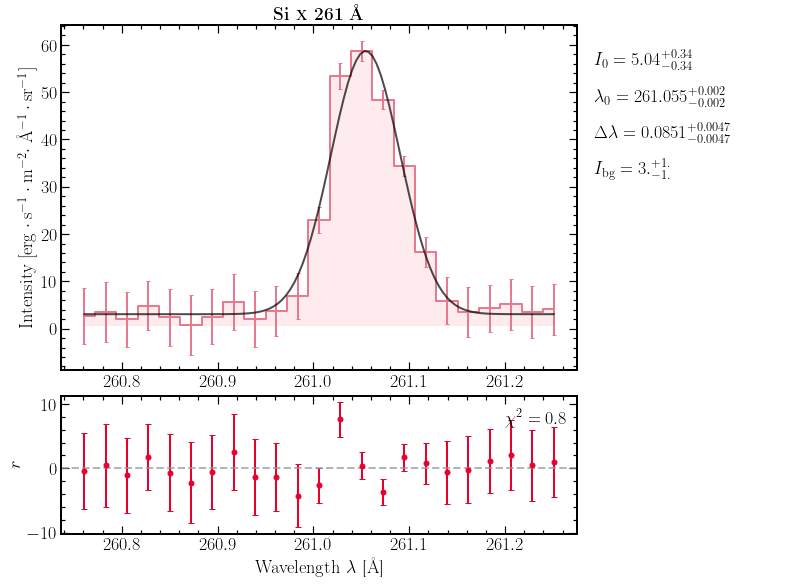

In [77]:
SiX_261_slice = (2715,2738)
wvl_SiX_261 = eis_wvl[SiX_261_slice[0]:SiX_261_slice[1]]
int_SiX_261 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiX_261_slice[0]:SiX_261_slice[1]],axis=0)

err_SiX_261 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiX_261_slice[0]:SiX_261_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiX_261_fit_model = SpectrumFitSingle(data=int_SiX_261,wvl=wvl_SiX_261,err=err_SiX_261,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[261.06],
                                      int_max_init=[60],
                                      fwhm_init=[0.08])
# SiX_261_fit_model.plot(plot_fit=False,plot_params=False)
SiX_261_fit_model.run_HahnMC(n_chain=10000)
# SiX_261_fit_model.run_lse()
SiX_261_fit_model.plot(plot_title=r"\textbf{Si \textsc{x} 261 \mbox{\AA}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiX_261_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiX_261_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05198148]


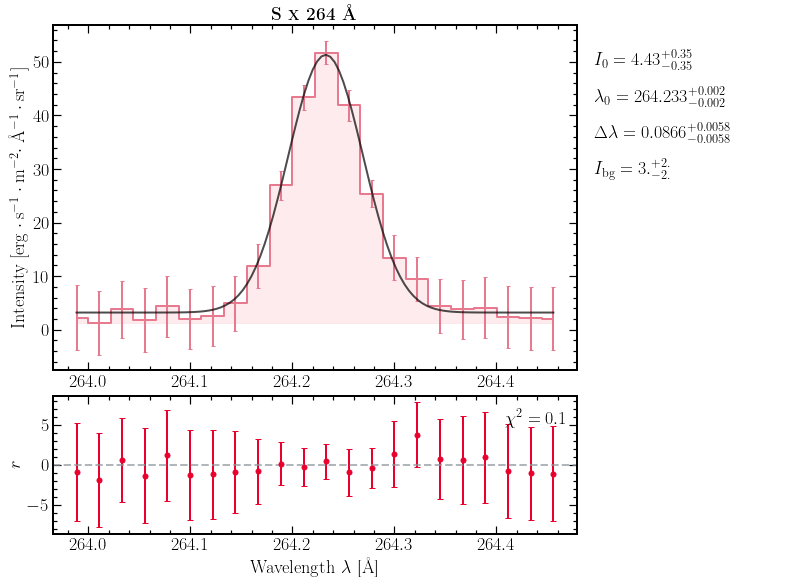

In [78]:
SX_264_slice = (2860,2882)
wvl_SX_264 = eis_wvl[SX_264_slice[0]:SX_264_slice[1]]
int_SX_264 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SX_264_slice[0]:SX_264_slice[1]],axis=0)

err_SX_264 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SX_264_slice[0]:SX_264_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SX_264_fit_model = SpectrumFitSingle(data=int_SX_264,wvl=wvl_SX_264,err=err_SX_264,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[264.22],
                                      int_max_init=[50],
                                      fwhm_init=[0.08])
# SX_264_fit_model.plot(plot_fit=False,plot_params=False)
SX_264_fit_model.run_HahnMC(n_chain=10000)
# SX_264_fit_model.run_lse()
SX_264_fit_model.plot(plot_title=r"\textbf{S \textsc{x} 264 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SX_264_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SX_264_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04555482]


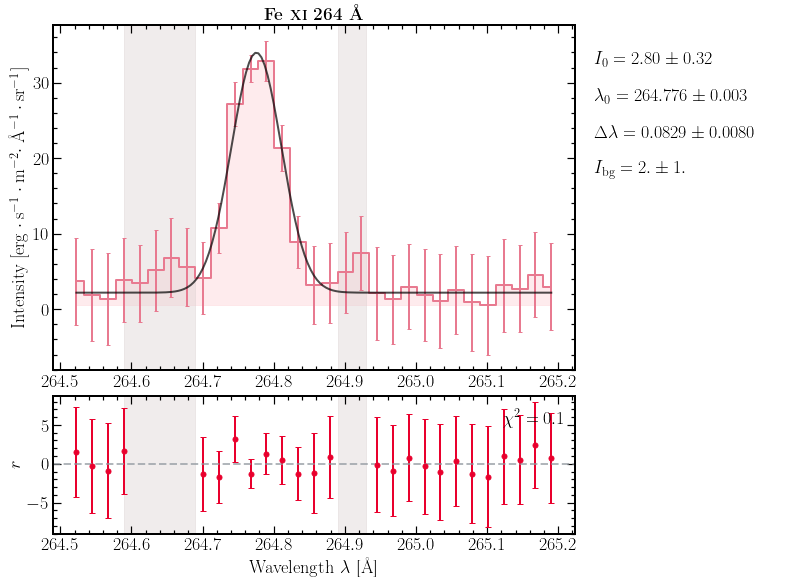

In [79]:
FeXI_264_slice = (2884,2915)
wvl_FeXI_264 = eis_wvl[FeXI_264_slice[0]:FeXI_264_slice[1]]
int_FeXI_264 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_264_slice[0]:FeXI_264_slice[1]],axis=0)

err_FeXI_264 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_264_slice[0]:FeXI_264_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_264_fit_model = SpectrumFitSingle(data=int_FeXI_264,wvl=wvl_FeXI_264,err=err_FeXI_264,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[264.76],
                                      int_max_init=[30],
                                      fwhm_init=[0.08],mask=[[264.59,264.69],[264.89,264.93]])
# FeXI_264_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_264_fit_model.run_HahnMC(n_chain=10000)
FeXI_264_fit_model.run_lse()
FeXI_264_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 264 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_264_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_264_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06057321]


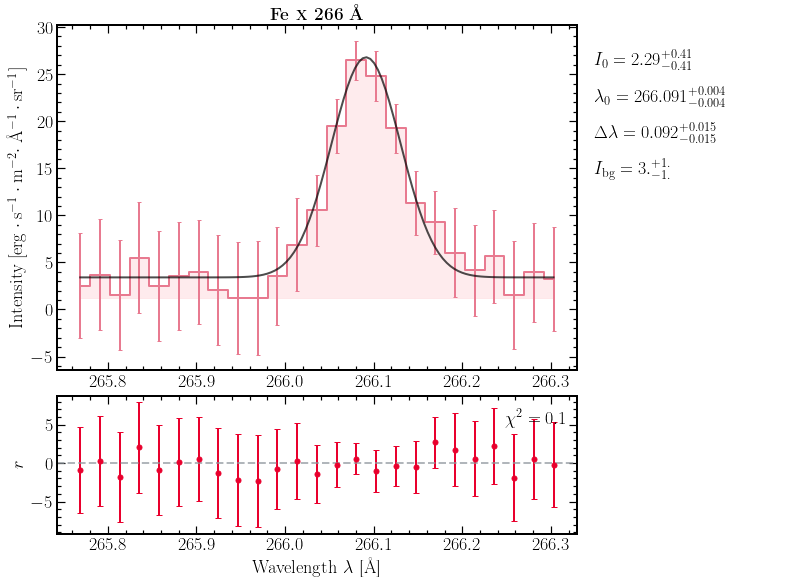

In [80]:
FeX_266_slice = (2940,2965)
wvl_FeX_266 = eis_wvl[FeX_266_slice[0]:FeX_266_slice[1]]
int_FeX_266 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_266_slice[0]:FeX_266_slice[1]],axis=0)

err_FeX_266 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_266_slice[0]:FeX_266_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_266_fit_model = SpectrumFitSingle(data=int_FeX_266,wvl=wvl_FeX_266,err=err_FeX_266,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[266.09],
                                      int_max_init=[25],
                                      fwhm_init=[0.08])
# FeX_266_fit_model.plot(plot_fit=False,plot_params=False)
FeX_266_fit_model.run_HahnMC(n_chain=10000)
# FeX_266_fit_model.run_lse()
FeX_266_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 266 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_266_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,FeX_266_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan        nan 0.01505558]


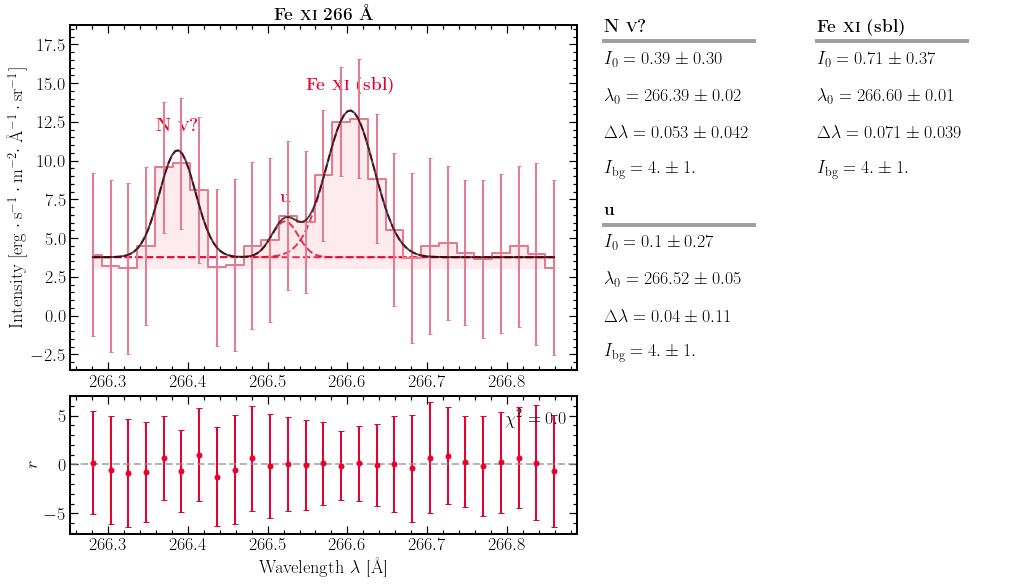

In [81]:
FeXI_266_slice = (2963,2990)
wvl_FeXI_266 = eis_wvl[FeXI_266_slice[0]:FeXI_266_slice[1]]
int_FeXI_266 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_266_slice[0]:FeXI_266_slice[1]],axis=0)

err_FeXI_266 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_266_slice[0]:FeXI_266_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_266_fit_model = SpectrumFitSingle(data=int_FeXI_266,wvl=wvl_FeXI_266,err=err_FeXI_266,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[266.39,266.51,266.61],
                                      int_max_init=[7,5,10],
                                      fwhm_init=[0.08,0.08,0.08])
# FeXI_266_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_266_fit_model.run_HahnMC(n_chain=10000)
FeXI_266_fit_model.run_lse()
FeXI_266_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 266 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{N \textsc{v}?}",r"\textbf{u}",
                        r"\textbf{Fe \textsc{xi} (sbl)}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_266_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,FeXI_266_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05422676]


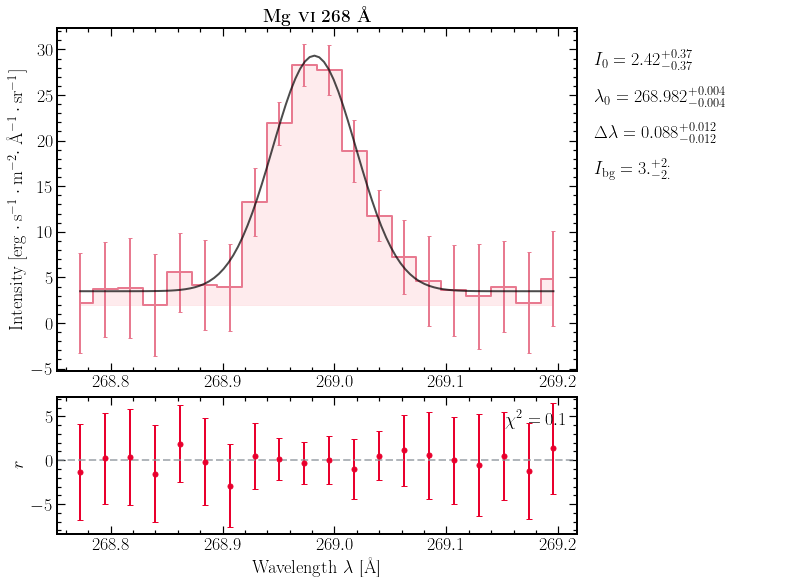

In [82]:
MgVI_268_slice = (3075,3095)
wvl_MgVI_268 = eis_wvl[MgVI_268_slice[0]:MgVI_268_slice[1]]
int_MgVI_268 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MgVI_268_slice[0]:MgVI_268_slice[1]],axis=0)

err_MgVI_268 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MgVI_268_slice[0]:MgVI_268_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MgVI_268_fit_model = SpectrumFitSingle(data=int_MgVI_268,wvl=wvl_MgVI_268,err=err_MgVI_268,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[268.99],
                                      int_max_init=[25],
                                      fwhm_init=[0.08])
# MgVI_268_fit_model.plot(plot_fit=False,plot_params=False)
MgVI_268_fit_model.run_HahnMC(n_chain=10000)
# MgVI_268_fit_model.run_lse()
MgVI_268_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vi} 268 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MgVI_268_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,MgVI_268_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05326494        nan]


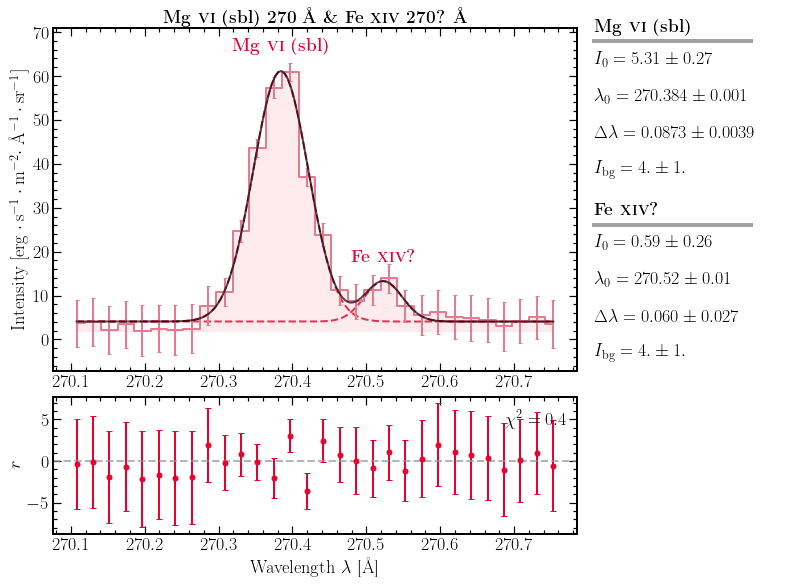

In [83]:
MgVI_FeXIV_270_slice = (3135,3165)
wvl_MgVI_FeXIV_270 = eis_wvl[MgVI_FeXIV_270_slice[0]:MgVI_FeXIV_270_slice[1]]
int_MgVI_FeXIV_270 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MgVI_FeXIV_270_slice[0]:MgVI_FeXIV_270_slice[1]],axis=0)

err_MgVI_FeXIV_270 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MgVI_FeXIV_270_slice[0]:MgVI_FeXIV_270_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MgVI_FeXIV_270_fit_model = SpectrumFitSingle(data=int_MgVI_FeXIV_270,wvl=wvl_MgVI_FeXIV_270,err=err_MgVI_FeXIV_270,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[270.36,270.51],
                                      int_max_init=[60,10],
                                      fwhm_init=[0.08,0.08])
# MgVI_FeXIV_270_fit_model.plot(plot_fit=False,plot_params=False)
# # # MgVI_FeXIV_270_fit_model.run_HahnMC(n_chain=10000)
MgVI_FeXIV_270_fit_model.run_lse()
MgVI_FeXIV_270_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vi} (sbl) 270 \mbox{\AA} \& Fe \textsc{xiv} 270? \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Mg \textsc{vi} (sbl)}",r"\textbf{Fe \textsc{xiv}?}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MgVI_FeXIV_270_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,MgVI_FeXIV_270_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06096335]


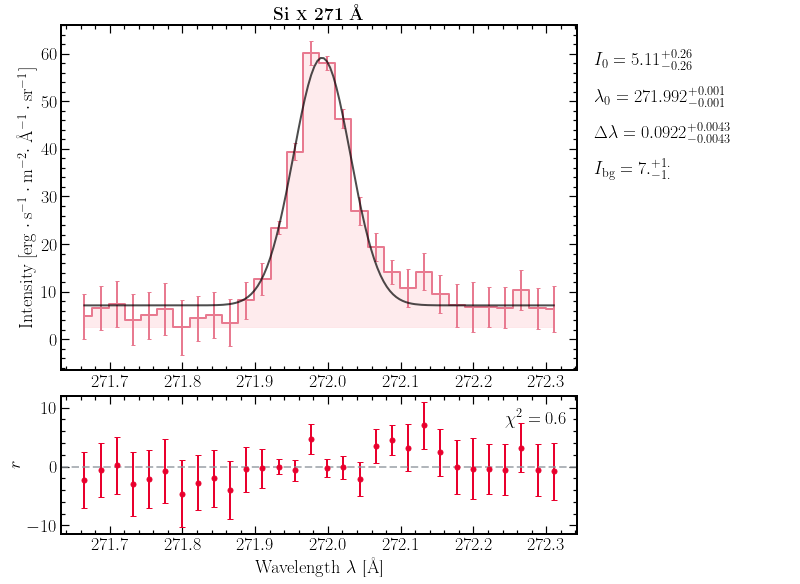

In [84]:
SiX_271_slice = (3205,3235)
wvl_SiX_271 = eis_wvl[SiX_271_slice[0]:SiX_271_slice[1]]
int_SiX_271 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiX_271_slice[0]:SiX_271_slice[1]],axis=0)

err_SiX_271 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiX_271_slice[0]:SiX_271_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiX_271_fit_model = SpectrumFitSingle(data=int_SiX_271,wvl=wvl_SiX_271,err=err_SiX_271,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[271.99],
                                      int_max_init=[60],
                                      fwhm_init=[0.08])
# SiX_271_fit_model.plot(plot_fit=False,plot_params=False)
SiX_271_fit_model.run_HahnMC(n_chain=10000)
# SiX_271_fit_model.run_lse()
SiX_271_fit_model.plot(plot_title=r"\textbf{Si \textsc{x} 271 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiX_271_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiX_271_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0594093]


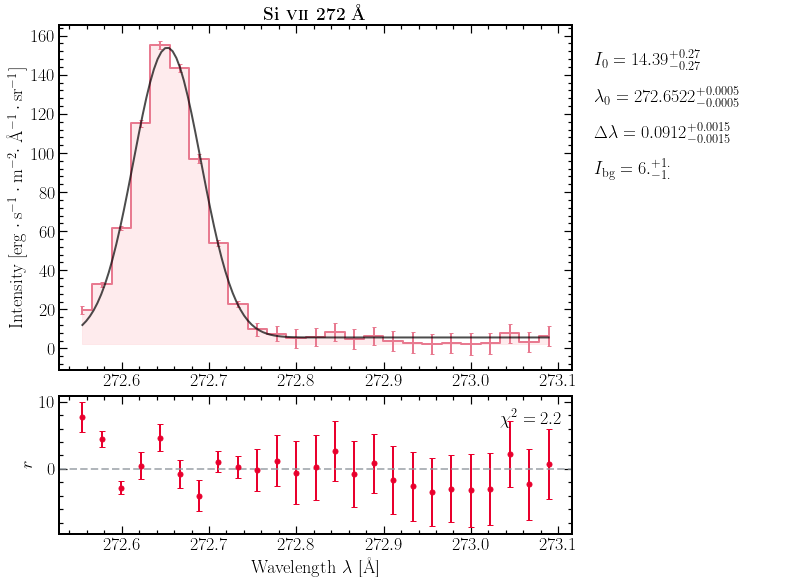

In [85]:
SiVII_272_slice = (3245,3270)
wvl_SiVII_272 = eis_wvl[SiVII_272_slice[0]:SiVII_272_slice[1]]
int_SiVII_272 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiVII_272_slice[0]:SiVII_272_slice[1]],axis=0)

err_SiVII_272 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiVII_272_slice[0]:SiVII_272_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiVII_272_fit_model = SpectrumFitSingle(data=int_SiVII_272,wvl=wvl_SiVII_272,err=err_SiVII_272,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[272.66],
                                      int_max_init=[140],
                                      fwhm_init=[0.08])
# SiVII_272_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_272_fit_model.run_HahnMC(n_chain=10000)
# SiVII_272_fit_model.run_lse()
SiVII_272_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 272 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_272_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiVII_272_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06493005]


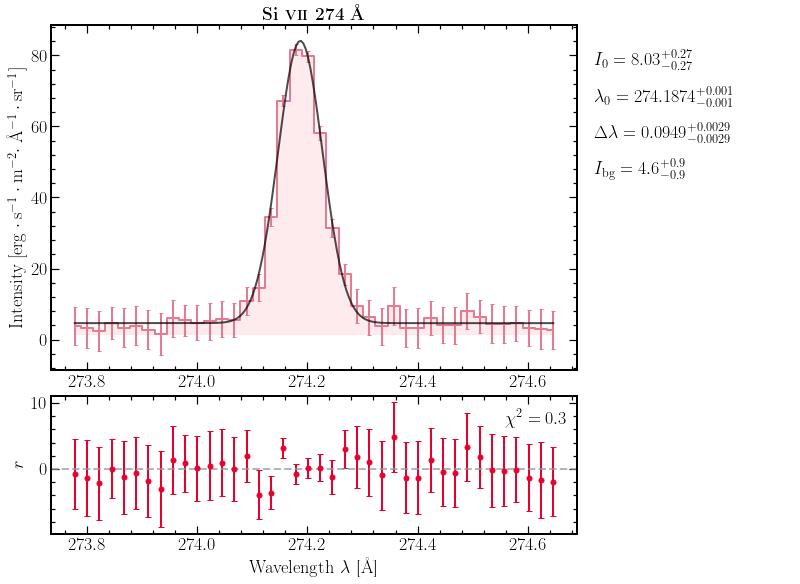

In [86]:
SiVII_274_slice = (3300,3340)
wvl_SiVII_274 = eis_wvl[SiVII_274_slice[0]:SiVII_274_slice[1]]
int_SiVII_274 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiVII_274_slice[0]:SiVII_274_slice[1]],axis=0)

err_SiVII_274 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiVII_274_slice[0]:SiVII_274_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiVII_274_fit_model = SpectrumFitSingle(data=int_SiVII_274,wvl=wvl_SiVII_274,err=err_SiVII_274,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[274.21],
                                      int_max_init=[80],
                                      fwhm_init=[0.08])
# SiVII_274_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_274_fit_model.run_HahnMC(n_chain=10000)
# SiVII_274_fit_model.run_lse()
SiVII_274_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 274 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_274_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiVII_274_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06013491]


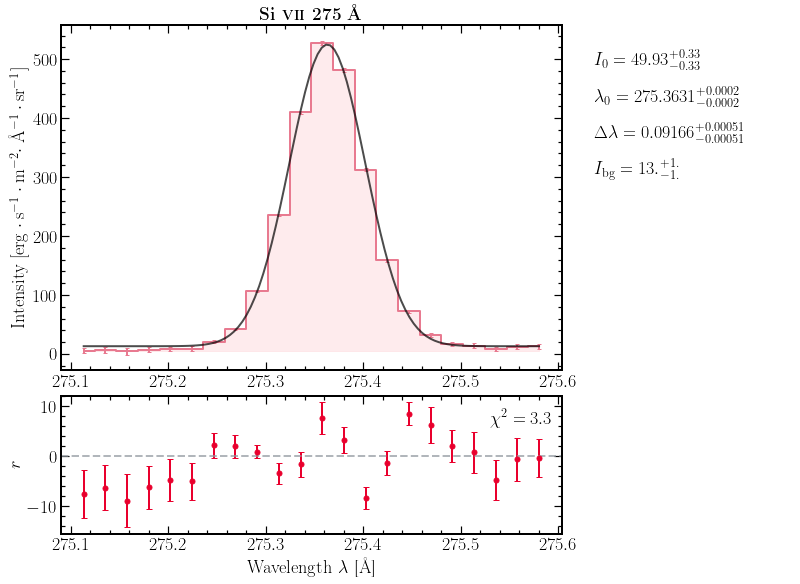

In [87]:
SiVII_275_slice = (3360,3382)
wvl_SiVII_275 = eis_wvl[SiVII_275_slice[0]:SiVII_275_slice[1]]
int_SiVII_275 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiVII_275_slice[0]:SiVII_275_slice[1]],axis=0)

err_SiVII_275 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiVII_275_slice[0]:SiVII_275_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiVII_275_fit_model = SpectrumFitSingle(data=int_SiVII_275,wvl=wvl_SiVII_275,err=err_SiVII_275,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[275.36],
                                      int_max_init=[500],
                                      fwhm_init=[0.08])
# SiVII_275_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_275_fit_model.run_HahnMC(n_chain=10000)
# SiVII_275_fit_model.run_lse()
SiVII_275_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 275 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_275_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiVII_275_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05687403]


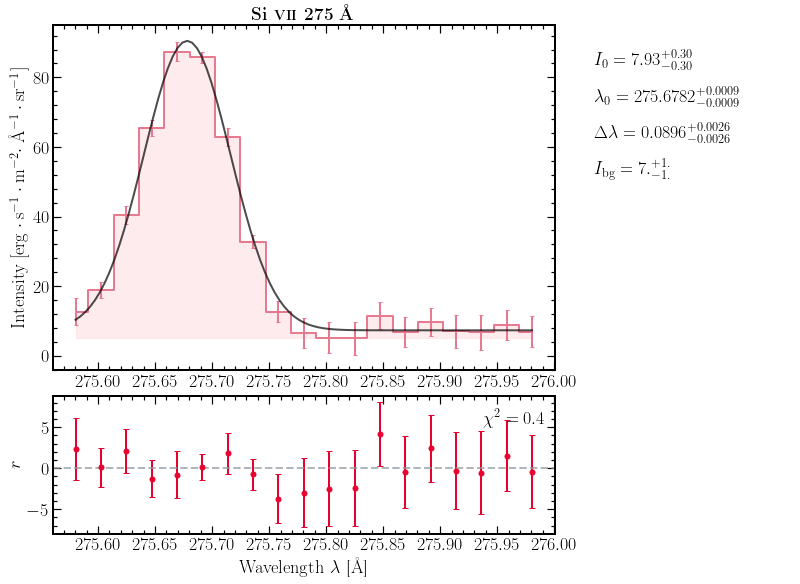

In [88]:
SiVII_275_2_slice = (3381,3400)
wvl_SiVII_275_2 = eis_wvl[SiVII_275_2_slice[0]:SiVII_275_2_slice[1]]
int_SiVII_275_2 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiVII_275_2_slice[0]:SiVII_275_2_slice[1]],axis=0)

err_SiVII_275_2 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiVII_275_2_slice[0]:SiVII_275_2_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiVII_275_2_fit_model = SpectrumFitSingle(data=int_SiVII_275_2,wvl=wvl_SiVII_275_2,err=err_SiVII_275_2,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[275.66],
                                      int_max_init=[100],
                                      fwhm_init=[0.08])
# SiVII_275_2_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_275_2_fit_model.run_HahnMC(n_chain=10000)
# SiVII_275_2_fit_model.run_lse()
SiVII_275_2_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 275 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_275_2_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,SiVII_275_2_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05925544]


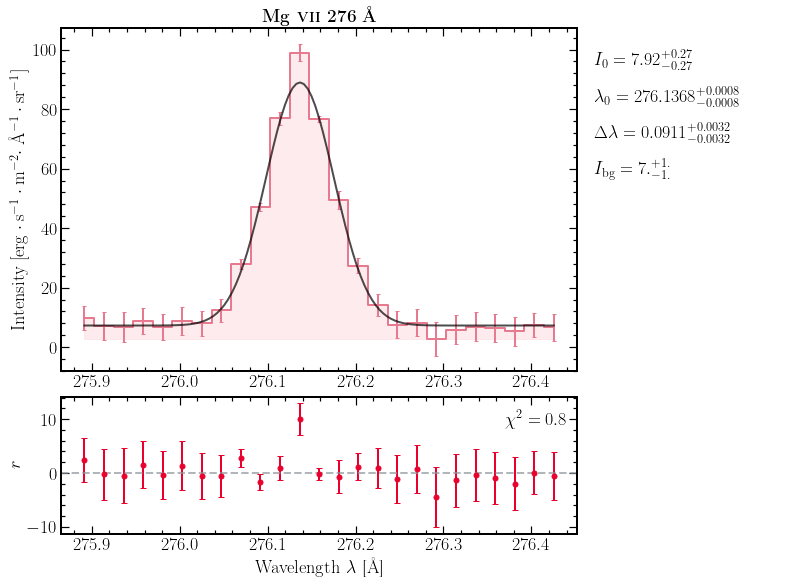

In [89]:
MgVII_276_slice = (3395,3420)
wvl_MgVII_276 = eis_wvl[MgVII_276_slice[0]:MgVII_276_slice[1]]
int_MgVII_276 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MgVII_276_slice[0]:MgVII_276_slice[1]],axis=0)

err_MgVII_276 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MgVII_276_slice[0]:MgVII_276_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MgVII_276_fit_model = SpectrumFitSingle(data=int_MgVII_276,wvl=wvl_MgVII_276,err=err_MgVII_276,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[276.11],
                                      int_max_init=[90],
                                      fwhm_init=[0.08])
# MgVII_276_fit_model.plot(plot_fit=False,plot_params=False)
MgVII_276_fit_model.run_HahnMC(n_chain=10000)
# MgVII_276_fit_model.run_lse()
MgVII_276_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vii} 276 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MgVII_276_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,MgVII_276_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06107618 0.06498593 0.05116458 0.07058745]


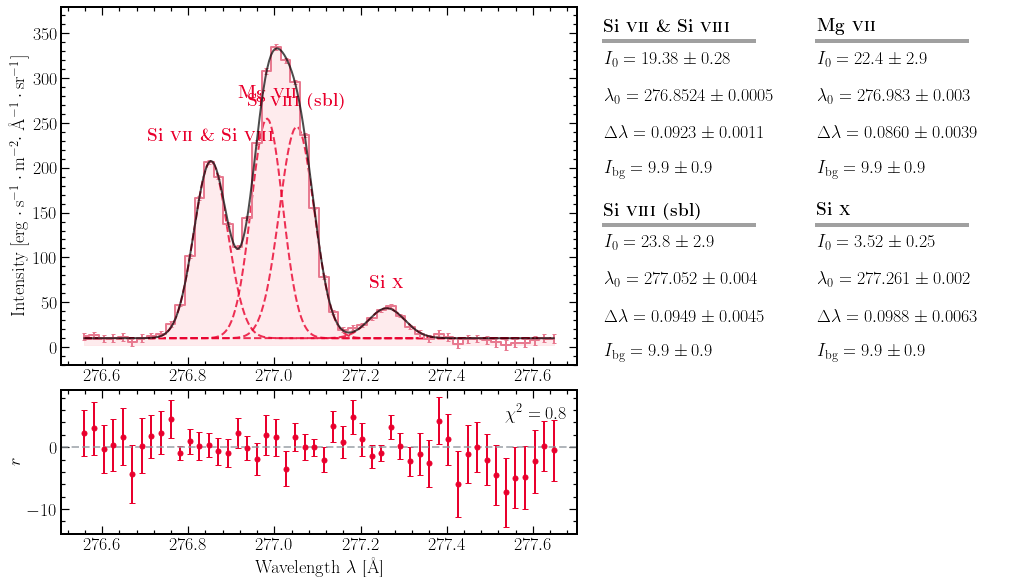

In [90]:
SiVII_SiVIII_MgVII_276_slice = (3425,3475)
wvl_SiVII_SiVIII_MgVII_276 = eis_wvl[SiVII_SiVIII_MgVII_276_slice[0]:SiVII_SiVIII_MgVII_276_slice[1]]
int_SiVII_SiVIII_MgVII_276 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiVII_SiVIII_MgVII_276_slice[0]:SiVII_SiVIII_MgVII_276_slice[1]],axis=0)

err_SiVII_SiVIII_MgVII_276 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiVII_SiVIII_MgVII_276_slice[0]:SiVII_SiVIII_MgVII_276_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiVII_SiVIII_MgVII_276_fit_model = SpectrumFitSingle(data=int_SiVII_SiVIII_MgVII_276,wvl=wvl_SiVII_SiVIII_MgVII_276,err=err_SiVII_SiVIII_MgVII_276,
                                      same_width=False,line_number=4,
                                      line_wvl_init=[276.81,277.01,277.04,277.26],
                                      int_max_init=[200,300,200,30],
                                      fwhm_init=[0.08,0.08,0.08,0.08])
# SiVII_SiVIII_MgVII_276_fit_model.plot(plot_fit=False,plot_params=False)
# # # SiVII_SiVIII_MgVII_276_fit_model.run_HahnMC(n_chain=10000)
SiVII_SiVIII_MgVII_276_fit_model.run_lse()
SiVII_SiVIII_MgVII_276_fit_model.plot(plot_title=r"",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Si \textsc{vii} \& Si \textsc{viii}}",
                        r"\textbf{Si \textsc{viii} (sbl)}",r"\textbf{Mg \textsc{vii}}",r"\textbf{Si \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_SiVIII_MgVII_276_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,SiVII_SiVIII_MgVII_276_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.09606741]


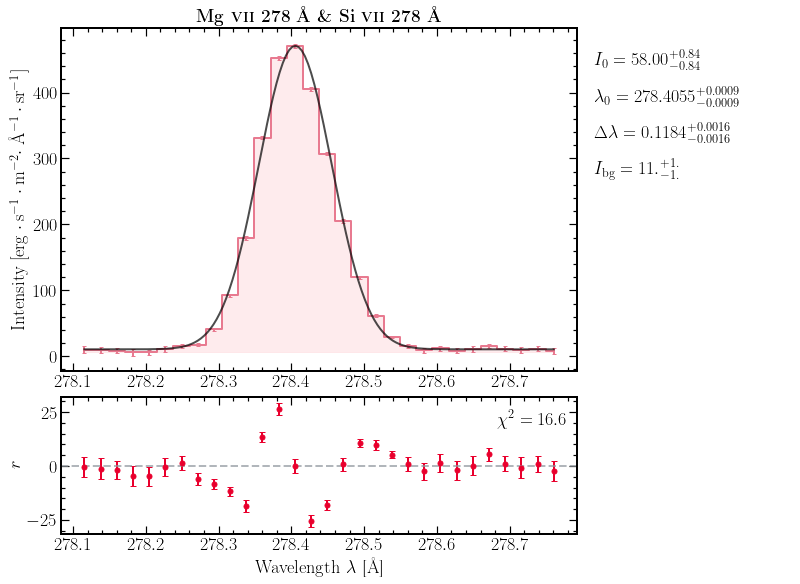

In [91]:
MgVII_SiVII_278_slice = (3495,3525)
wvl_MgVII_SiVII_278 = eis_wvl[MgVII_SiVII_278_slice[0]:MgVII_SiVII_278_slice[1]]
int_MgVII_SiVII_278 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MgVII_SiVII_278_slice[0]:MgVII_SiVII_278_slice[1]],axis=0)

err_MgVII_SiVII_278 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MgVII_SiVII_278_slice[0]:MgVII_SiVII_278_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MgVII_SiVII_278_fit_model = SpectrumFitSingle(data=int_MgVII_SiVII_278,wvl=wvl_MgVII_SiVII_278,err=err_MgVII_SiVII_278,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[278.51],
                                      int_max_init=[400],
                                      fwhm_init=[0.08])
# MgVII_SiVII_278_fit_model.plot(plot_fit=False,plot_params=False)
MgVII_SiVII_278_fit_model.run_HahnMC(n_chain=10000)
# MgVII_SiVII_278_fit_model.run_lse()
MgVII_SiVII_278_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vii} 278 \mbox{\AA} \& Si \textsc{vii} 278 \mbox{\AA} }",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MgVII_SiVII_278_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,MgVII_SiVII_278_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0531273  0.07059952 0.01385927]


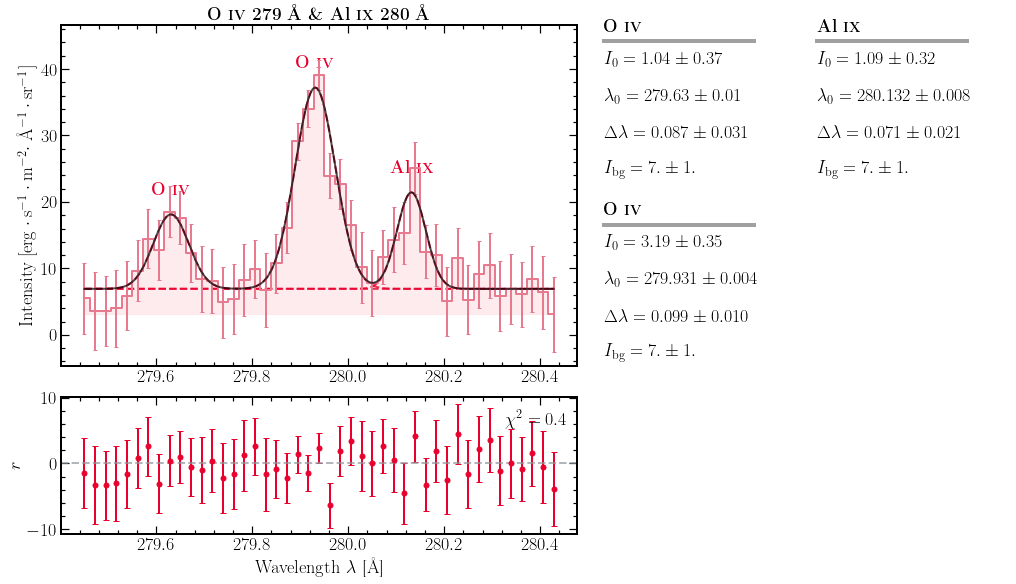

In [92]:
OIV_279_AlIX_280_slice = (3555,3600)
wvl_OIV_279_AlIX_280 = eis_wvl[OIV_279_AlIX_280_slice[0]:OIV_279_AlIX_280_slice[1]]
int_OIV_279_AlIX_280 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    OIV_279_AlIX_280_slice[0]:OIV_279_AlIX_280_slice[1]],axis=0)

err_OIV_279_AlIX_280 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        OIV_279_AlIX_280_slice[0]:OIV_279_AlIX_280_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

OIV_279_AlIX_280_fit_model = SpectrumFitSingle(data=int_OIV_279_AlIX_280,wvl=wvl_OIV_279_AlIX_280,err=err_OIV_279_AlIX_280,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[279.61,279.91,280.11],
                                      int_max_init=[15,30,10],
                                      fwhm_init=[0.08,0.08,0.08])
# OIV_279_AlIX_280_fit_model.plot(plot_fit=False,plot_params=False)
# # # OIV_279_AlIX_280_fit_model.run_HahnMC(n_chain=10000)
OIV_279_AlIX_280_fit_model.run_lse()
OIV_279_AlIX_280_fit_model.plot(plot_title=r"\textbf{O \textsc{iv} 279 \mbox{\AA} \& Al \textsc{ix} 280 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{O \textsc{iv}}",r"\textbf{O \textsc{iv}}",
                        r"\textbf{Al \textsc{ix}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(OIV_279_AlIX_280_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,OIV_279_AlIX_280_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03580836]


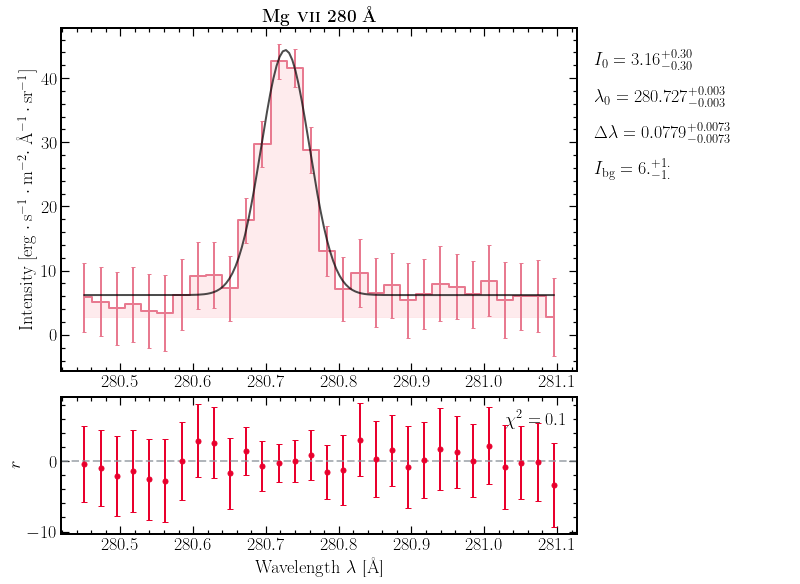

In [93]:
MgVII_280_slice = (3600,3630)
wvl_MgVII_280 = eis_wvl[MgVII_280_slice[0]:MgVII_280_slice[1]]
int_MgVII_280 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MgVII_280_slice[0]:MgVII_280_slice[1]],axis=0)

err_MgVII_280 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MgVII_280_slice[0]:MgVII_280_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MgVII_280_fit_model = SpectrumFitSingle(data=int_MgVII_280,wvl=wvl_MgVII_280,err=err_MgVII_280,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[280.71],
                                      int_max_init=[40],
                                      fwhm_init=[0.08])
# MgVII_280_fit_model.plot(plot_fit=False,plot_params=False)
MgVII_280_fit_model.run_HahnMC(n_chain=10000)
# MgVII_280_fit_model.run_lse()
MgVII_280_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vii} 280 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MgVII_280_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387+256,2,MgVII_280_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06290561]


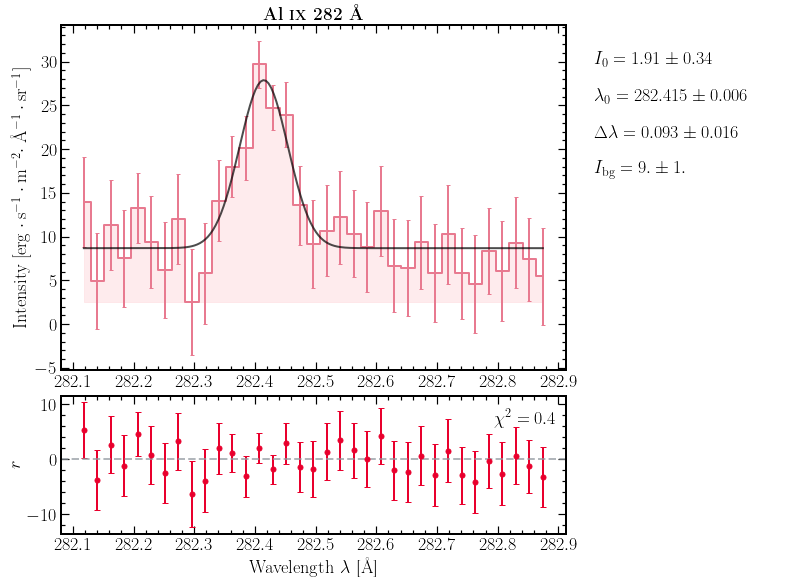

In [94]:
AlIX_282_slice = (3675,3710)
wvl_AlIX_282 = eis_wvl[AlIX_282_slice[0]:AlIX_282_slice[1]]
int_AlIX_282 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    AlIX_282_slice[0]:AlIX_282_slice[1]],axis=0)

err_AlIX_282 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        AlIX_282_slice[0]:AlIX_282_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

AlIX_282_fit_model = SpectrumFitSingle(data=int_AlIX_282,wvl=wvl_AlIX_282,err=err_AlIX_282,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[282.41],
                                      int_max_init=[30],
                                      fwhm_init=[0.08])
# AlIX_282_fit_model.plot(plot_fit=False,plot_params=False)
# # # AlIX_282_fit_model.run_HahnMC(n_chain=10000)
AlIX_282_fit_model.run_lse()
AlIX_282_fit_model.plot(plot_title=r"\textbf{Al \textsc{ix} 282 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(AlIX_282_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,AlIX_282_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05938408        nan]


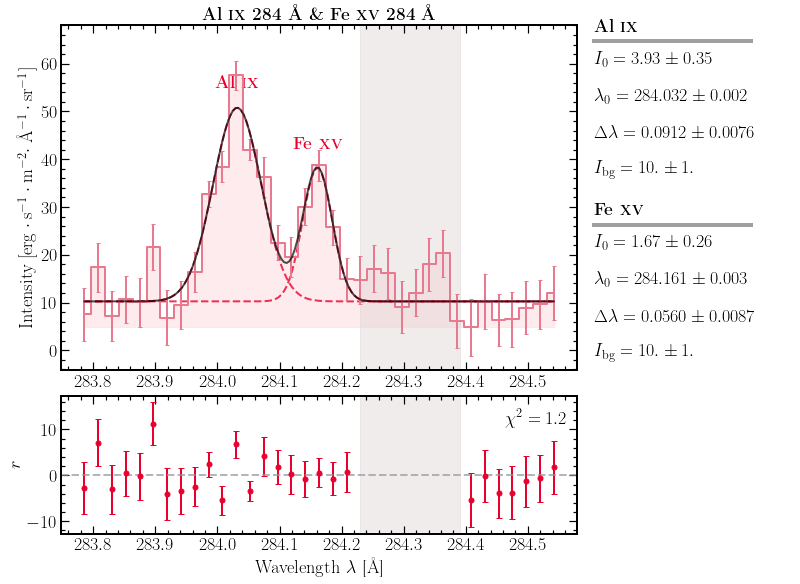

In [95]:
AlIX_FeXV_284_slice = (3750,3785)
wvl_AlIX_FeXV_284 = eis_wvl[AlIX_FeXV_284_slice[0]:AlIX_FeXV_284_slice[1]]
int_AlIX_FeXV_284 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    AlIX_FeXV_284_slice[0]:AlIX_FeXV_284_slice[1]],axis=0)

err_AlIX_FeXV_284 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        AlIX_FeXV_284_slice[0]:AlIX_FeXV_284_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

AlIX_FeXV_284_fit_model = SpectrumFitSingle(data=int_AlIX_FeXV_284,wvl=wvl_AlIX_FeXV_284,err=err_AlIX_FeXV_284,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[284.01,284.14],
                                      int_max_init=[50,40],
                                      fwhm_init=[0.08,0.08],mask=[[284.23,284.39]])
# AlIX_FeXV_284_fit_model.plot(plot_fit=False,plot_params=False)
# # # AlIX_FeXV_284_fit_model.run_HahnMC(n_chain=10000)
AlIX_FeXV_284_fit_model.run_lse()
AlIX_FeXV_284_fit_model.plot(plot_title=r"\textbf{Al \textsc{ix} 284 \mbox{\AA} \& Fe \textsc{xv} 284 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Al \textsc{ix}}",r"\textbf{Fe \textsc{xv}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(AlIX_FeXV_284_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,AlIX_FeXV_284_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.01269168]


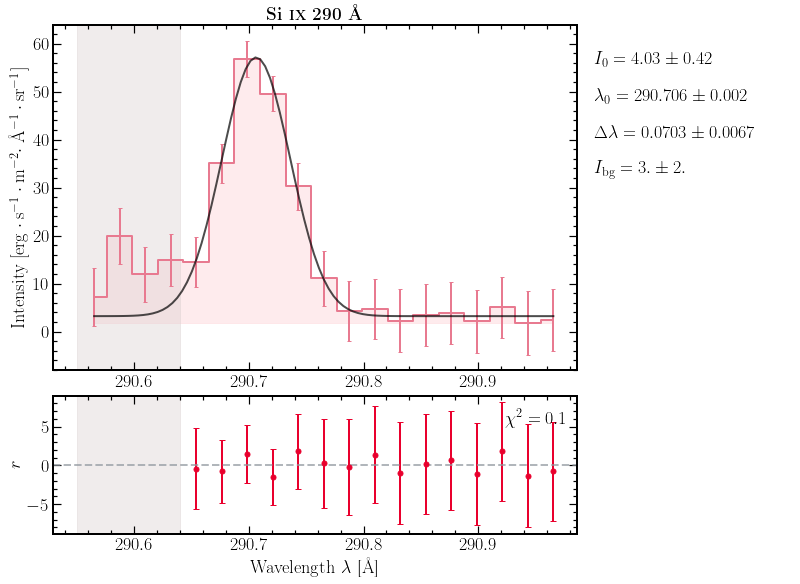

In [96]:
SiIX_290_slice = (4055,4074)
wvl_SiIX_290 = eis_wvl[SiIX_290_slice[0]:SiIX_290_slice[1]]
int_SiIX_290 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SiIX_290_slice[0]:SiIX_290_slice[1]],axis=0)

err_SiIX_290 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SiIX_290_slice[0]:SiIX_290_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SiIX_290_fit_model = SpectrumFitSingle(data=int_SiIX_290,wvl=wvl_SiIX_290,err=err_SiIX_290,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[290.71],
                                      int_max_init=[60],
                                      fwhm_init=[0.08],mask=[[290.55,290.64]])
# SiIX_290_fit_model.plot(plot_fit=False,plot_params=False)
# # # SiIX_290_fit_model.run_HahnMC(n_chain=10000)
SiIX_290_fit_model.run_lse()
SiIX_290_fit_model.plot(plot_title=r"\textbf{Si \textsc{ix} 290 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SiIX_290_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387+256,2,SiIX_290_fit_model.line_wvl_fit,eis_wvl[0])**2))

### Corrections to Instrumental Broadening?

In [97]:
veff_OVI_1031_1037 = 50.1
fwhm_OVI_184_infer = np.sqrt(4*np.log(2))*184.117/2.9979e5*veff_OVI_1031_1037
dlambda_inst = np.sqrt(0.0814**2 - fwhm_OVI_184_infer**2)
print(dlambda_inst)

0.06325385448613421


In [98]:
eis_slit_width_offset(387+256,2,193,eis_wvl[0])

array([0.06970805])

In [99]:
eis_study_width = np.sqrt(eis_slit_width_offset(387+256,2,193,eis_wvl[0])**2 + 0.0232**2)[0]
new_pseudo_thermal_width = np.sqrt(eis_study_width**2 - dlambda_inst**2)

In [100]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [101]:
print("Fe XII thermal widht at logT = 6.2: 0.0232")
print("New thermal width: {:.4f}".format(new_pseudo_thermal_width))
effective_temp_new_width = np.log10(55.85000*amu/(2*k_B)/(4*np.log(2))*c**2*(new_pseudo_thermal_width/193.509)**2)
print("Effective temperature: {:.2f}".format(effective_temp_new_width))
ex_nonthermal_vel = np.sqrt((new_pseudo_thermal_width**2 - 0.0232**2)/(4*np.log(2)))/193.509*c/1.e5
print("Excess non-thermal velocity: {:.1f}".format(ex_nonthermal_vel))

Fe XII thermal widht at logT = 6.2: 0.0232
New thermal width: 0.0374
Effective temperature: 6.61
Excess non-thermal velocity: 27.3
